<a href="https://colab.research.google.com/github/imyush11/ML-CAPSTONE-PROJECT/blob/main/Bike_Sharing_Demand_Prediction_ML_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike sharing demand prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name** - Imyush Shukla
**Cohort** - Delhi

# **Project Summary -**

The objective of this project is to create a predictive model that can effectively estimate bike rental demand in Seoul, South Korea. This model will leverage historical data on bike usage, weather conditions, and other relevant factors to generate accurate forecasts. The project involves multiple stages including data gathering, data cleaning, feature engineering, model selection, hyperparameter optimization, model training, model assessment, and model deployment.

By accurately forecasting bike rental demand, the project aims to assist Seoul's bike-sharing program in optimizing resource management, enhancing user satisfaction, and minimizing operational costs. Through the application of machine learning and statistical analysis, the project seeks to construct a strong and reliable predictive model that supports data-driven decision-making for the bike-sharing program.

The success of the project will be determined by the model's predictive accuracy regarding bike rental demand, as well as its capacity to offer actionable insights and strategies for enhancing the bike-sharing program's performance. The project holds the potential to not only improve Seoul's bike-sharing operations but also serve as a template for other cities and organizations aiming to enhance their resource allocation and service quality.

## Data Description
The dataset includes weather-related metrics such as temperature, humidity, wind speed, visibility, dew point, solar radiation, snowfall, and rainfall. Additionally, it provides hourly data on the number of bikes rented and includes date information.

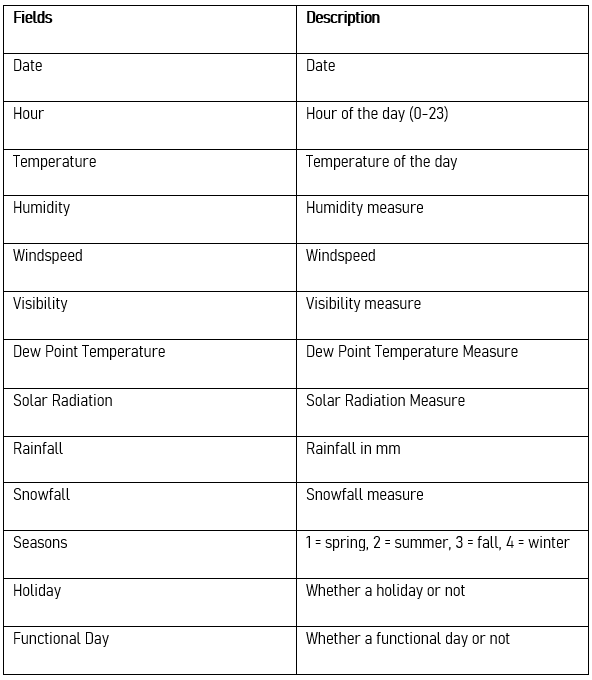

# **GitHub Link -**

GitHub Link - https://github.com/imyush11/ML-CAPSTONE-PROJECT.git

# **Problem Statement**


# The bike-sharing program in Seoul, South Korea, is experiencing low utilization rates and inefficient allocation of resources. The goal of this project is to develop a predictive model that can accurately forecast demand for bike rentals based on historical usage patterns, weather conditions, and other relevant factors. By doing so, we aim to help the bike-sharing program optimize its resources, improve user satisfaction, and reduce operating costs.

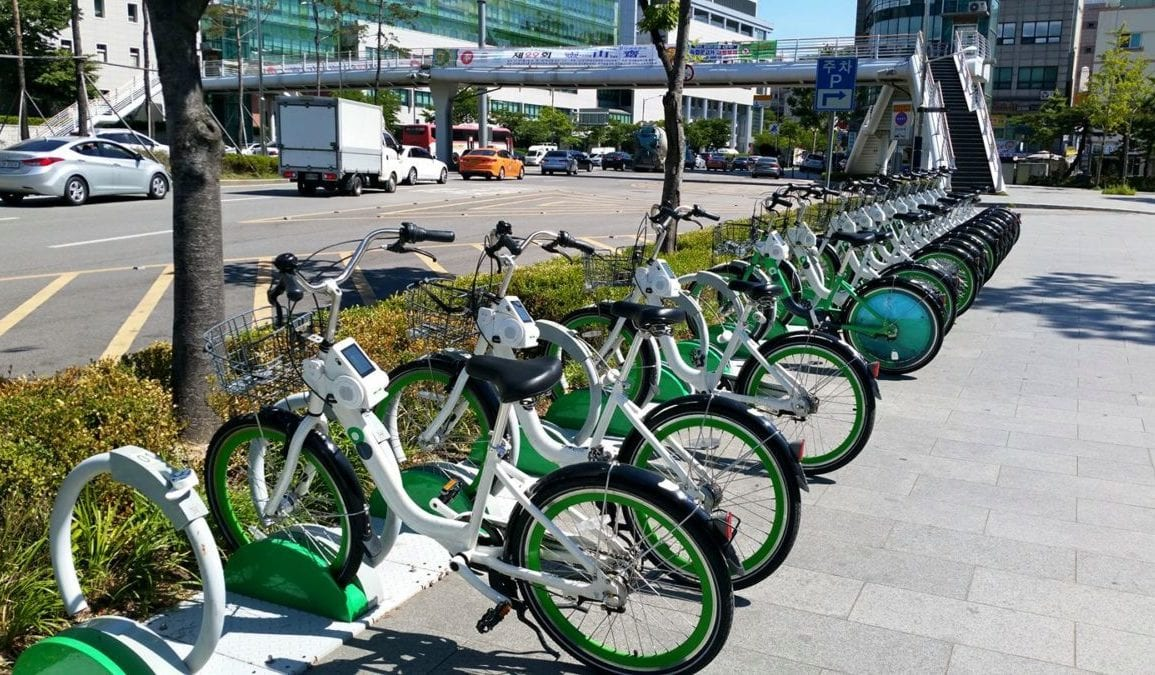

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading Dataset using Github link.
Data = '/content/drive/MyDrive/ML CAPSTONE CAPSTONE/SeoulBikeData.csv'
df = pd.read_csv(Data, encoding= 'unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look (first five rows)
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 8760 rows and 14 columns


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(f'There are {len(df[df.duplicated()])} duplicate values in dataset.')

# As we can see there are no duplicate values in the Dataset.

There are 0 duplicate values in dataset.


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isna().sum()

# No Missing Values/Null Values found in dataset.

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

Here is the information rephrased:

1. There are no null or missing values in the dataset, as all values are set to zero.

2. The dataset consists of 14 columns and 8760 rows.

3. The date columns need to be converted to the correct data type.

4. The dataset does not contain any duplicate values.

5. The following columns should be converted to numeric format for modeling purposes:

   - Seasons
   - Holiday
   - Functioning day

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Dataset Description
df.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Variables Description

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)




### Check Unique Values for each variable.

In [11]:
# Checking Unique Values for each variable
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Writing the code to make the dataset analysis ready.

In [13]:
# We can see that the Date variable is in object datatype, we need to change it into datetime datatype
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract month and day name
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()



In [14]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  month     day  
0             Yes     12  Friday  
1             Yes     12  Friday  
2             Yes     12  Friday  
3             Yes     12  Friday  
4             Yes     12  Friday

In [15]:
# Dropping Date variable from dataset
df.drop(['Date'],axis = 1, inplace = True)

In [16]:
# Defining separate data as numerical and categorical data.

# Numerical data

numerical_data = list(set(df.describe().columns.tolist()))

# Categorical data

categorical_data = list(set(df.columns)-set(numerical_data))


### What all manipulations have you done and insights you found?

1. Converted the 'Date' column from an object data type to the DateTime data type.

2. Generated new columns 'Day' and 'Month' from the 'Date' column, then removed the original 'Date' column.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
# Visualizing data distribution of our dependent variable (Rented Bike Count)

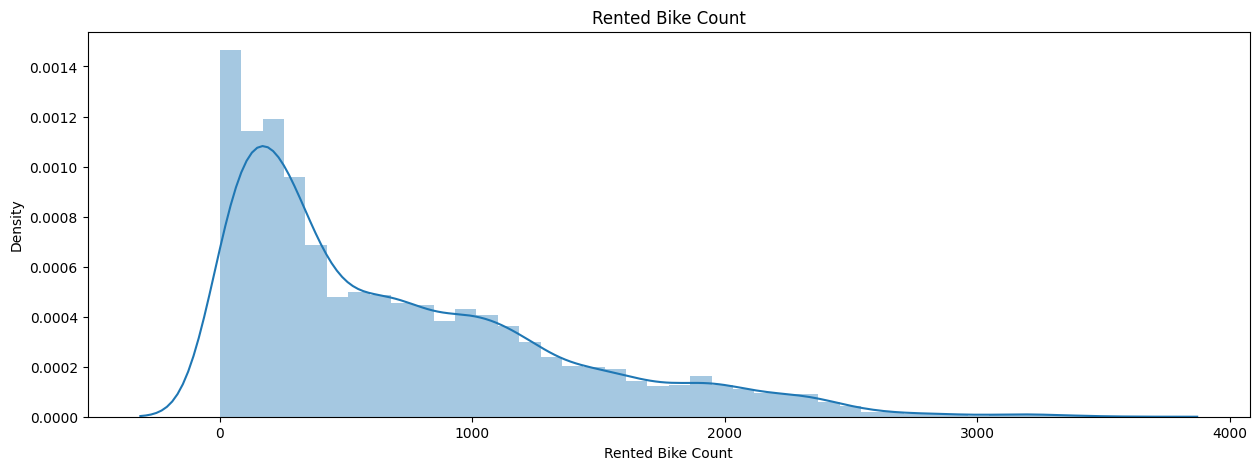

In [17]:
# Chart - 1 visualization code

plt.figure(figsize=(15,5))
plt.title('Rented Bike Count')
sns.distplot(df['Rented Bike Count'] )
plt.show()

##### 1. Why did you pick the specific chart?

Distplot is one of the best charts to show the data distribution.

##### 2. What is/are the insight(s) found from the chart?

Data is positively skewed may need to transform it further.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As of now we know that the data is positively skewed that means the bike demand for smaller bulks is more.

#### Chart - 2
# Visualizing data distribution of categorical data with respect to Rented Bike Count.

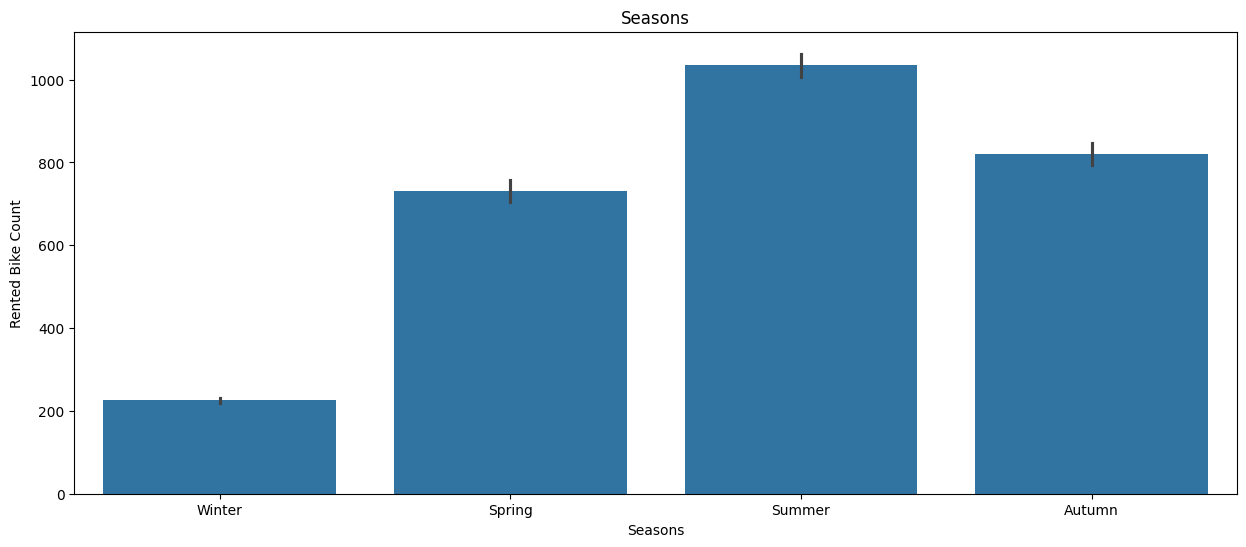

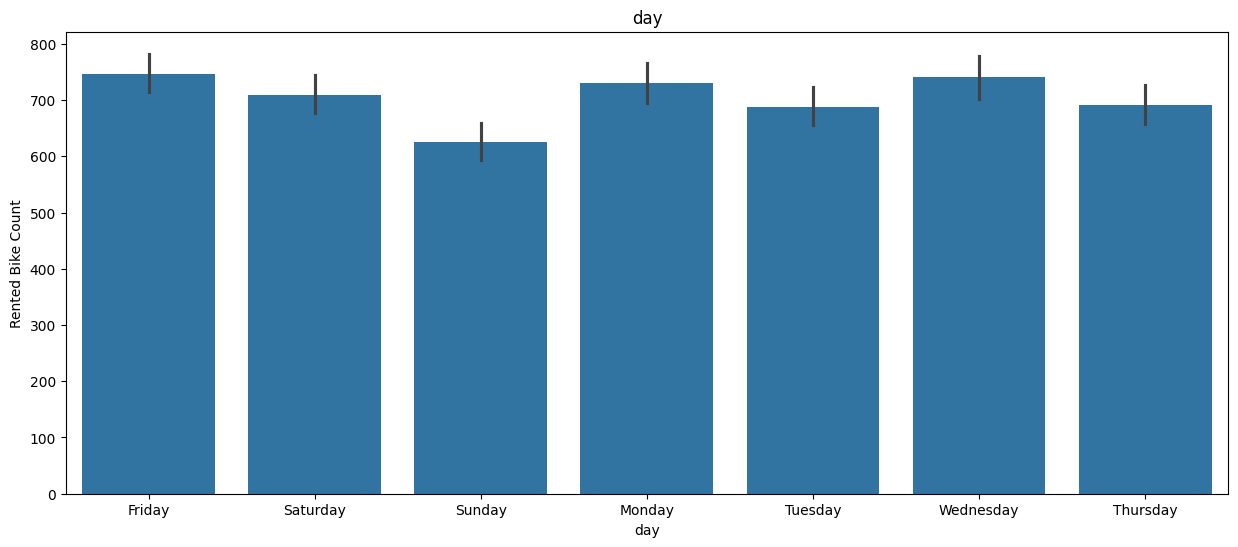

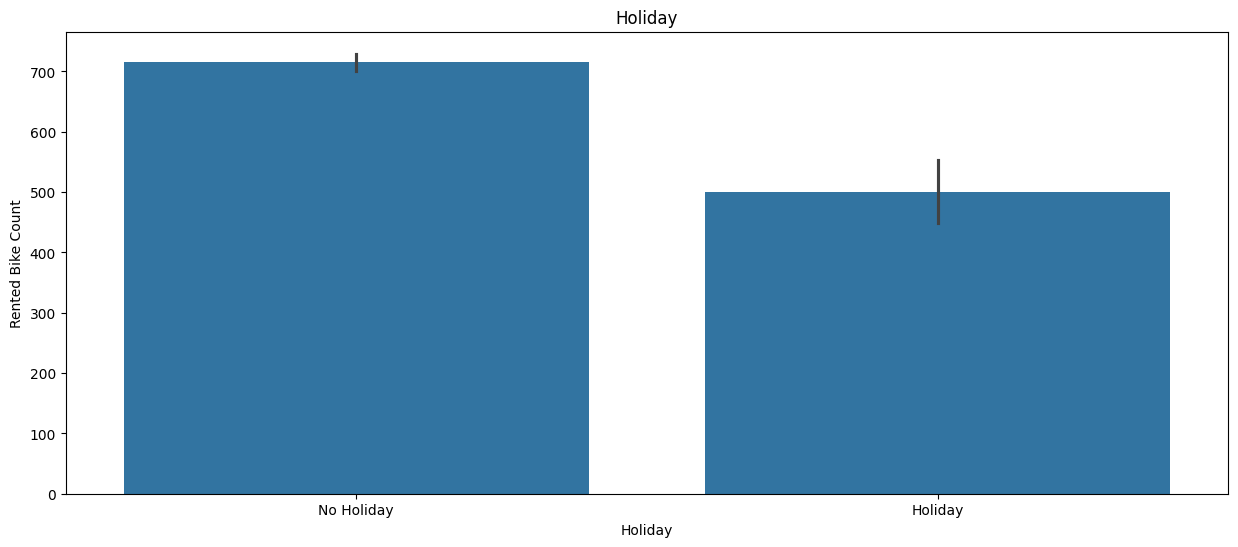

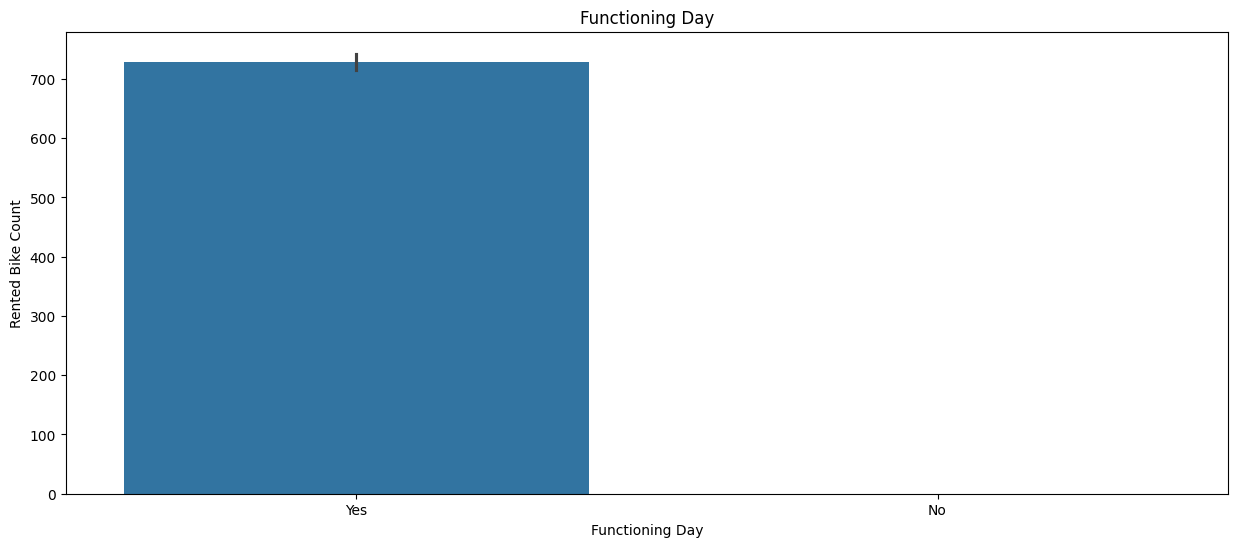

In [18]:
# Chart - 2 visualization code

# Creating a for loop for visualizing all the categorical data with respect to Rented Bike Count.

for i in categorical_data:
    plt.figure(figsize=(15,6))
    plt.title(i)
    sns.barplot(x = df[i], y = df['Rented Bike Count'])
    plt.show()

##### 1. Why did you pick the specific chart?

To visualise and spread categorical data with respect to Rented Bike Count.

##### 2. What is/are the insight(s) found from the chart?

1. The busiest time for bike rentals is from 5:00 PM to 7:00 PM, while the least busy period for rentals is between 3:00 AM and 5:00 AM.

2. The month with the highest number of bike rentals is June, and the month with the lowest is January.

3. Thursdays have the highest number of bikes rented, while Sundays see the fewest rentals.

4. Bike rentals are most popular during the summer season and least popular during the winter.

5. More bikes are rented on non-holidays compared to holidays.

6. No bikes were rented on non-operational days, resulting in 295 instances of "NO." These values and columns containing only "Yes" data are not useful and will be removed in future steps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how time, month, day, season and holiday impact the number of rented bikes, we can make strategies accordingly.

#### Chart - 3
#Bike Rent Count trend with respect to Hours on Months.

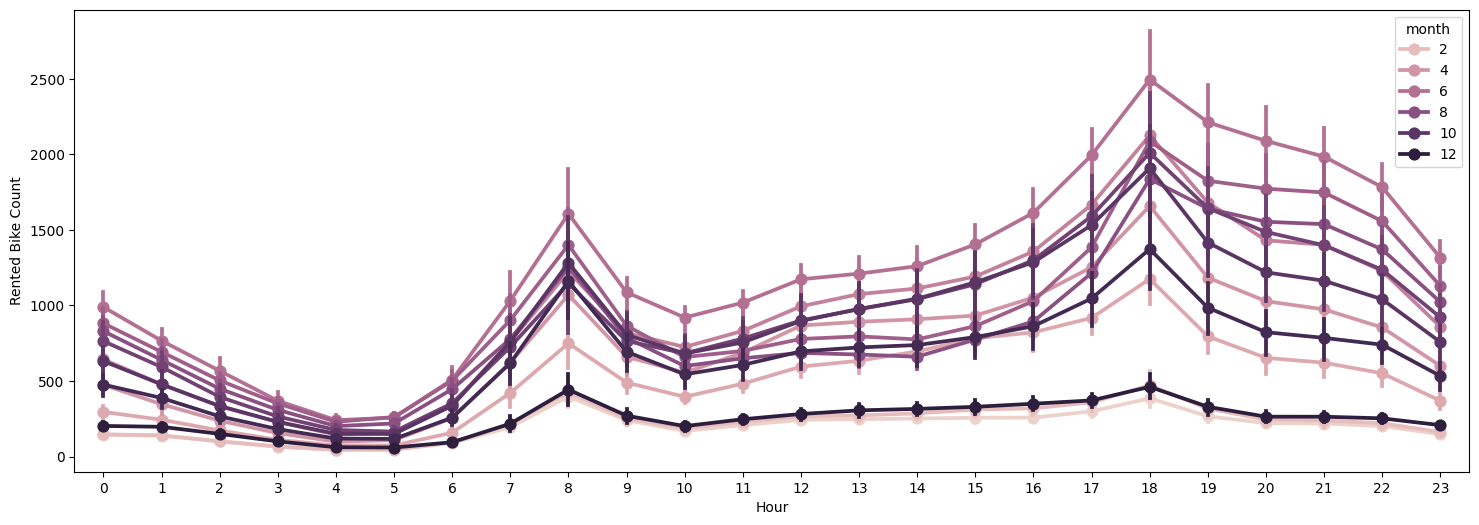

In [19]:
# Chart - 3 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,6))
sns.pointplot(x = df['Hour'], y = df['Rented Bike Count'], hue = df['month'])
plt.show()

##### 1. Why did you pick the specific chart?

To do a multivariate analysis among Hour, Rented Bike Count and Months

##### 2. What is/are the insight(s) found from the chart?

June is the peak and January is the bottom months for number of rented bikes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights obtained have the potential to significantly benefit the business. By understanding how different months influence the number of rented bikes, we can develop targeted strategies.

#### Chart - 4
# Bike Rent Count trend with respect Hours on Seasons.

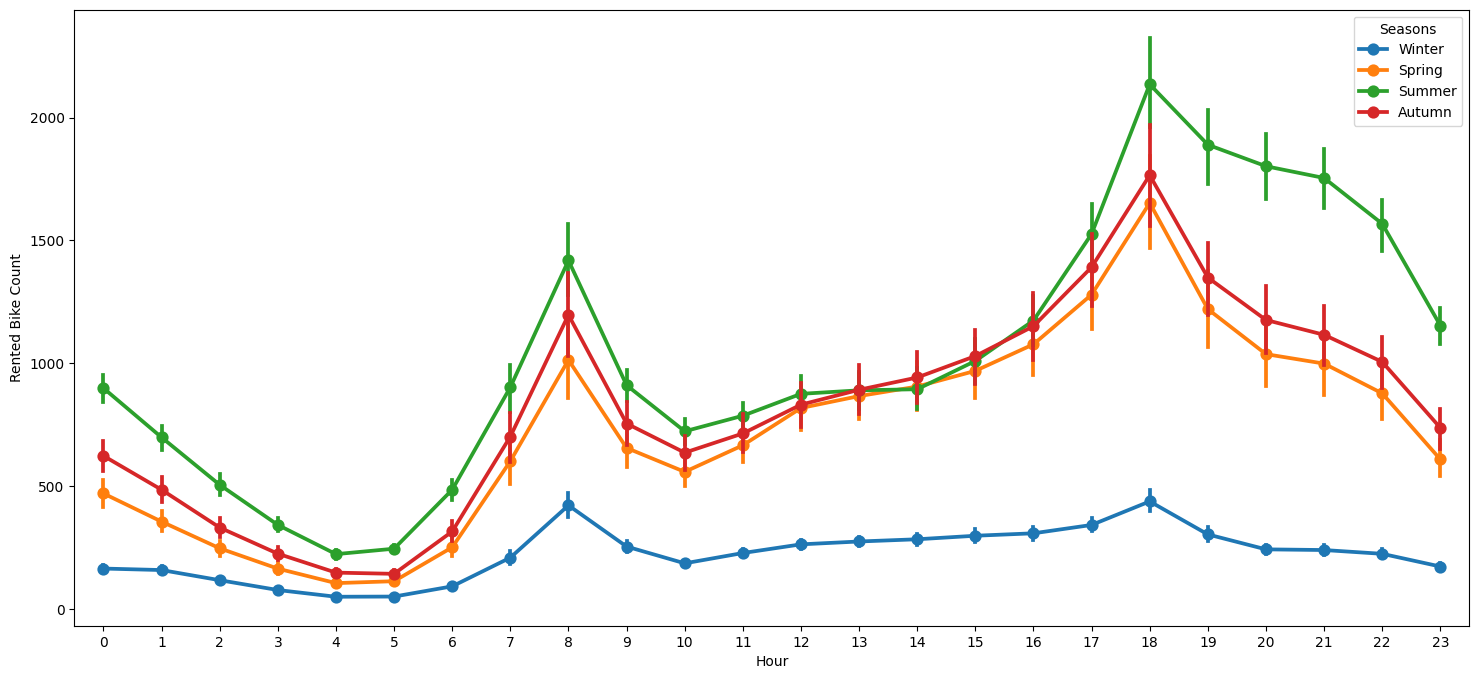

In [20]:
# Chart - 4 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,8))
sns.pointplot(x = df['Hour'], y = df['Rented Bike Count'], hue = df['Seasons'])
plt.show()

##### 1. Why did you pick the specific chart?

To do a multivariate analysis among Hour, Rented Bike Count and Months

##### 2. What is/are the insight(s) found from the chart?

People prefer renting bikes most in the Summer season and the least in winter season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how Seasons impact the number of rented bikes, we can make strategies accordingly.

#### Chart - 5
# Bike Rent Count trend with respect Hours on Days.

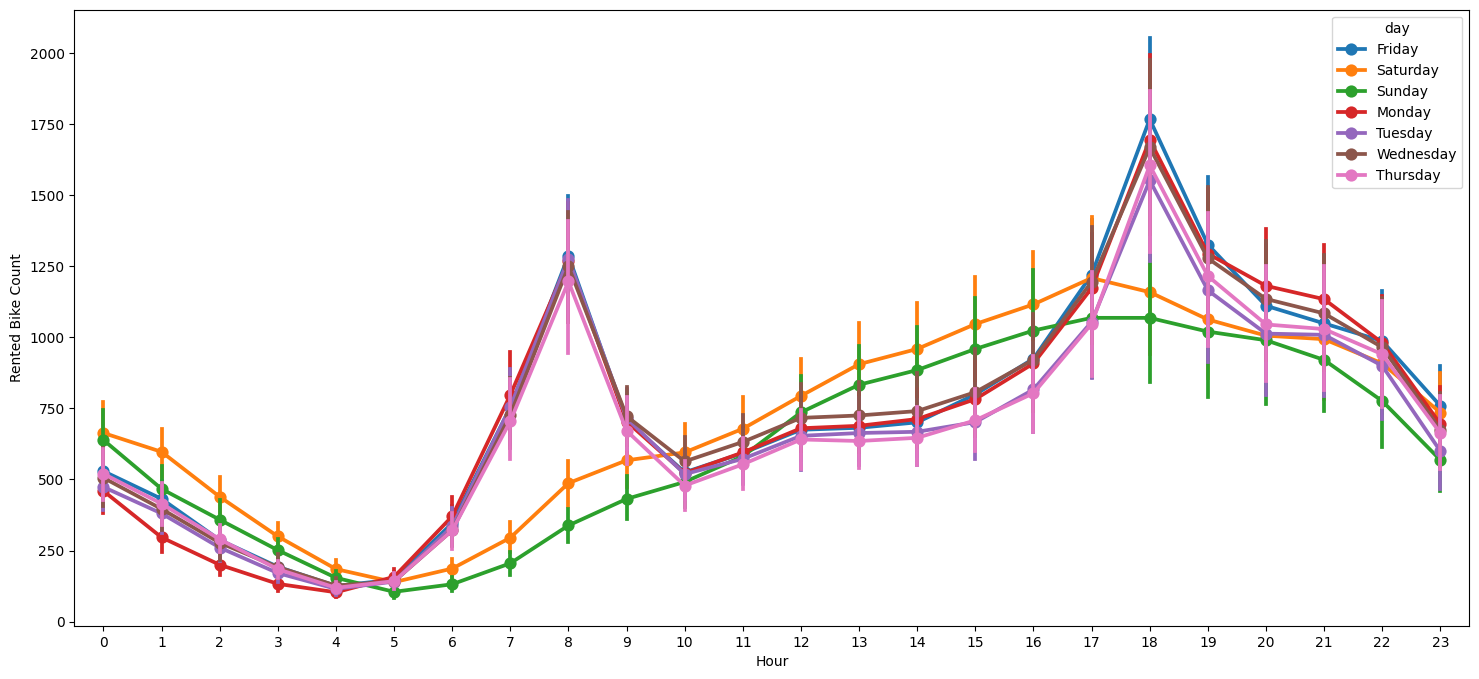

In [21]:
# Chart - 5 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,8))
sns.pointplot(x = df['Hour'], y = df['Rented Bike Count'], hue = df['day'])
plt.show()

##### 1. Why did you pick the specific chart?

To do a multivariate analysis among Hour, Rented Bike Count and Day.

##### 2. What is/are the insight(s) found from the chart?

Highest no. of bikes are booked on Thursday and the least on Sunday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how Days impact the number of rented bikes, we can make strategies accordingly.

#### Chart - 6
# Bike Rent Count trend with respect Hours on Holidays.

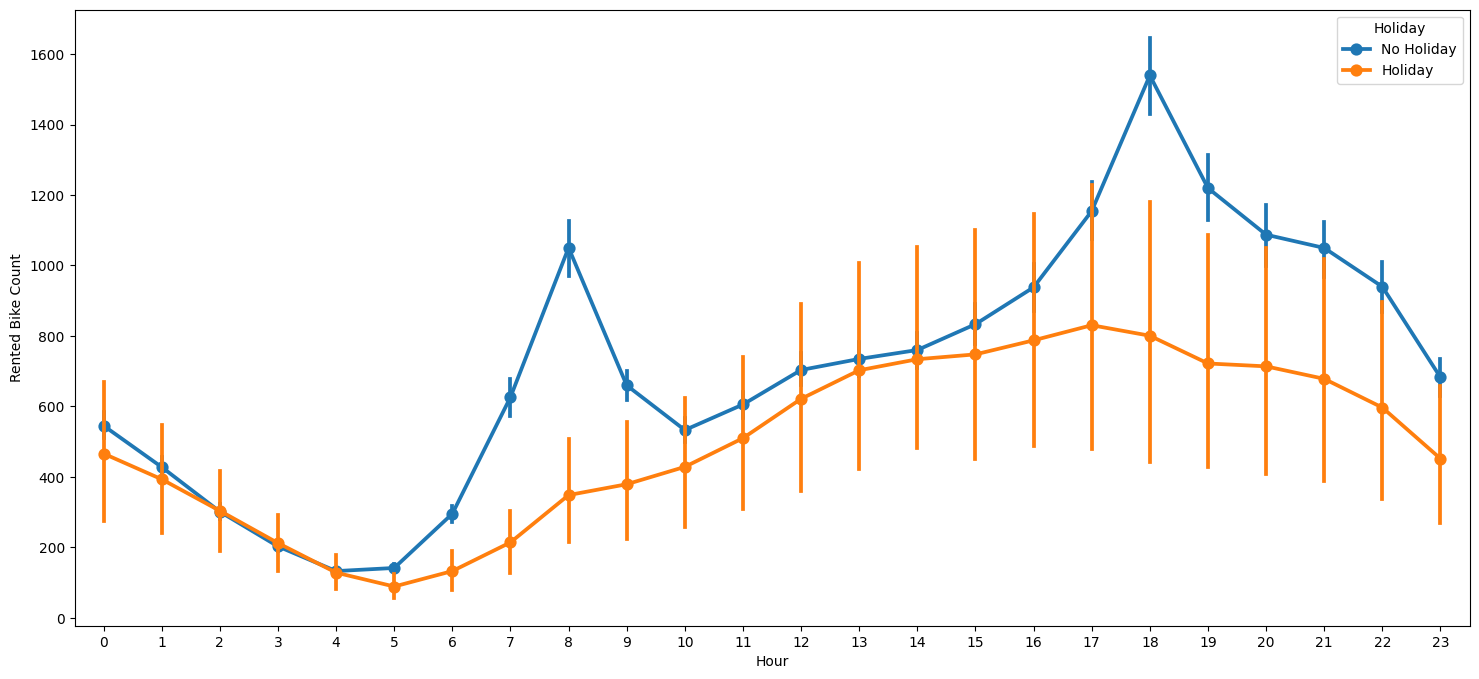

In [22]:
# Chart - 6 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,8))
sns.pointplot(x = df['Hour'], y = df['Rented Bike Count'], hue = df['Holiday'])

plt.show()

##### 1. Why did you pick the specific chart?

To do a multivariate analysis among Hour, Rented Bike Count and Holiday.

##### 2. What is/are the insight(s) found from the chart?

People rented more bikes on a non-holiday compared to a holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how Holidays impact the number of rented bikes, we can make strategies accordingly.

#### Chart - 7
# visualizing outliers using box plot of numeric columns.

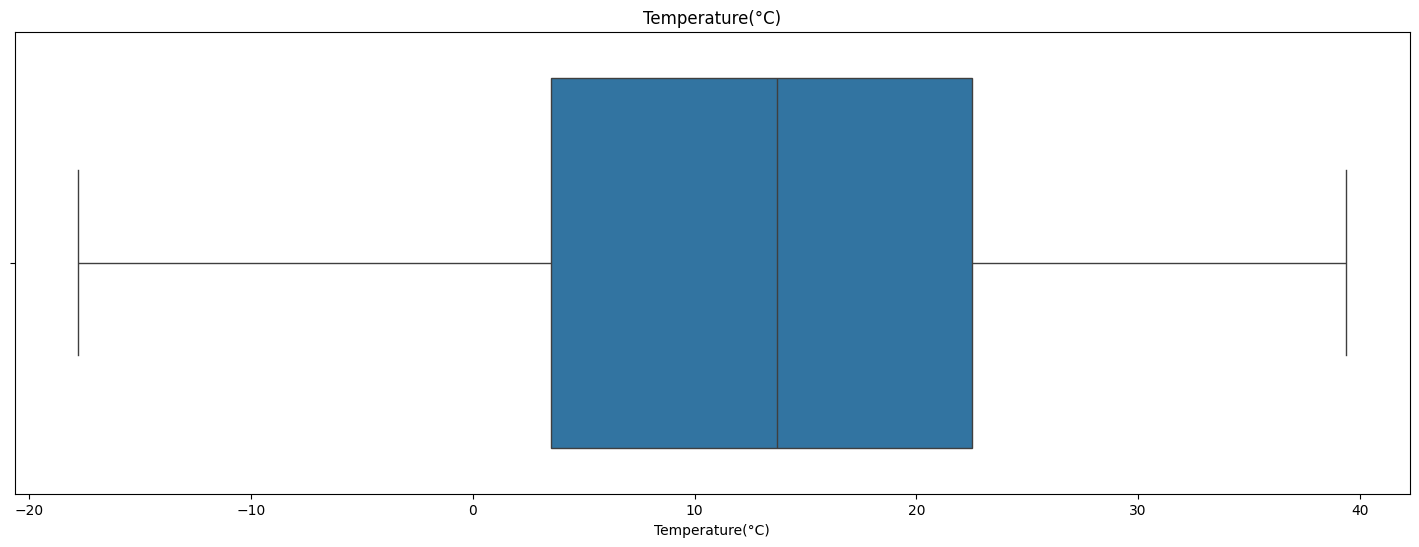

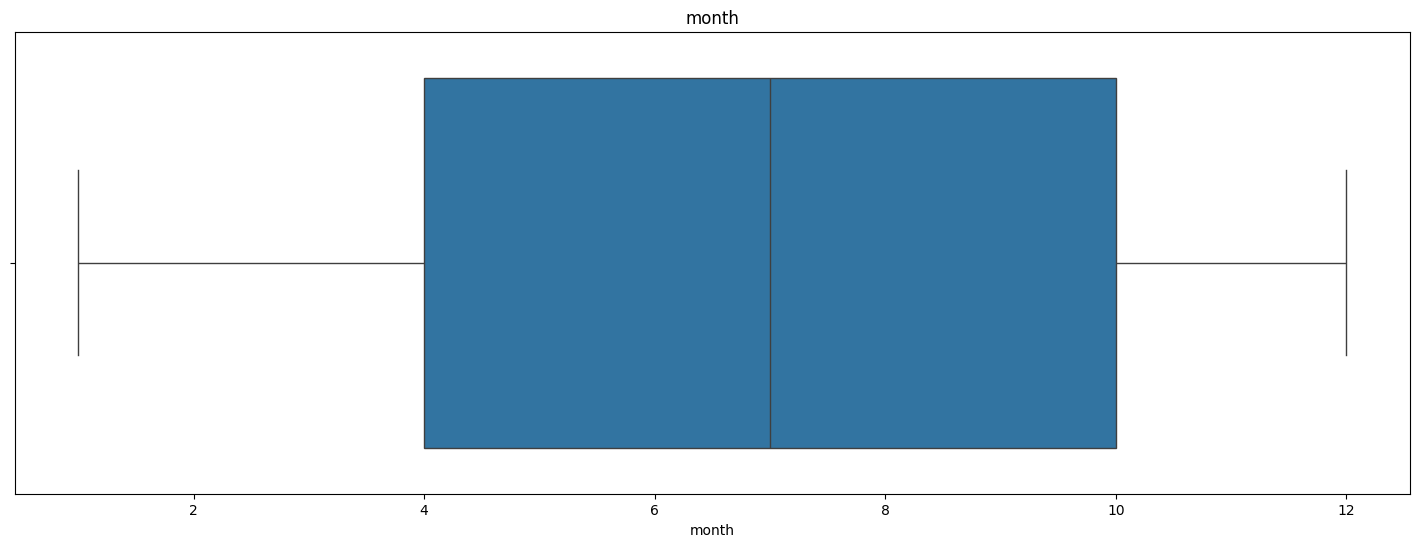

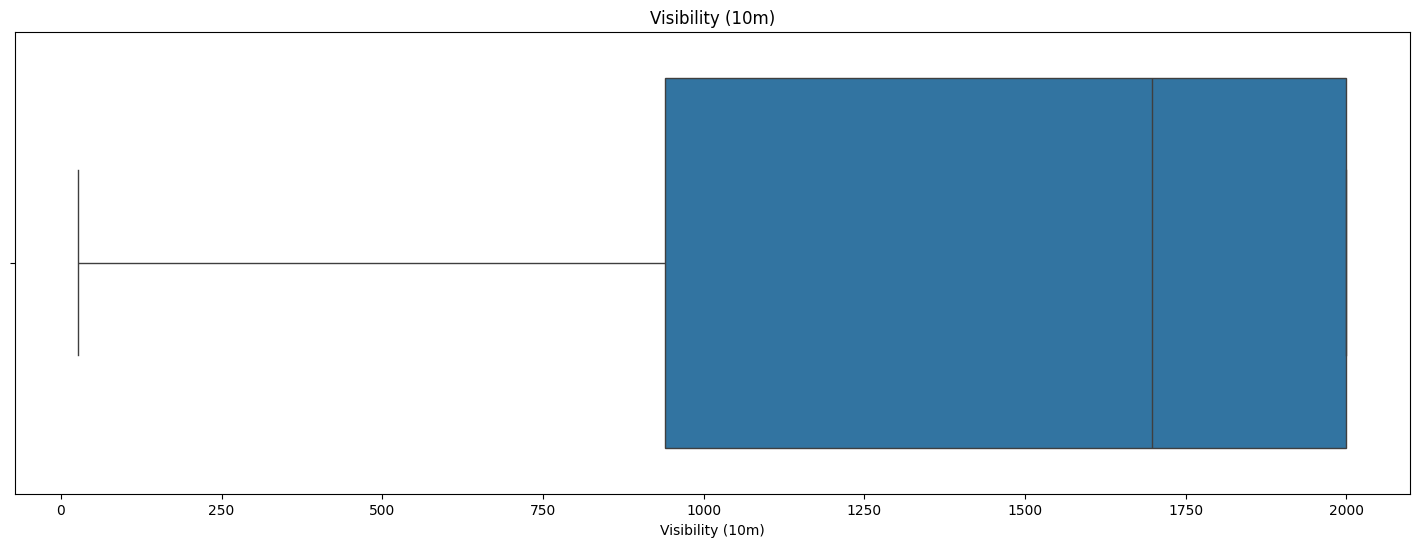

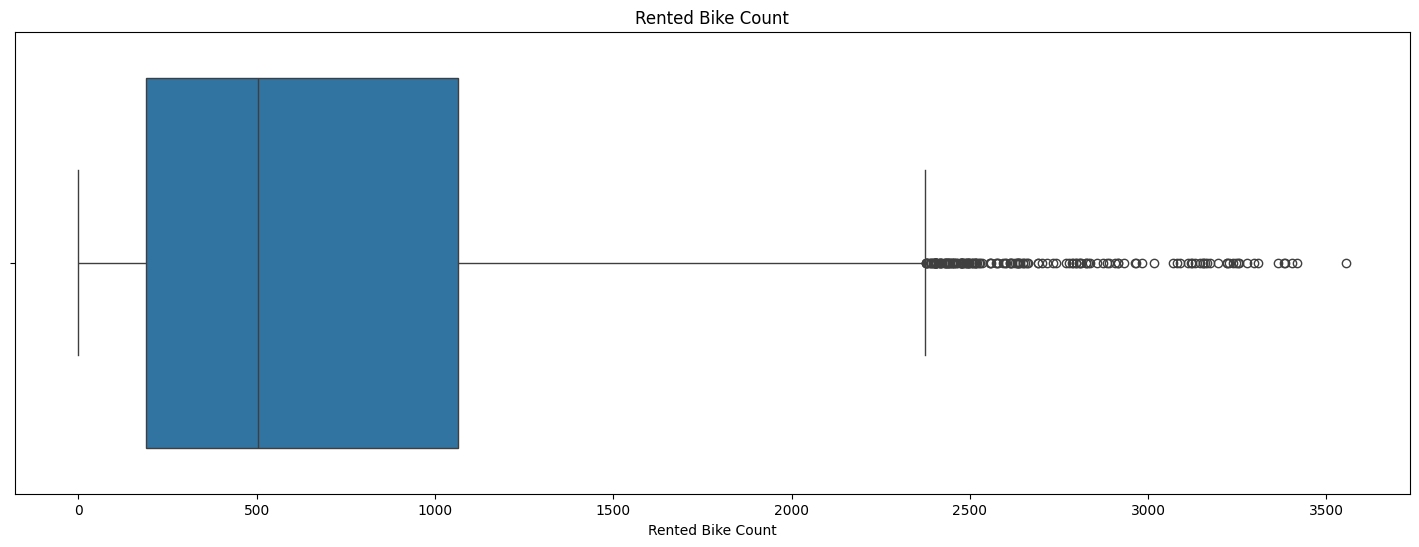

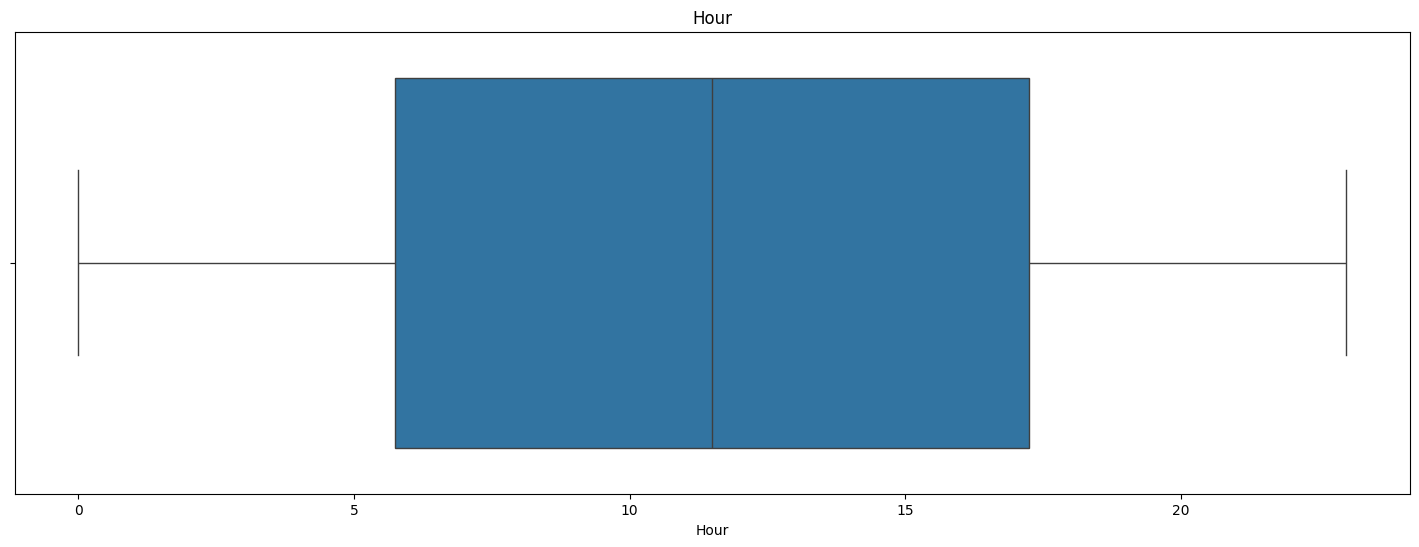

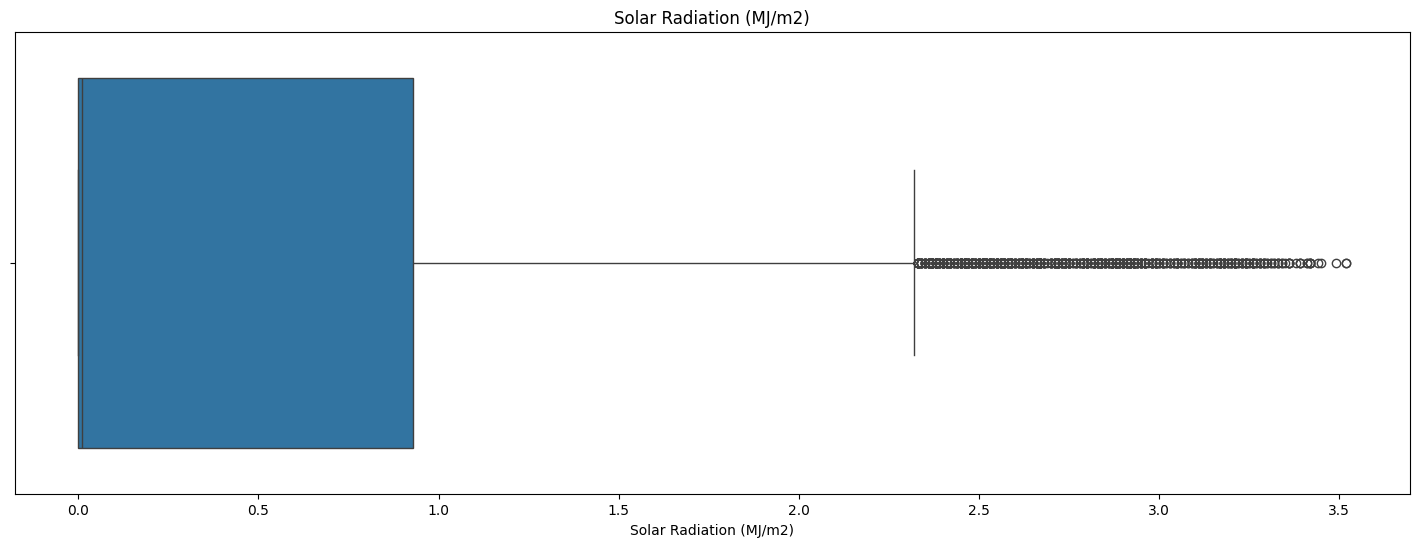

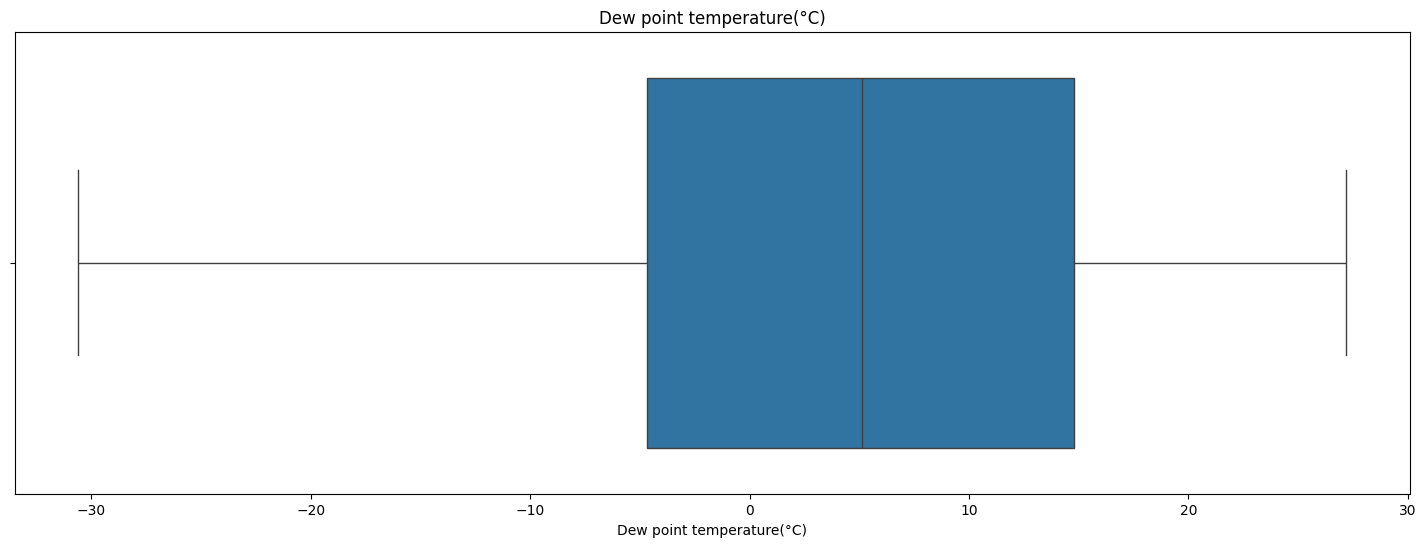

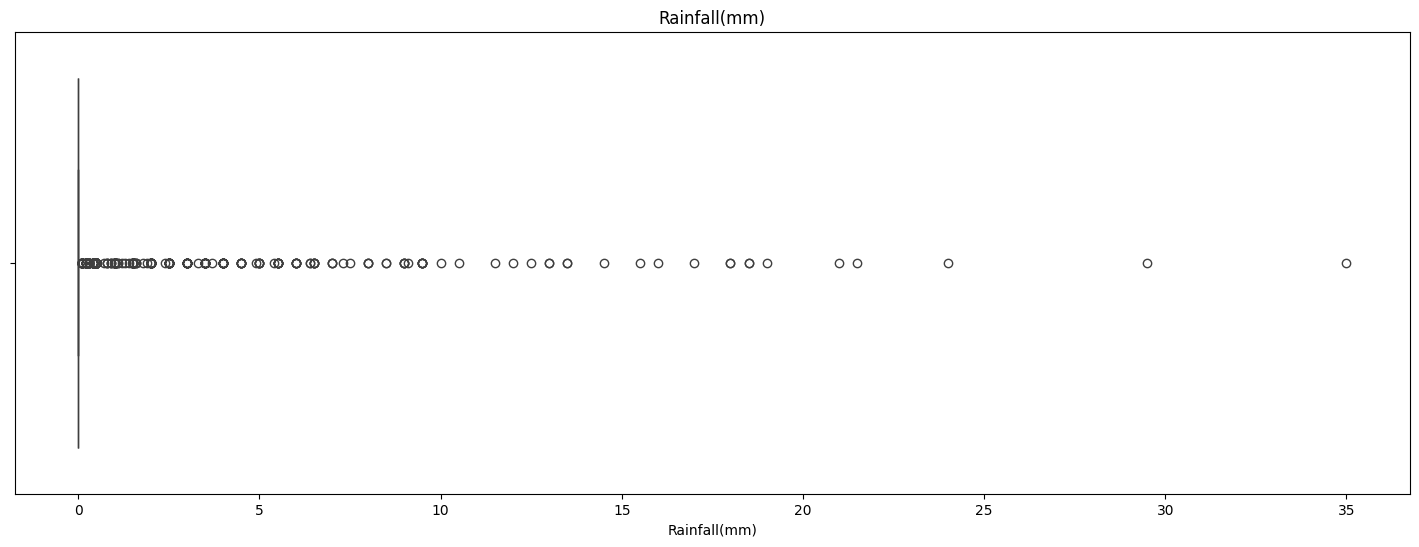

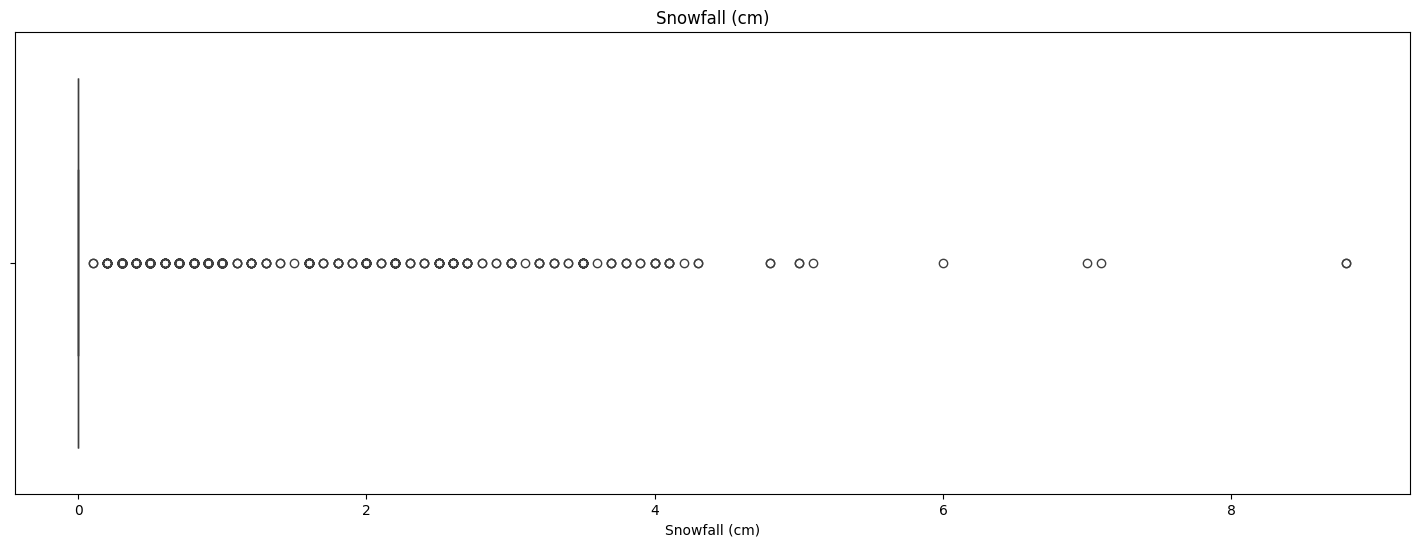

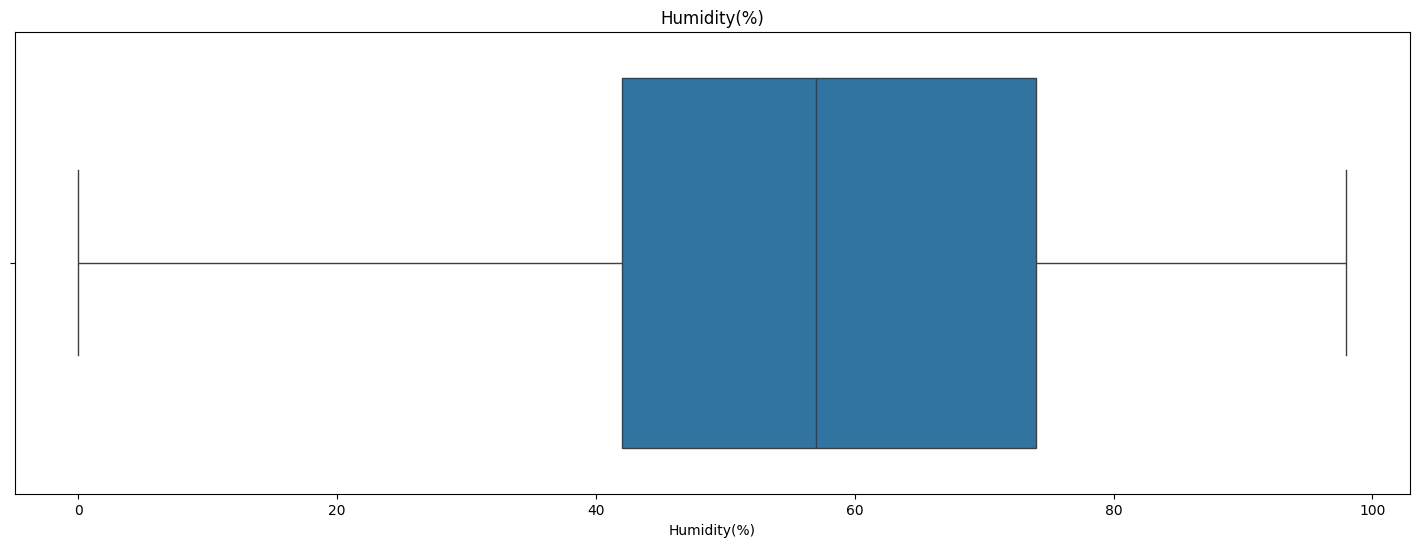

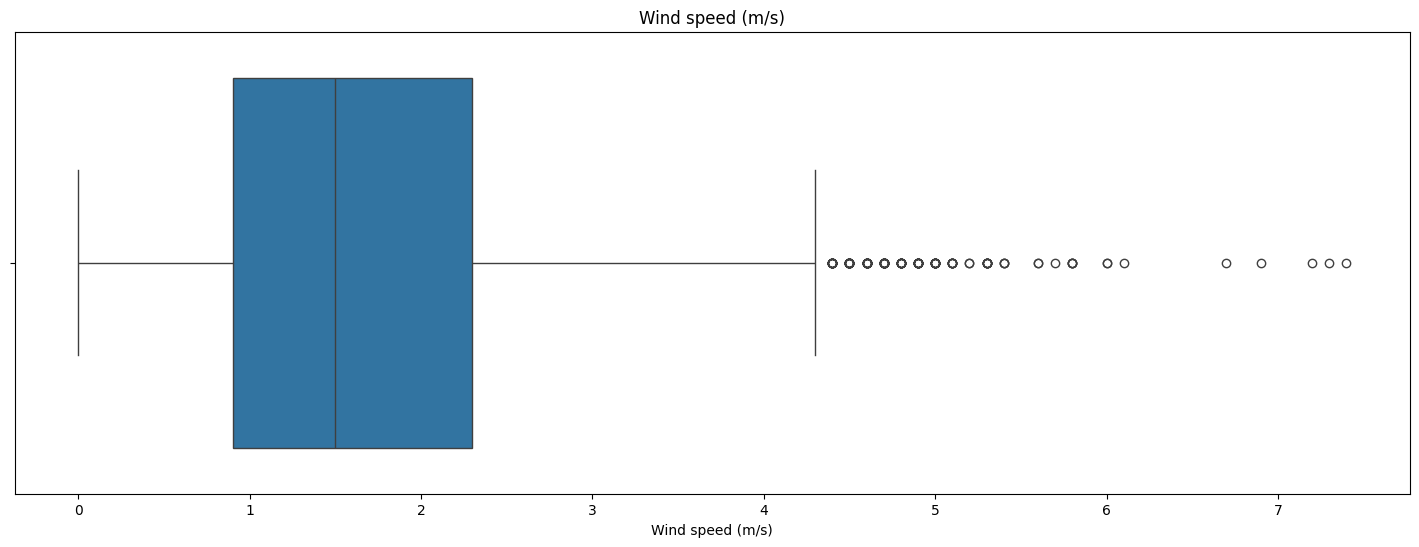

In [23]:
# Chart - 7 visualization code

# Writing code for creating a for loop for numerical variables and creting box plots.

for i in numerical_data:
  plt.figure(figsize = (18,6))
  sns.boxplot(x = df[i])
  plt.title(i)
  plt.show()

##### 1. Why did you pick the specific chart?

Using Boxplots as we need to identify outliers.

##### 2. What is/are the insight(s) found from the chart?

Rainfall, Solar Radiation, Snowfall and Windspeed has high numbers of outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Outliers can sometimes signal potential avenues for business expansion. For instance, if a few customers are renting bikes at a much higher rate compared to the average customer, they might form a niche market segment. This group could be targeted with tailored promotions or marketing strategies.

#### Chart - 8
# Lets check the linear relationship between the dependent variable-"Rented Bike Count' and remaining columns(independent variables).

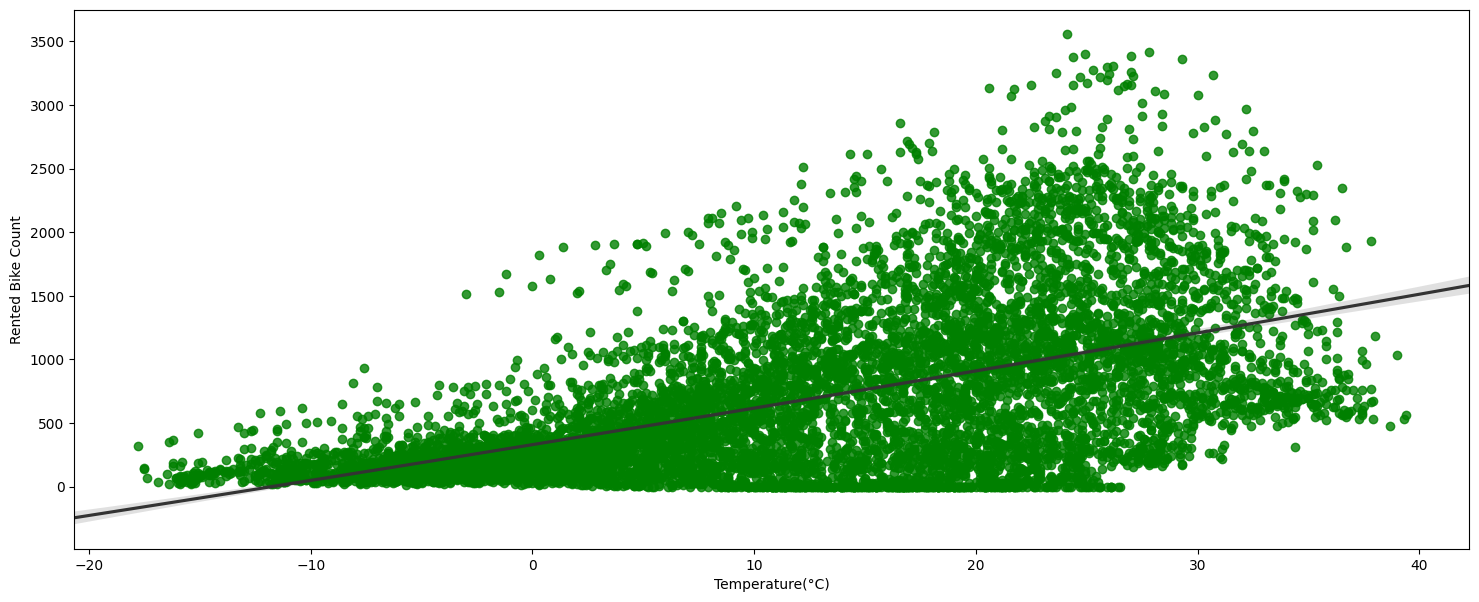

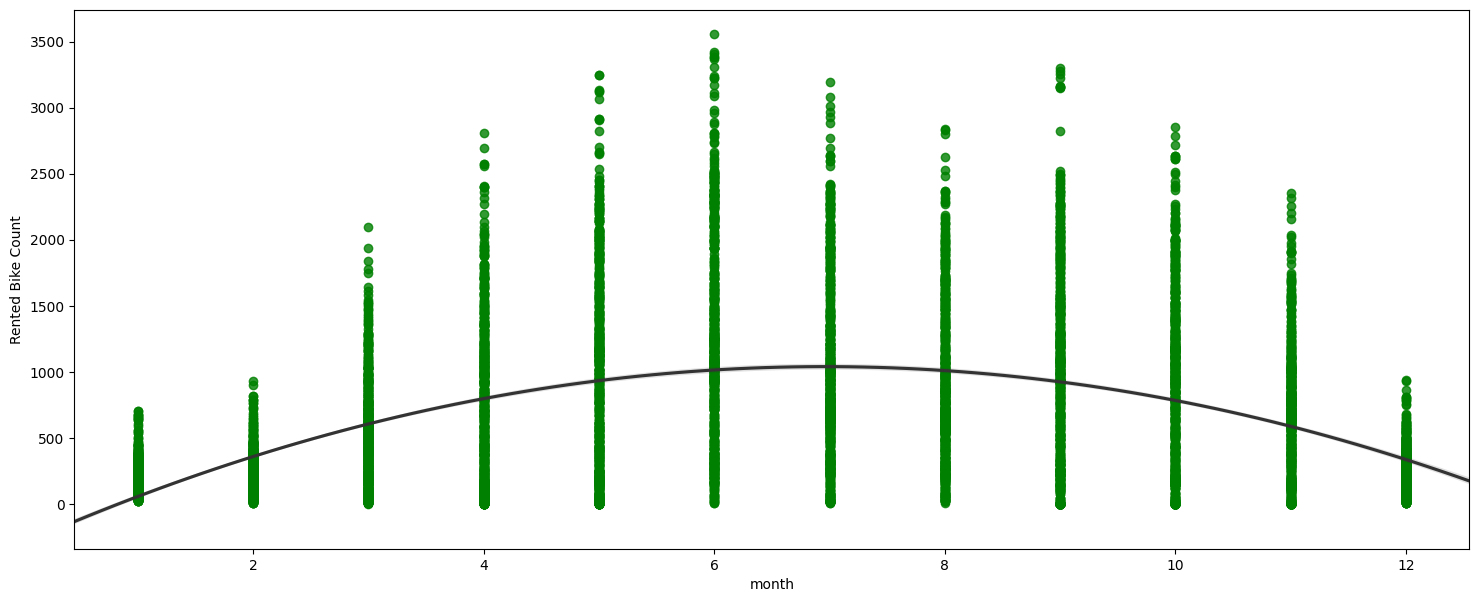

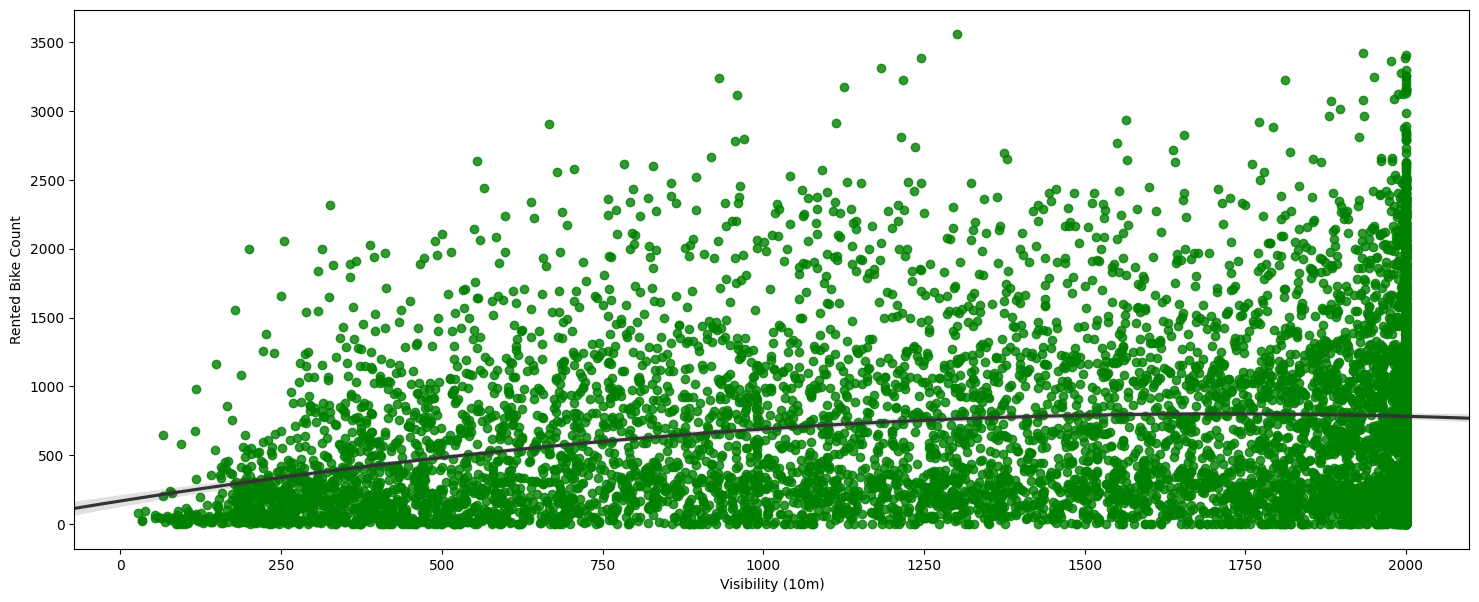

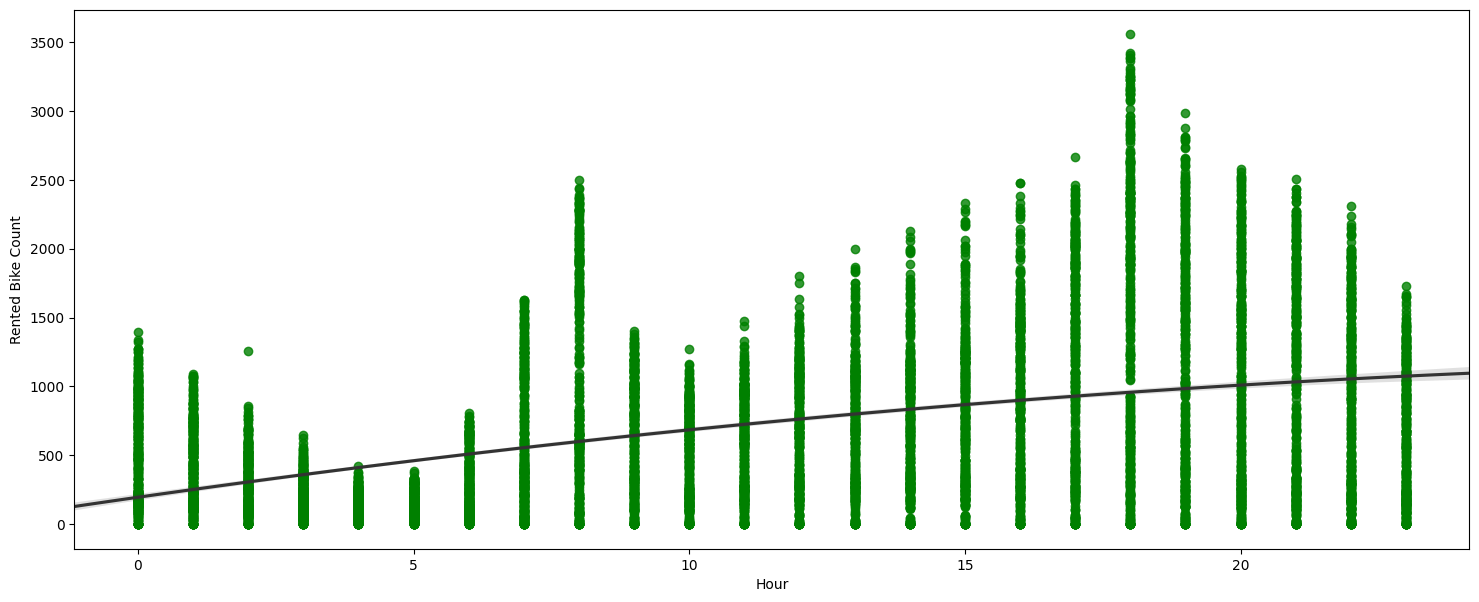

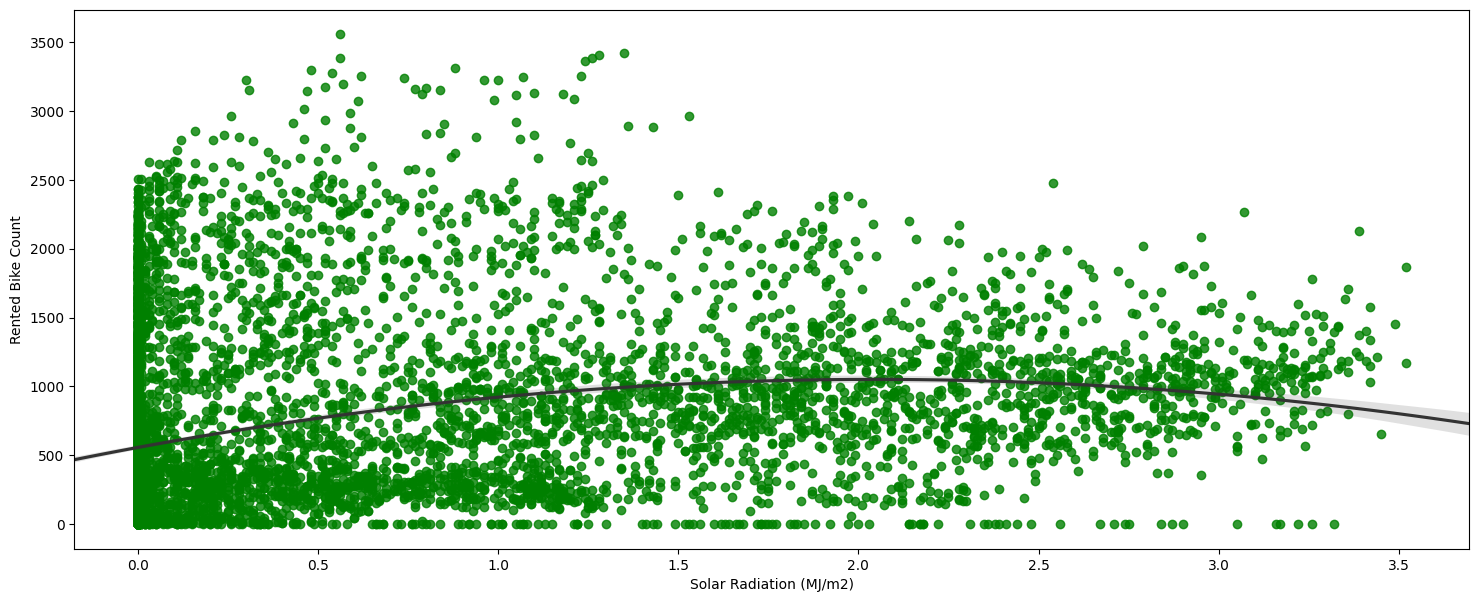

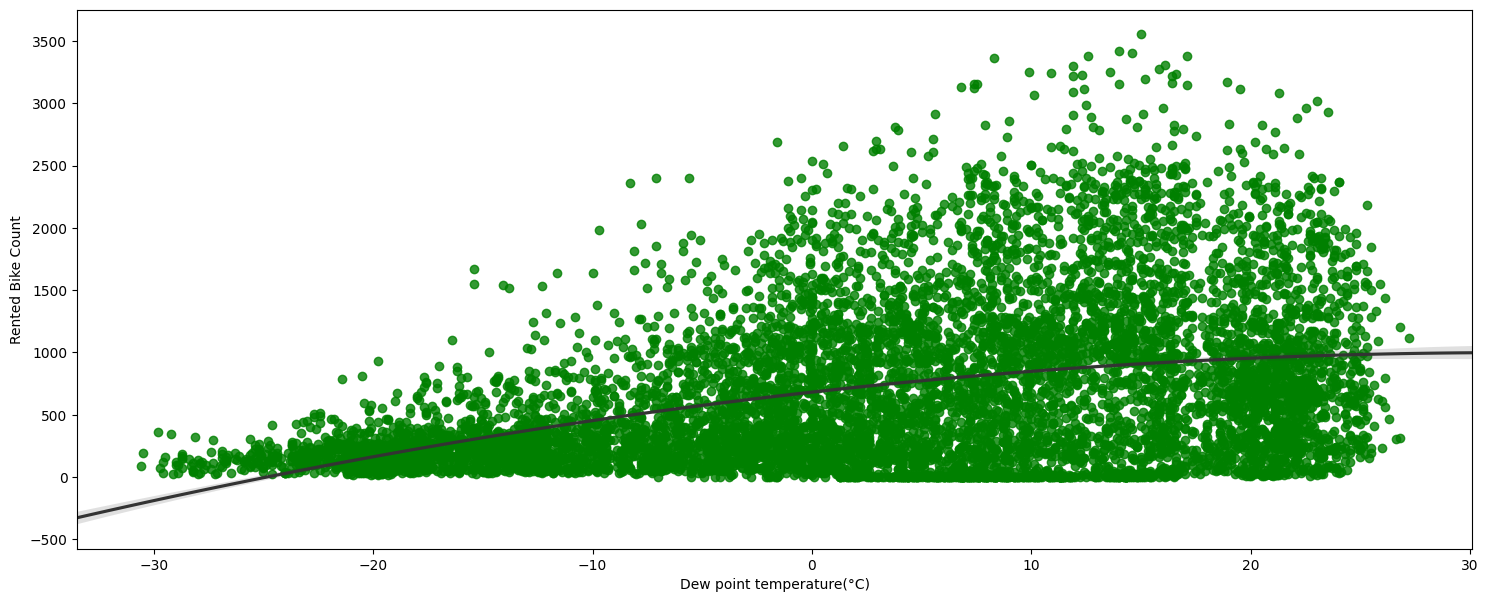

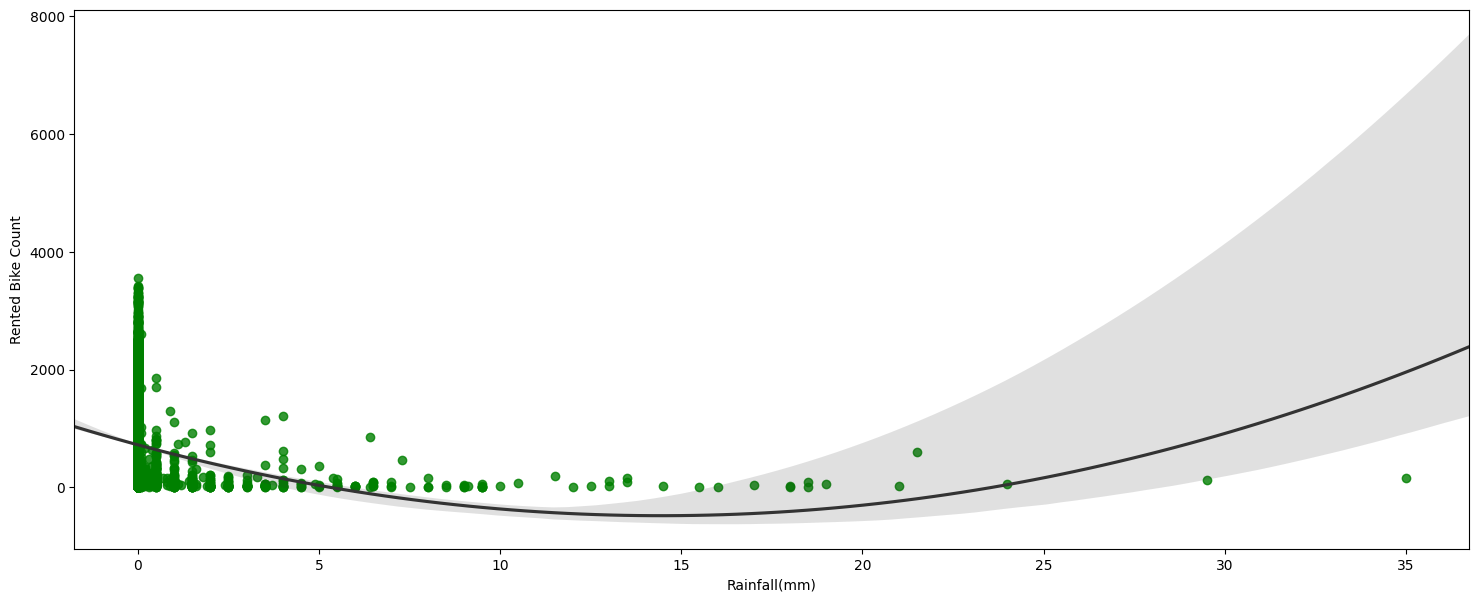

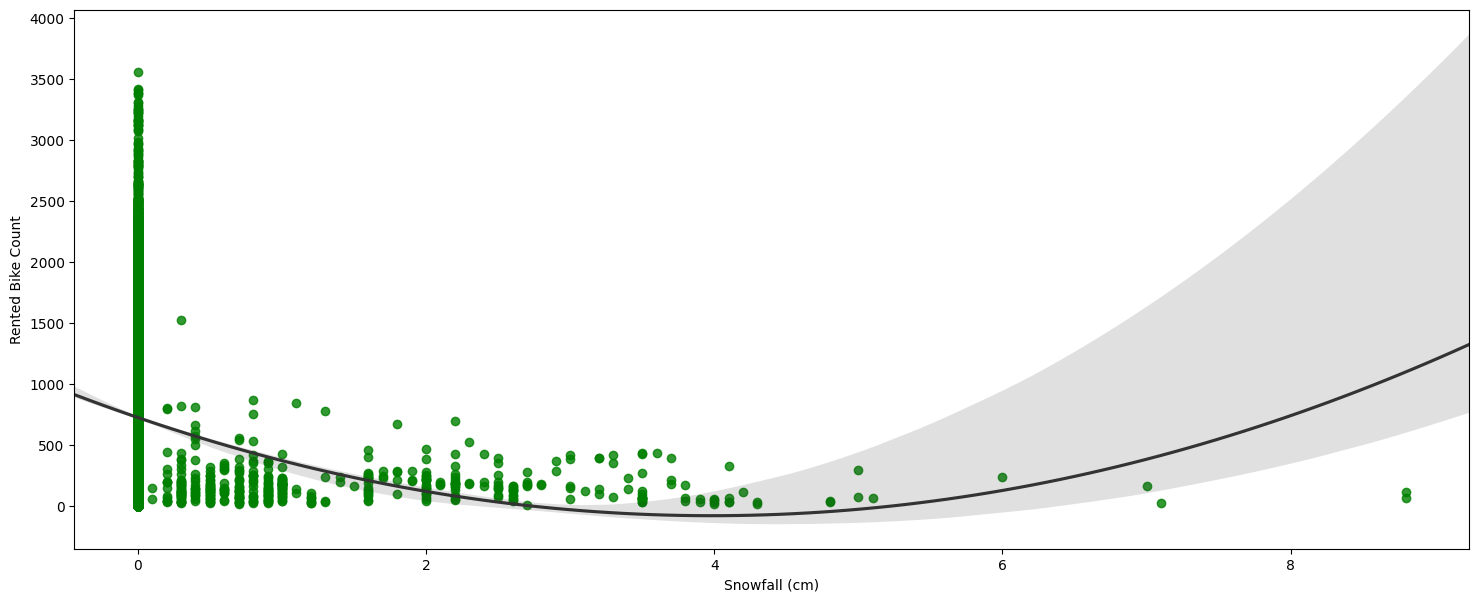

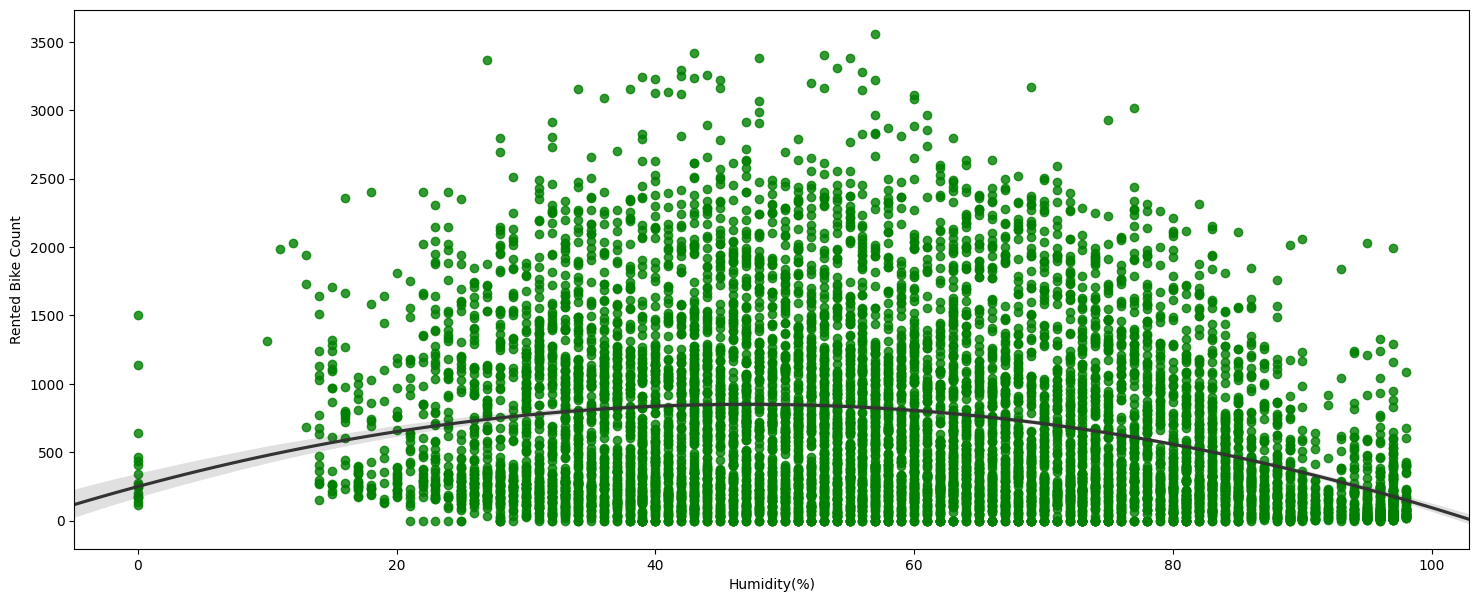

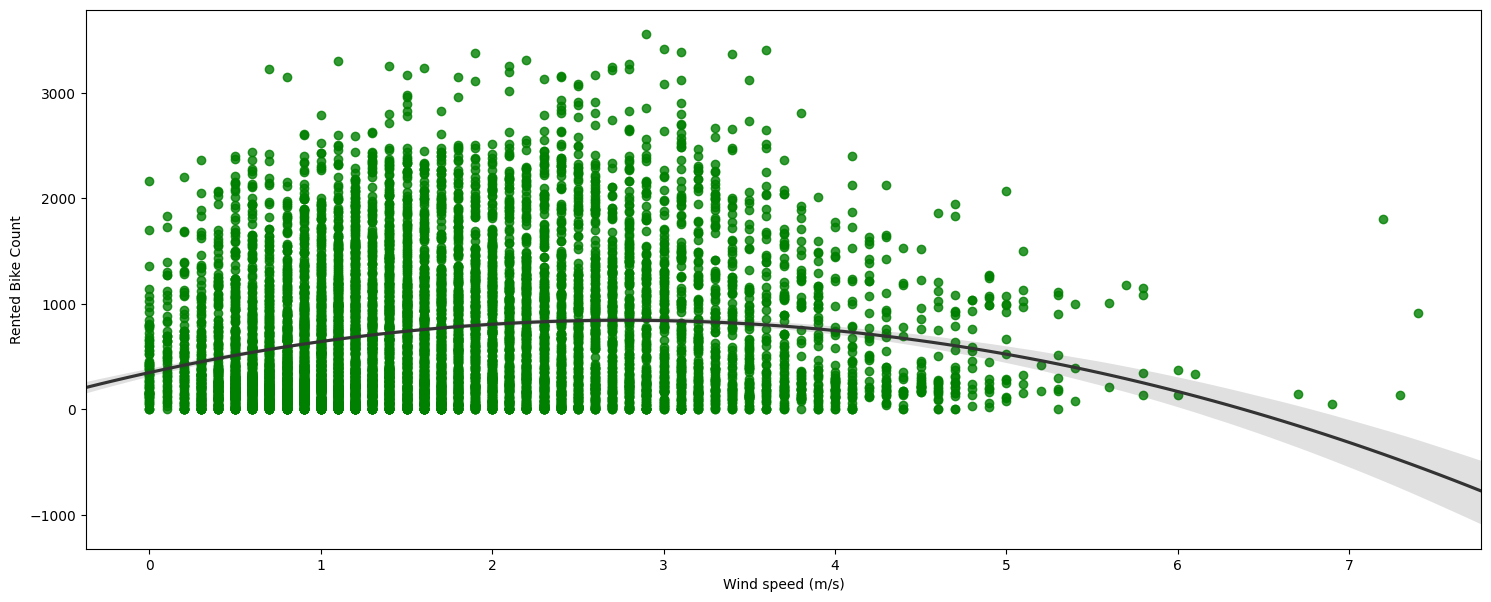

In [24]:
# Chart - 8 visualization code using regplot.
for i in numerical_data:
  if i not in ['Rented Bike Count']:
    fig = plt.figure(figsize = (18,7))
    fig = plt.gca()

    sns.regplot(
        data=df, x=i, y="Rented Bike Count",
        truncate=False, order=2, color=".2",scatter_kws={'color':'green'}
    )
    plt.show()

##### 1. Why did you pick the specific chart?

I employed a regplot to efficiently illustrate the relationship between two variables and assess whether it follows a linear or non-linear pattern.

##### 2. What is/are the insight(s) found from the chart?

Hourly Trends:
1. A significant peak in bike rental counts occurs between 6/7 AM and 10 AM, likely due to individuals commuting to work or school.
2. Another peak in bike rentals can be seen between 10 AM and 7 PM, which may coincide with people leaving work or school.
3. Overall, bike rentals remain high from 7 AM to 7 PM, but begin to decrease from 7 PM to 7 AM.

Temperature:
1. When the temperature falls below 0°C, bike rental counts drop considerably, possibly because people prefer not to ride in such cold weather.
2. In moderate temperatures, bike rental counts are high, suggesting favorable conditions for biking.

Humidity:
1. There appears to be an inverse relationship between humidity and bike rental counts; as humidity levels rise, bike rentals decline.

Wind Speed:
1. Wind speeds of up to 4 m/s are associated with a good volume of bike rentals.

Visibility:
1. As visibility improves, so do bike rental counts, as better visibility likely encourages biking.

Dew Point Temperature:
1. The trend with dew point temperature mirrors that of regular temperature; when dew point temperature falls below 0°C, bike rentals decrease. Dew point and regular temperature seem closely related.

Solar Radiation:
1. A large number of bikes are rented when there is solar radiation, suggesting favorable weather conditions for biking.

Rainfall and Snowfall:
1. It's clear that people generally avoid riding bikes in rainy or snowy conditions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights we've gathered can significantly contribute to a positive business outcome by revealing how various factors influence bike rental numbers. This knowledge allows us to develop targeted strategies based on these relationships.

#### Chart - 9

# Visualizing the data distribution on the dependent variable before normalization.



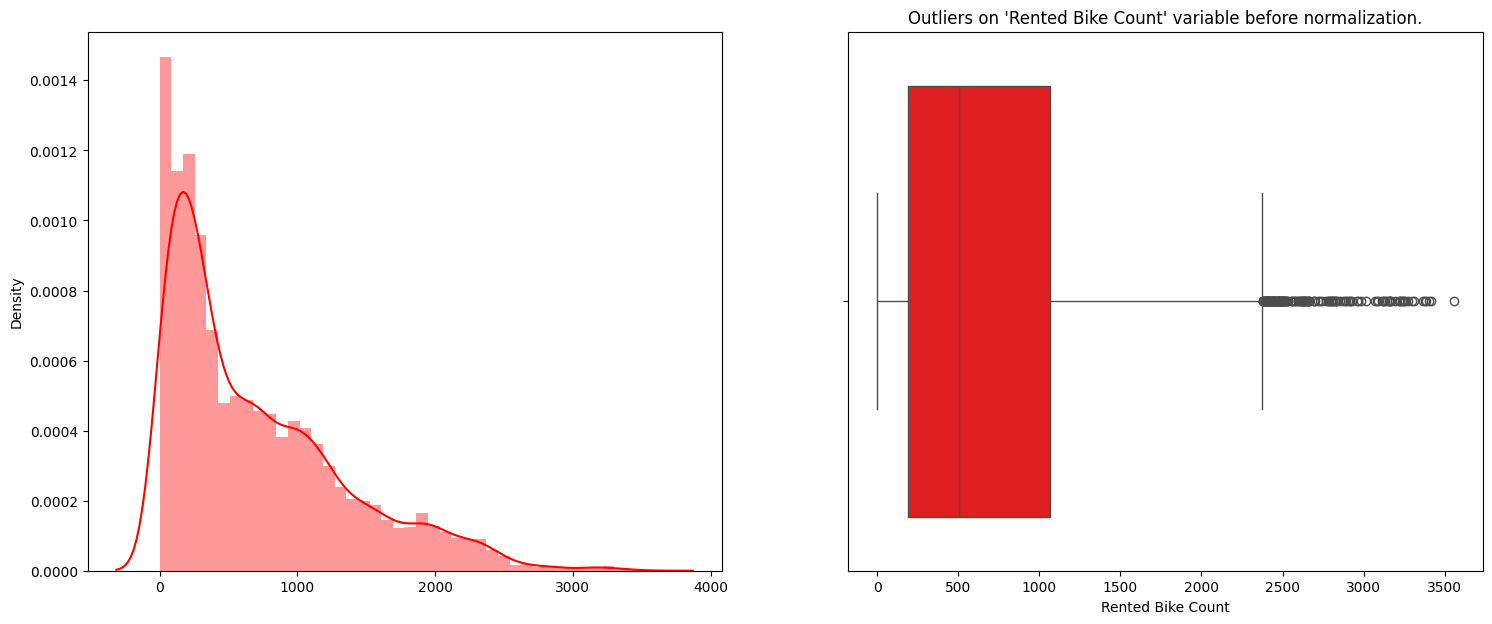

In [25]:
# Chart - 9 visualization code

# Visualizing the data distribution on the dependent variable using distplot and boxplot charts.

f, axes = plt.subplots(1, 2,figsize=(18,7))
sns.distplot(x=(df['Rented Bike Count']),color='r',ax=axes[0])
sns.boxplot(x=(df['Rented Bike Count']),color='r',ax=axes[1])
plt.title("Outliers on 'Rented Bike Count' variable before normalization.")
plt.show()

#### Chart - 10

# Visualizing the data distribution on the dependent variable after normalization.

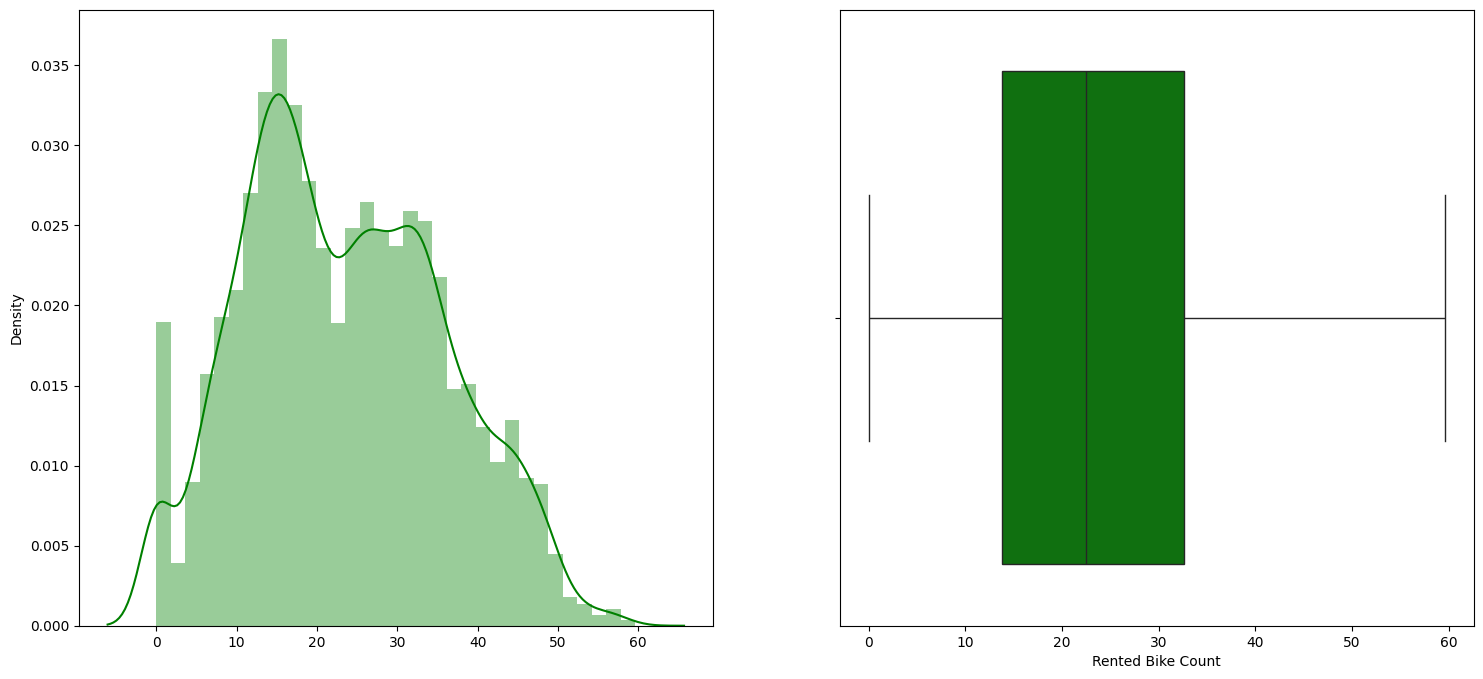

In [26]:
# Chart - 10 visualization code

# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(18,8))
sns.distplot(x=np.sqrt(df['Rented Bike Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(df['Rented Bike Count']),color='g',ax=axes[1])
plt.show()

##### 1. Why did you pick the specific chart?

Used distplot to visualize the distribution of data and using boxplot to detect outliers.

##### 2. What is/are the insight(s) found from the chart?

As we can see from both the charts the distribution of the data is less skewed and is moving towards normally distributed data

The outliers are also gone after normalization.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Improved accuracy, comparability and better visualization are the result of normalization which can improve model performance.

#### Chart - 11

# Visualizing data distribution of numerical data.

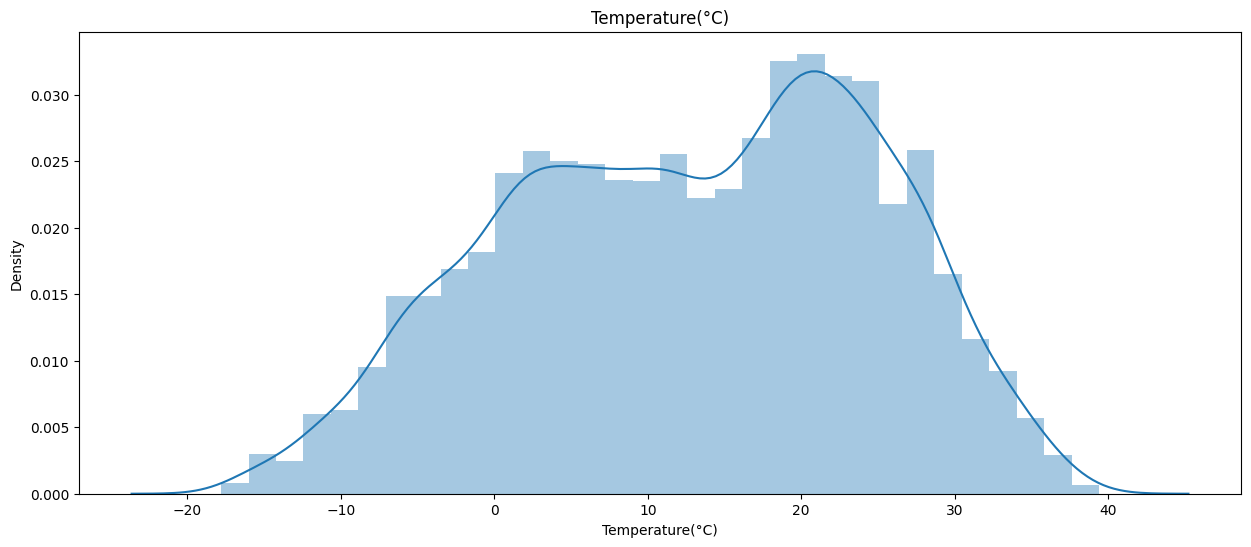

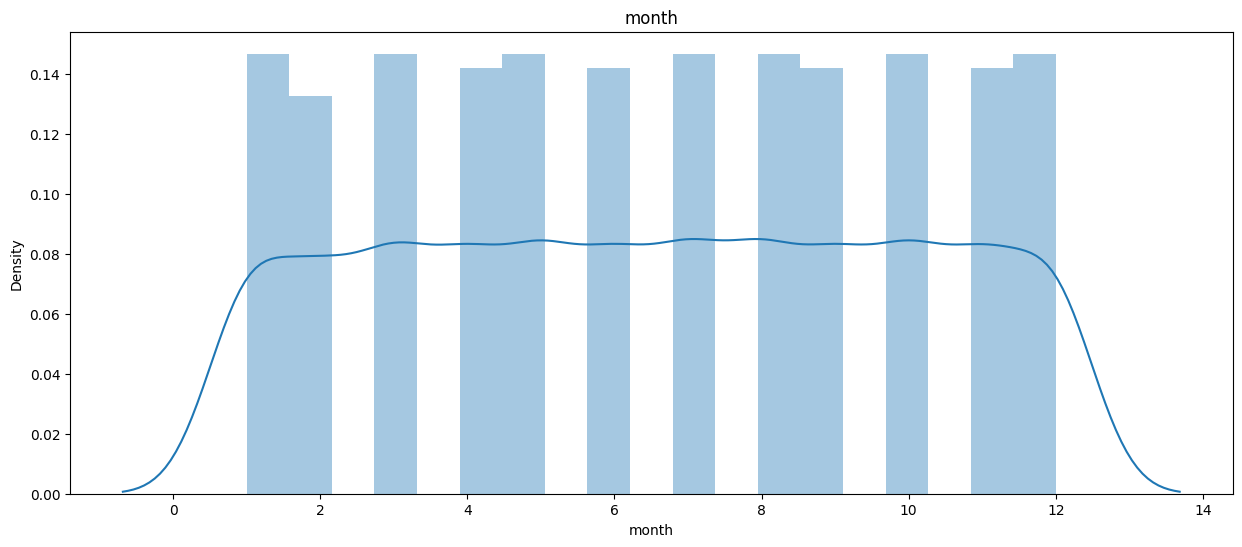

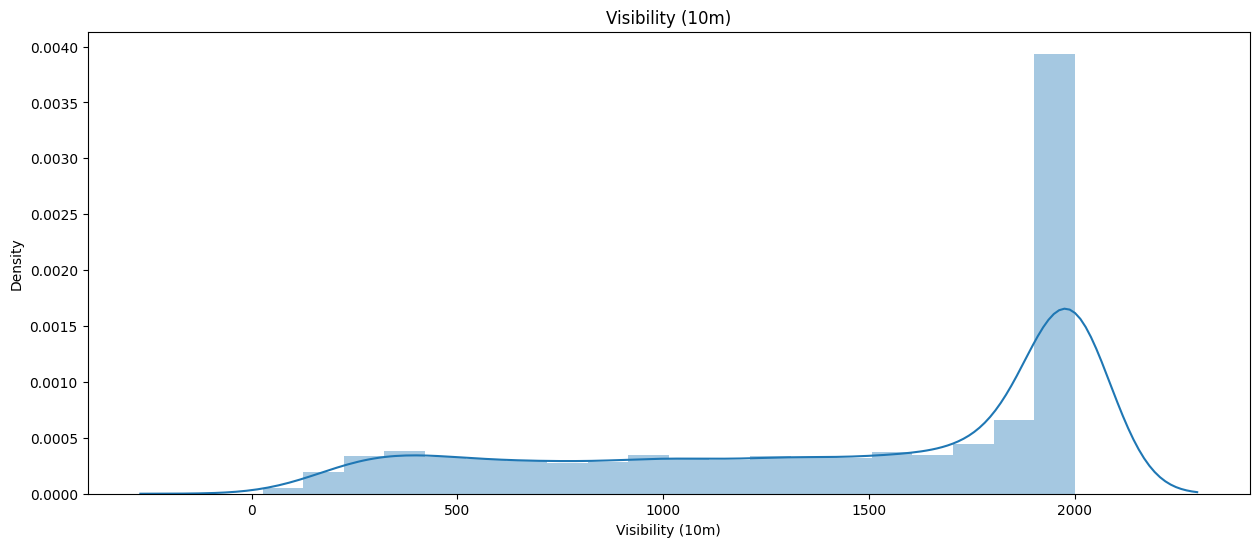

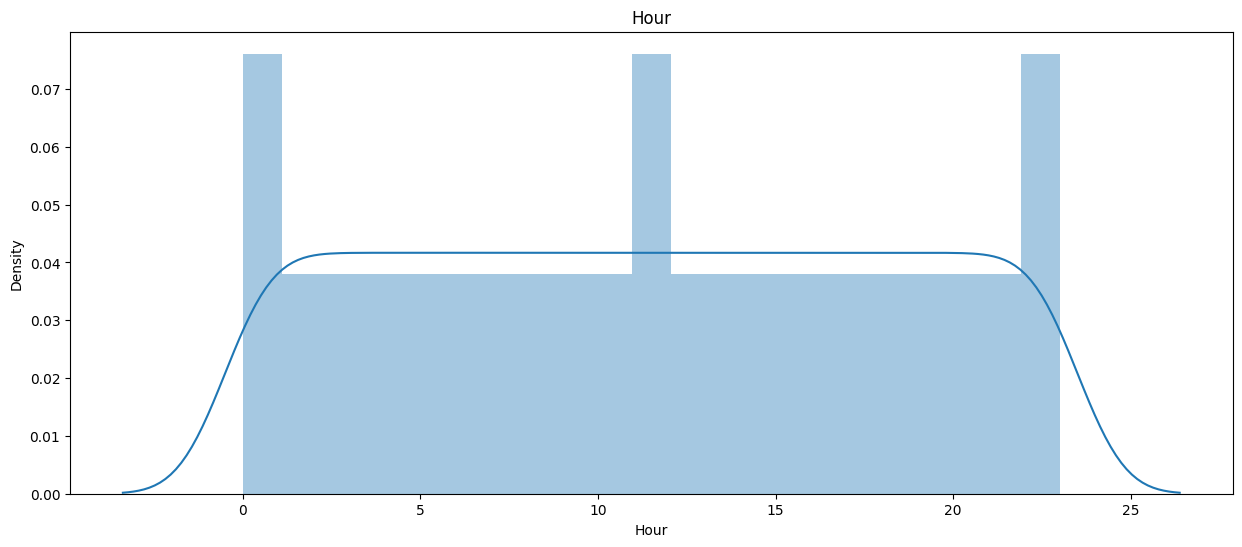

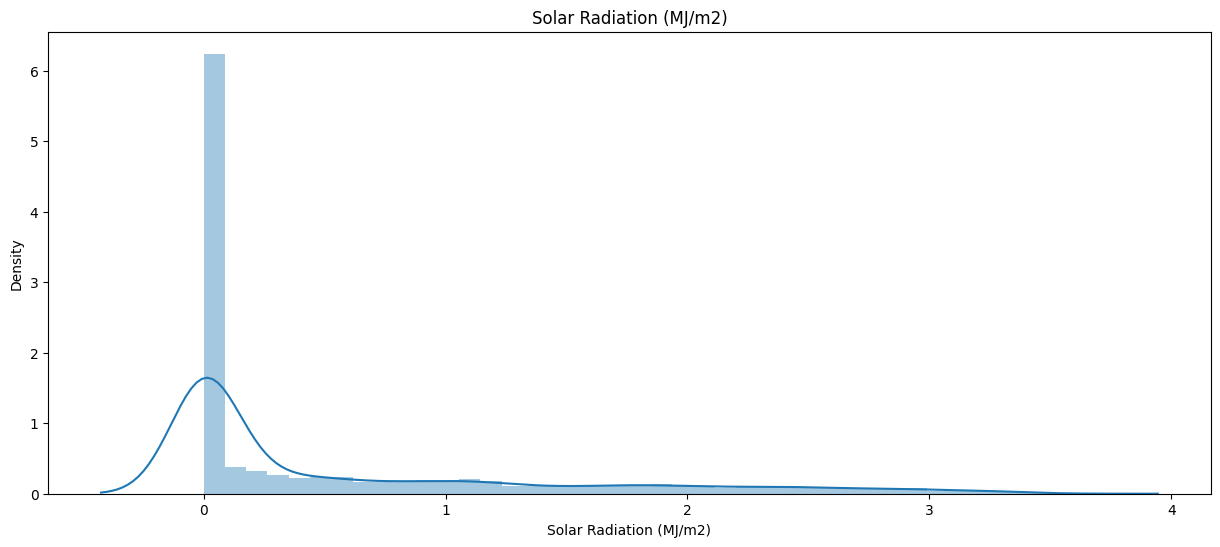

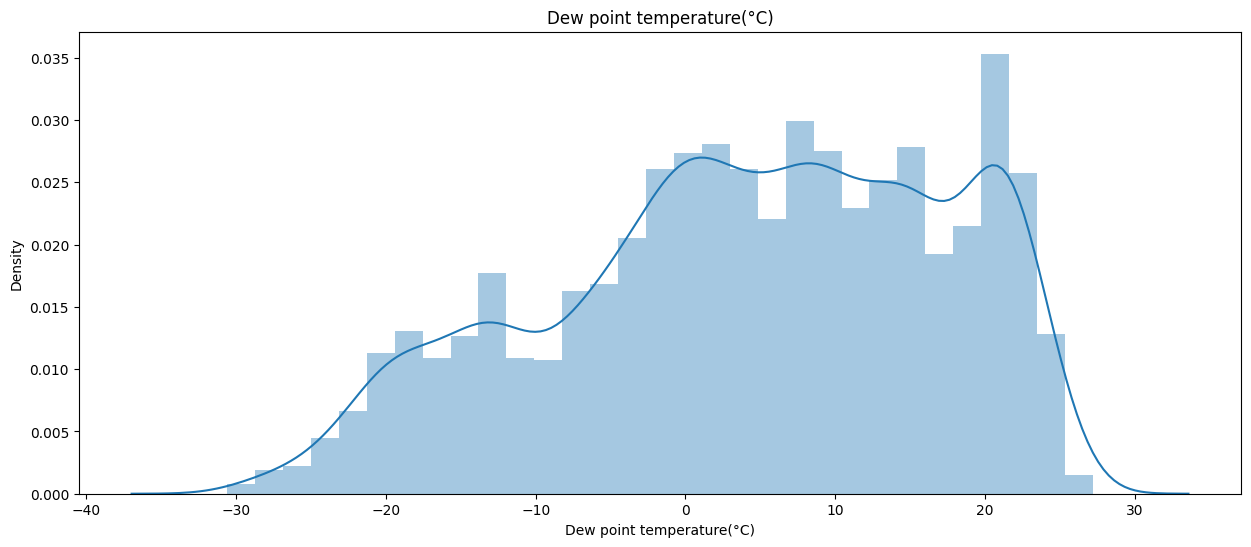

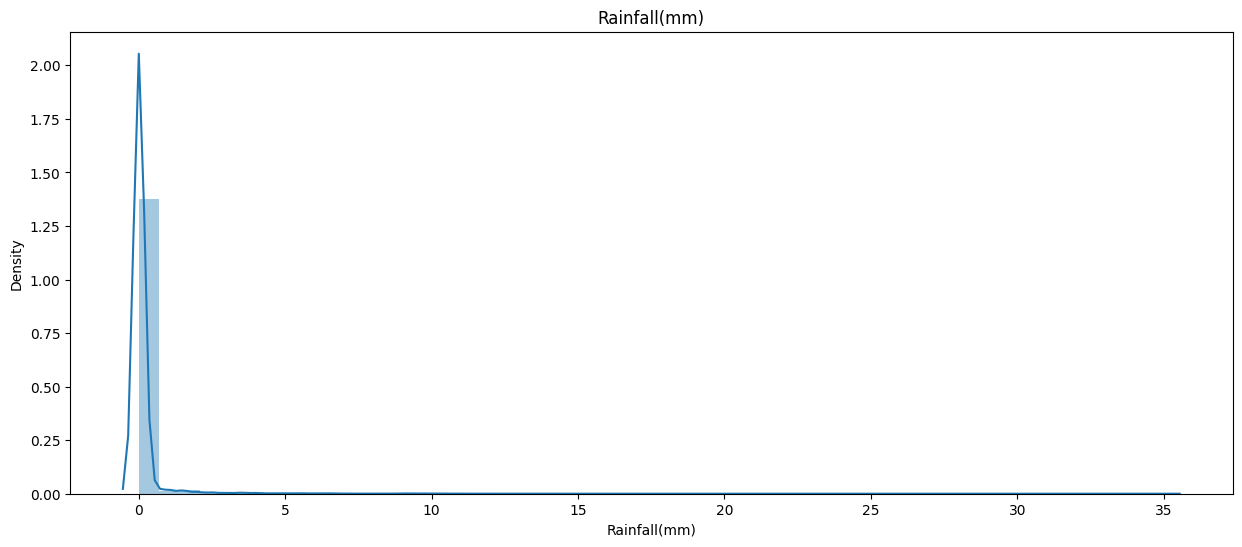

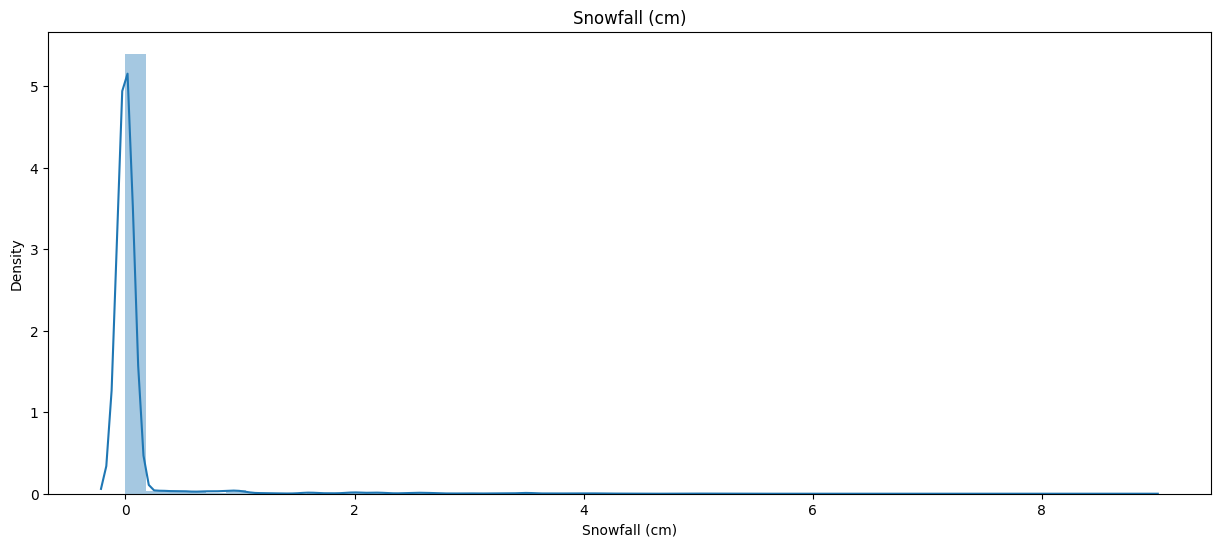

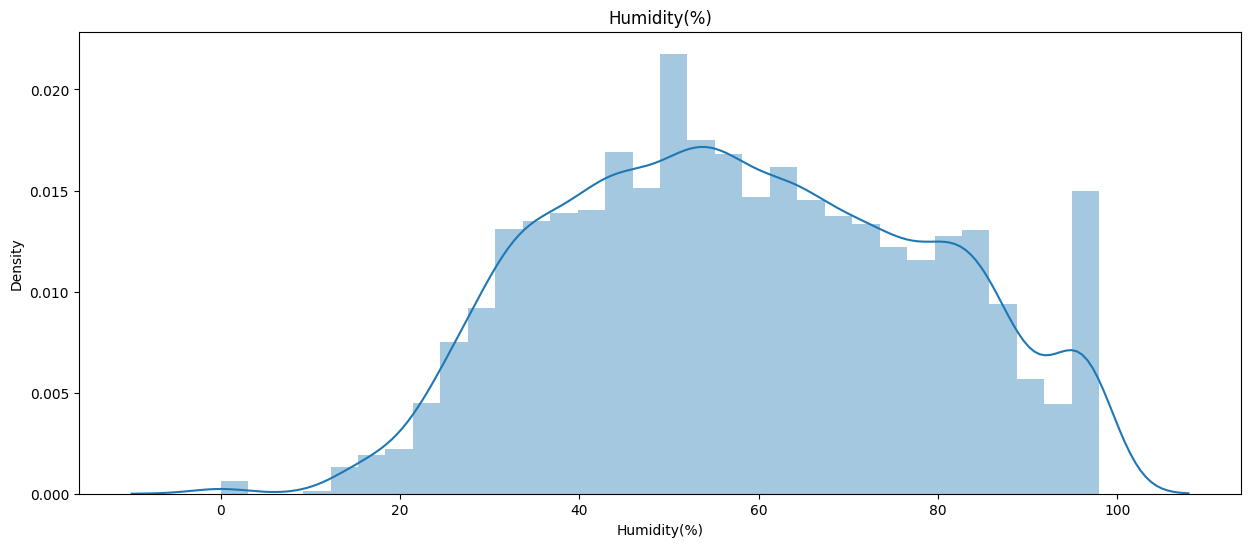

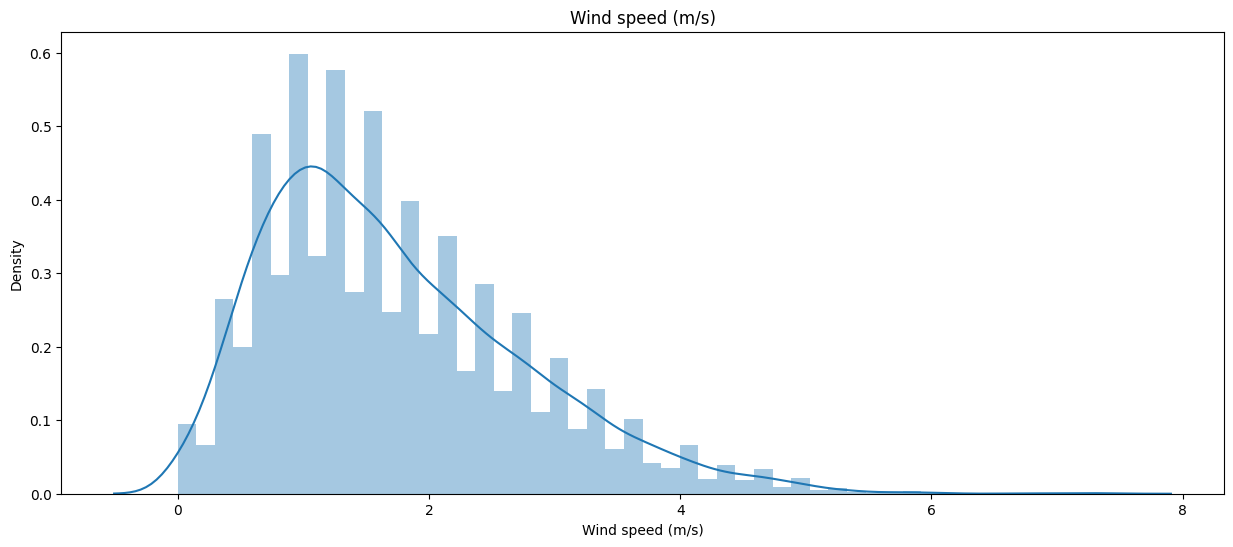

In [27]:
#Chart - 11

# Creating a for loop for visualizing all the numerical variables using distplot.

for i in numerical_data:
  if i not in ['Rented Bike Count']:
    plt.figure(figsize=(15,6))
    plt.title(i)
    sns.distplot(df[i] )
    plt.show()

##### 1. Why did you pick the specific chart?

Distplot is one of the best charts to show the data distribution.

##### 2. What is/are the insight(s) found from the chart?


Solar radiation, Snowfall, Rainfall and visibility are highly skewed.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is evident that weather significantly affects biking patterns since data for solar radiation, snowfall, rainfall, and visibility shows notable skewness. This suggests that people prefer riding a bike when weather conditions are favorable.


#### Chart - 12

# Visualizing the numerical after square root normalization.

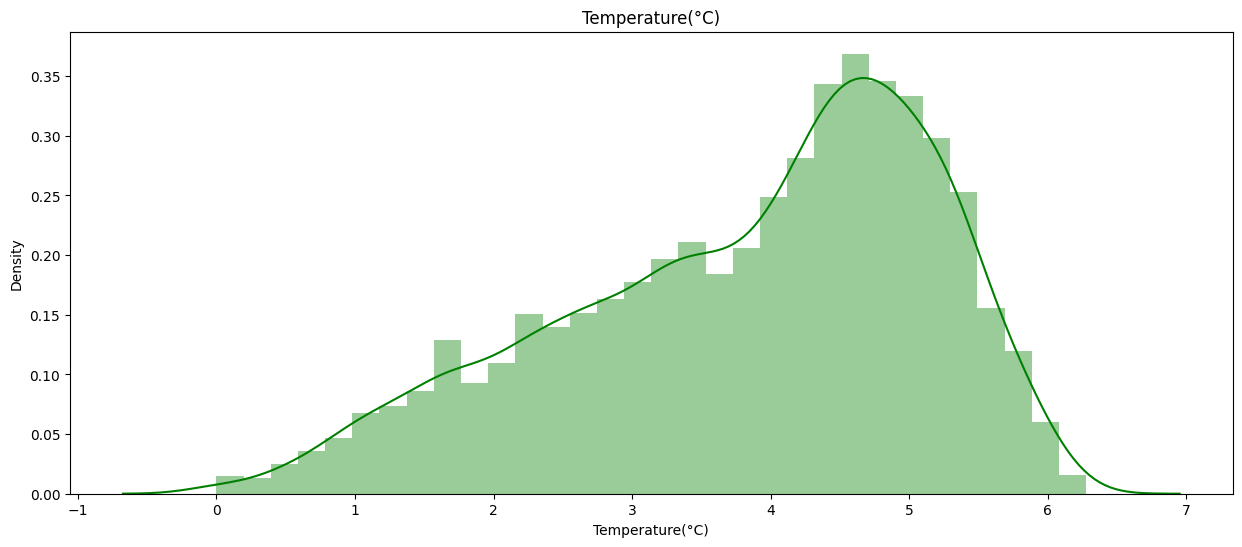

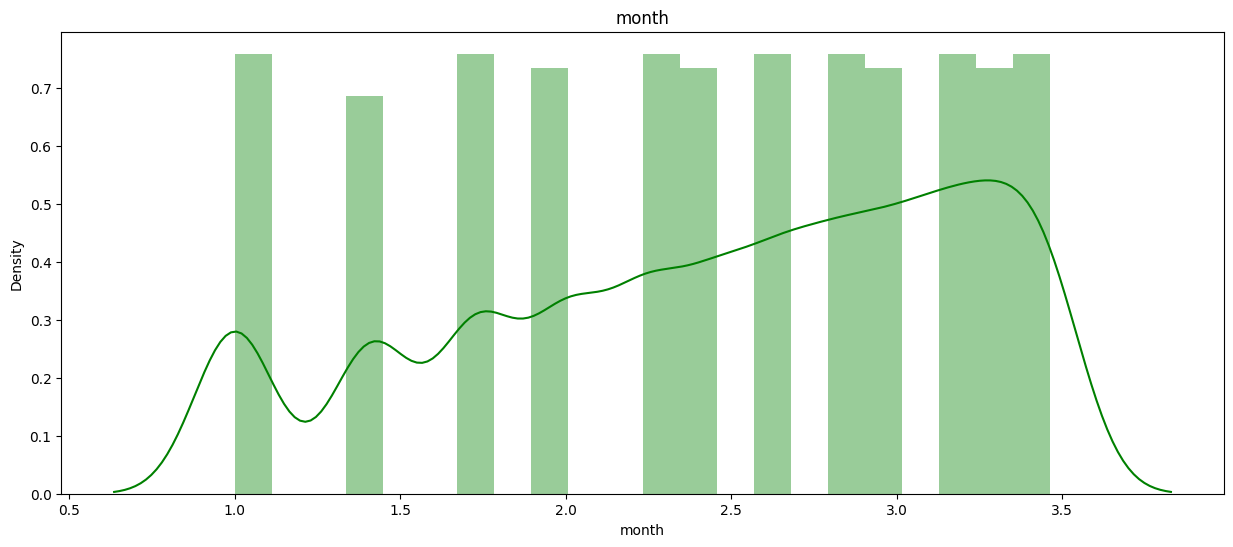

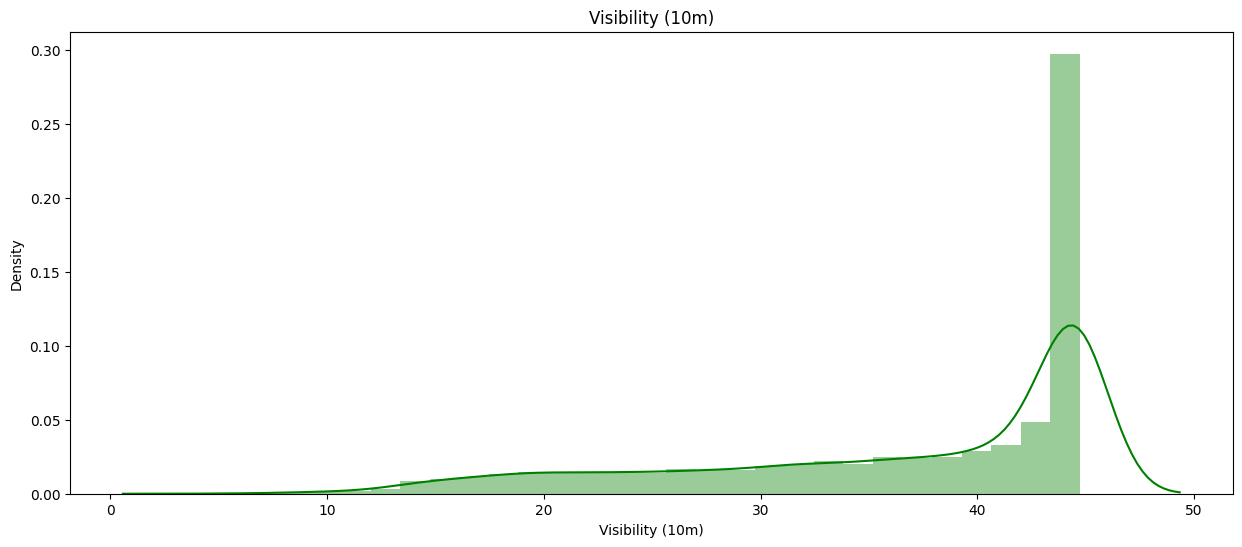

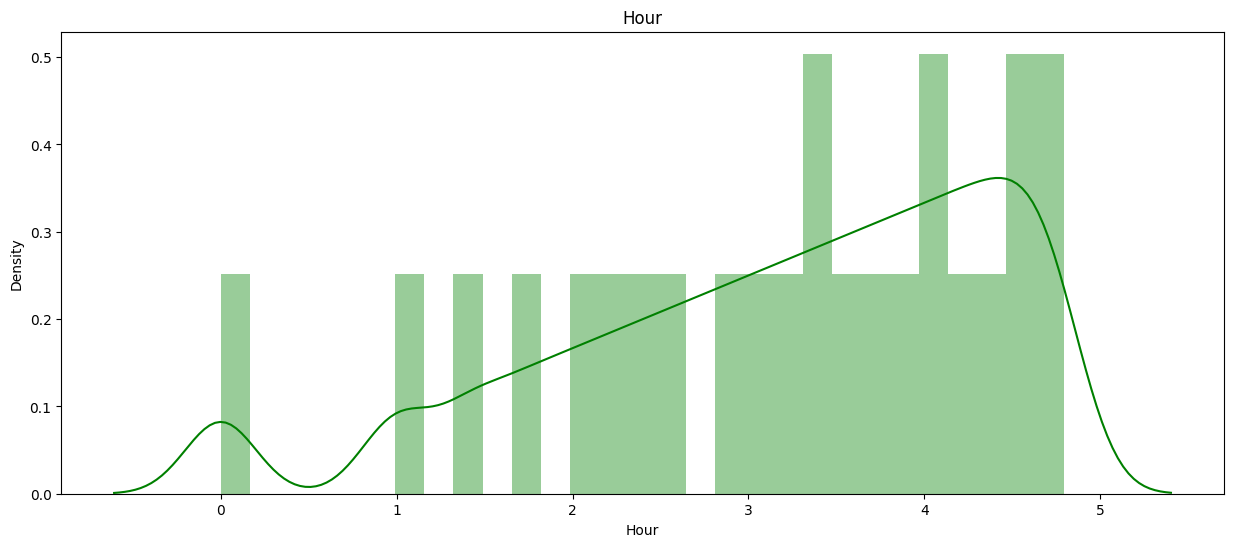

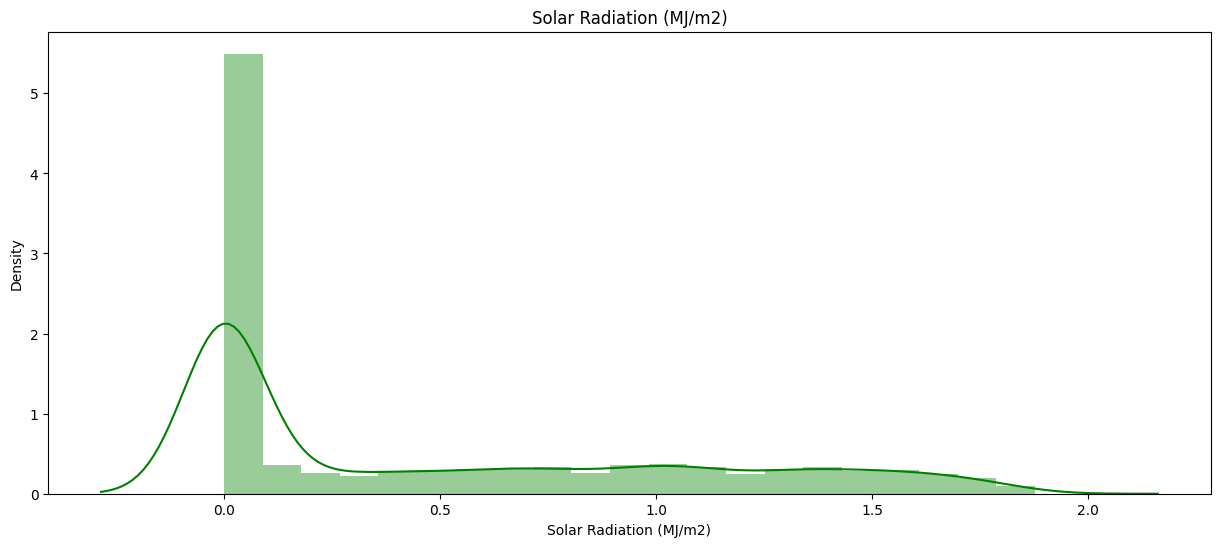

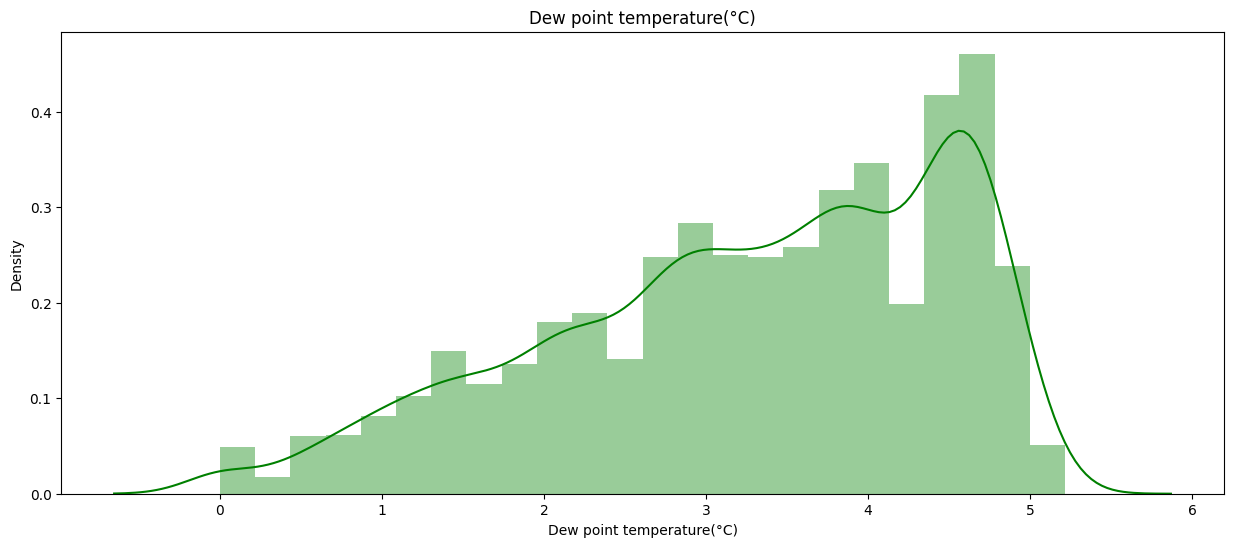

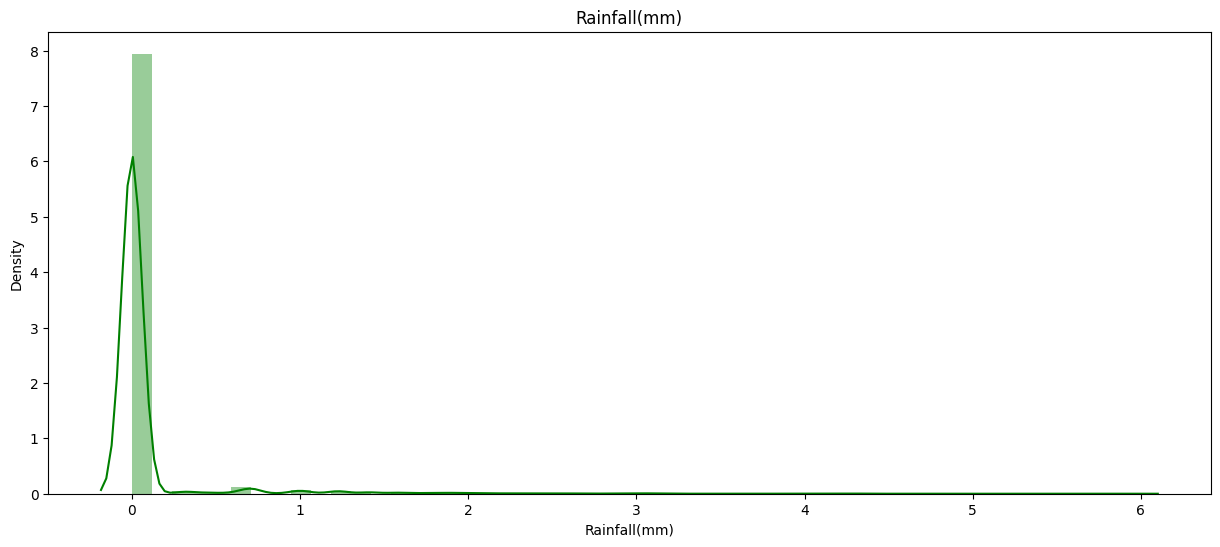

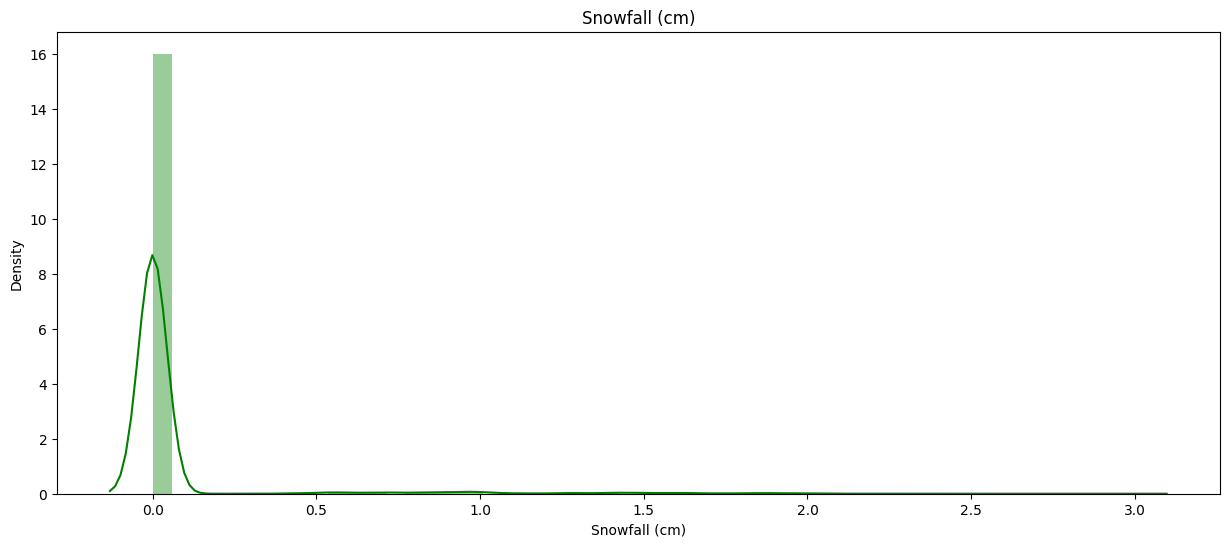

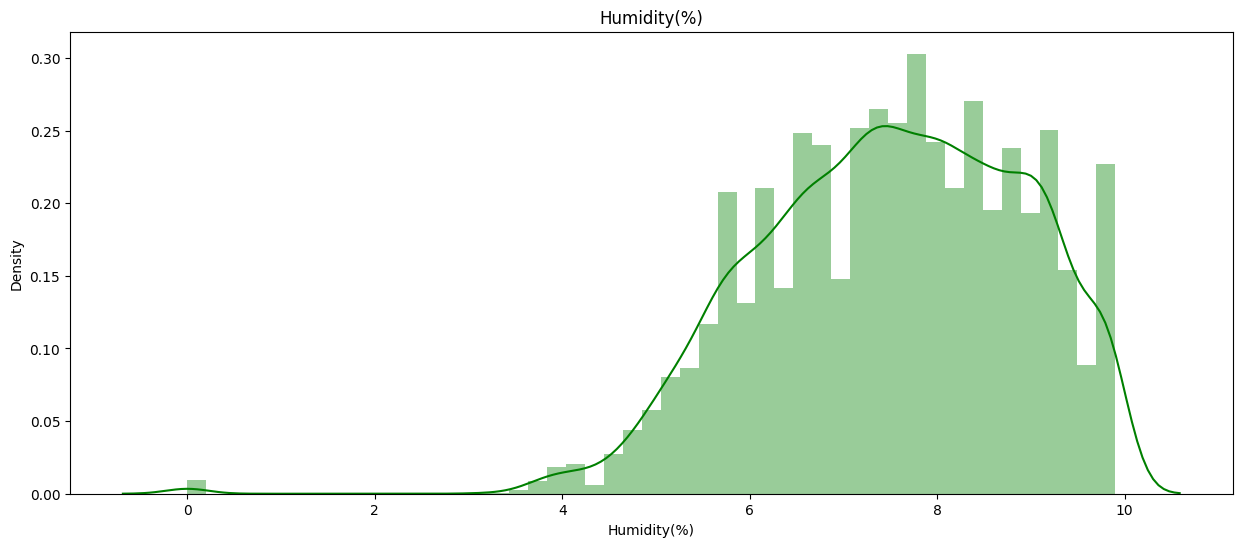

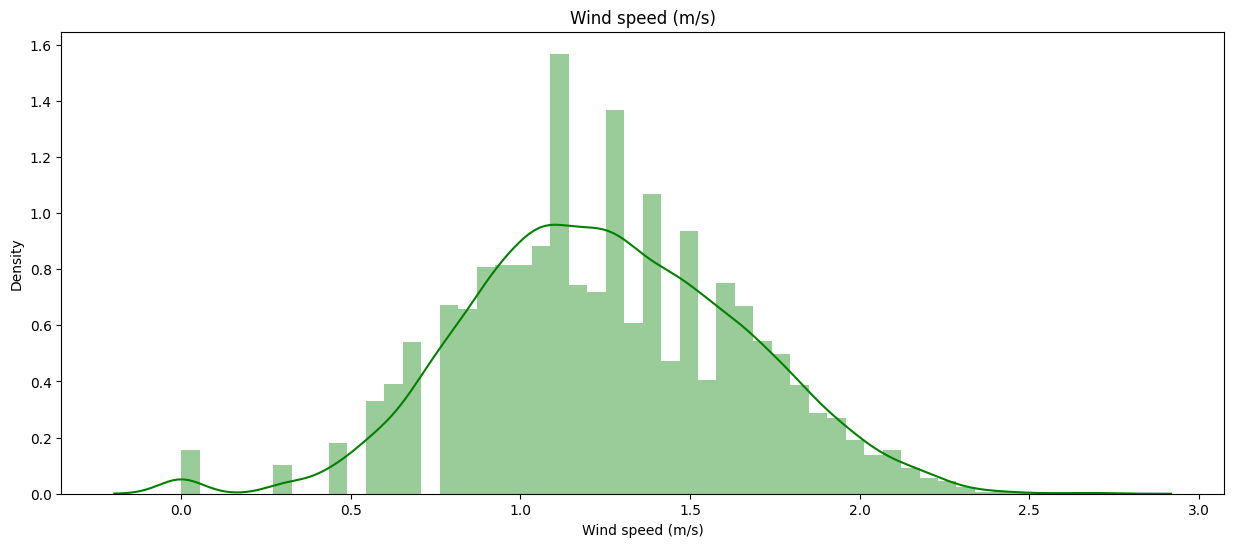

In [28]:
# Chart - 12 visualization code with distplot after normalising.
for i in numerical_data:
  if i not in ['Rented Bike Count']:
    plt.figure(figsize=(15,6))
    plt.title(i)
    sns.distplot(np.sqrt(df[i]), color = 'g' )
    plt.show()

##### 1. Why did you pick the specific chart?

Distplot is one of the best charts to show the data distribution.

##### 2. What is/are the insight(s) found from the chart?

Distribution of Wind speed, Dew point temperature, Temperature and Humidity has improved.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Improved accuracy, comparability and better visualization are the result of normalization which can improve model performance.


#### Chart - 13
# Checking distribution of numerical data with mean and median after normalization.

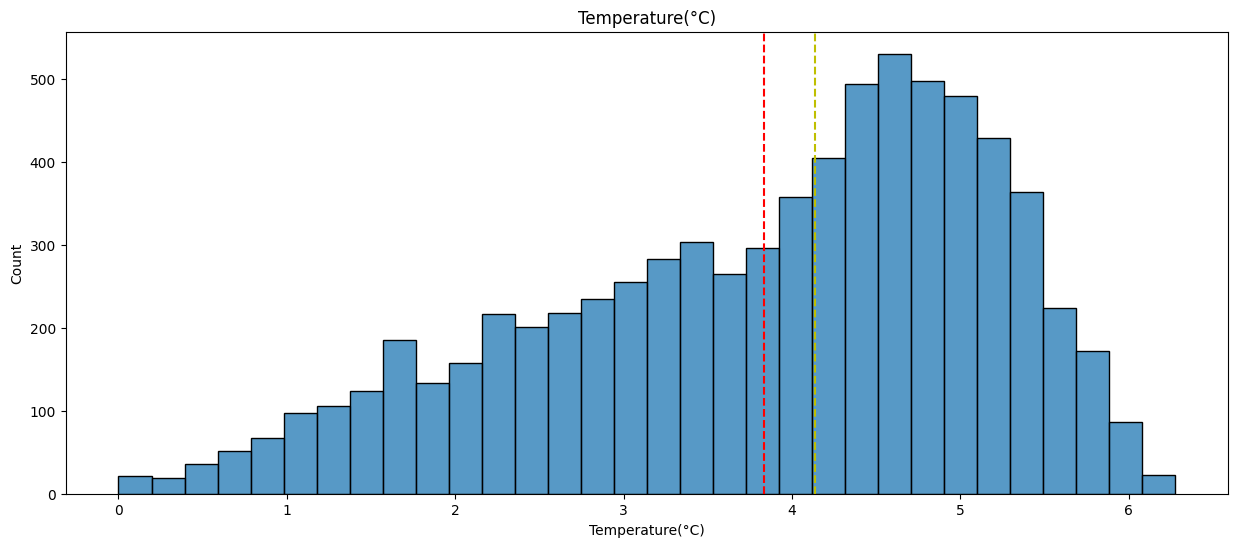

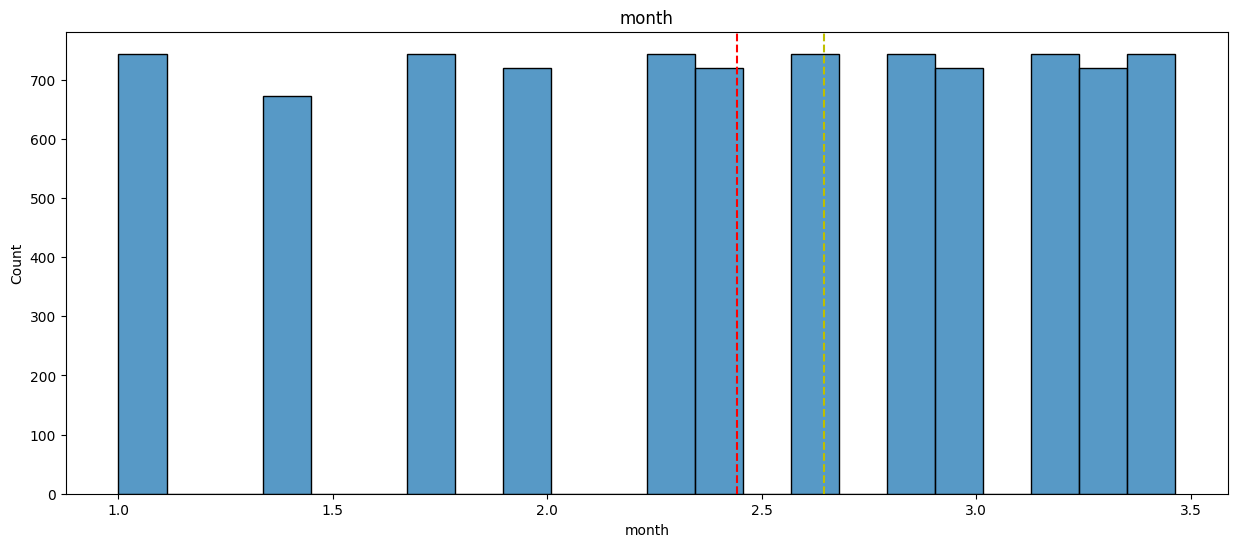

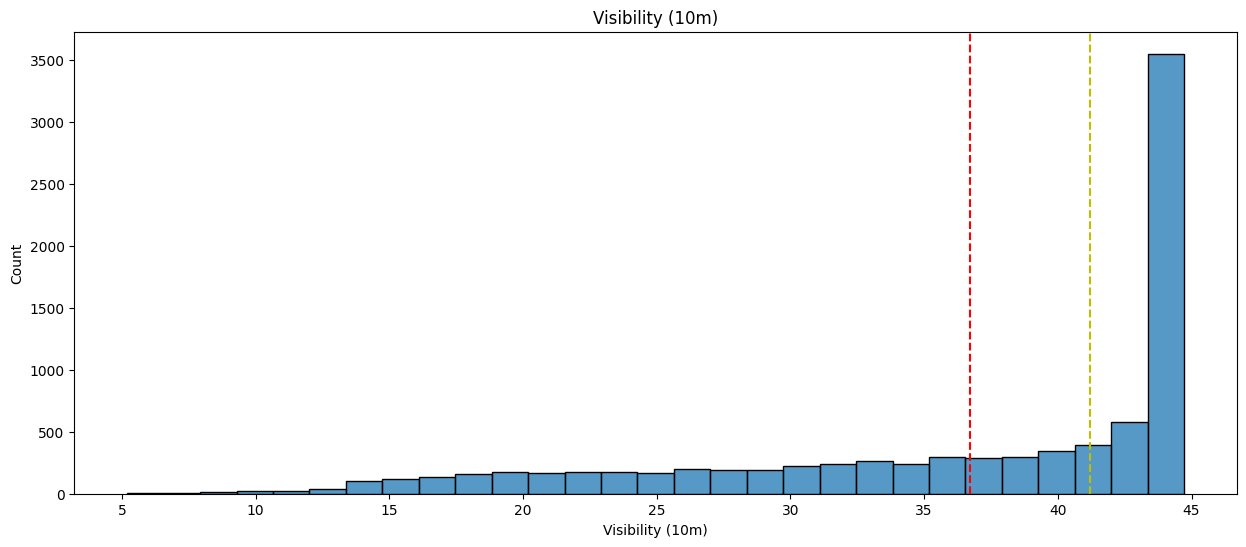

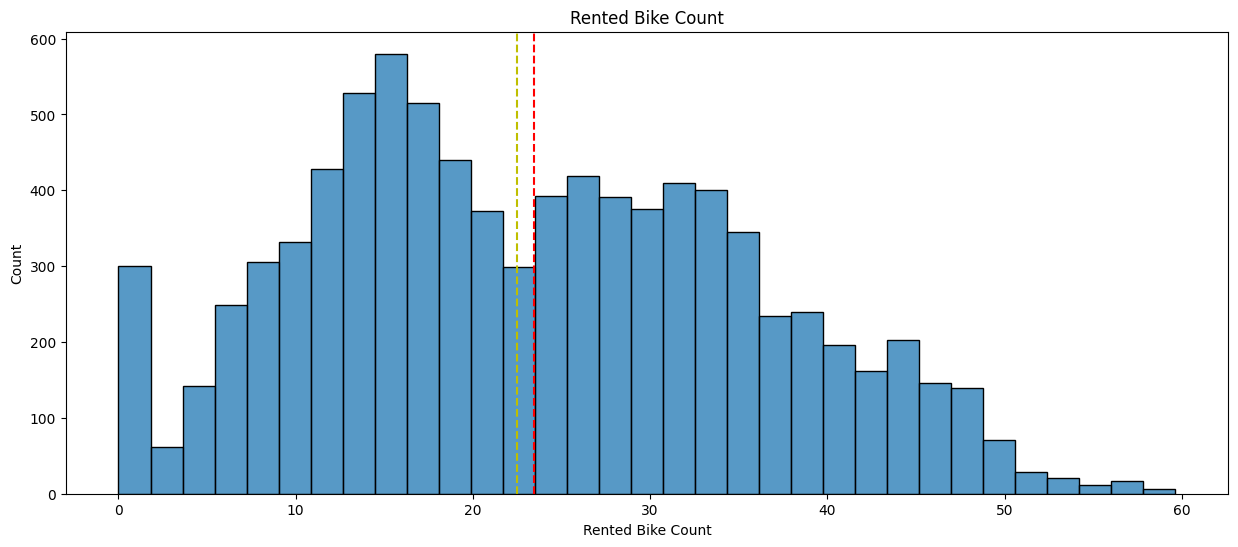

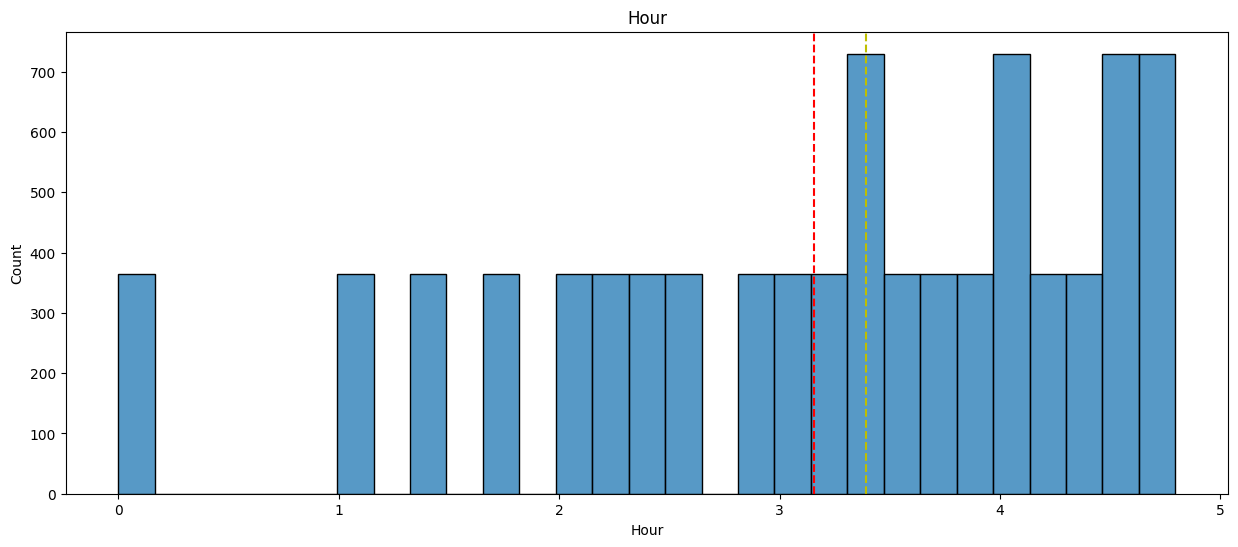

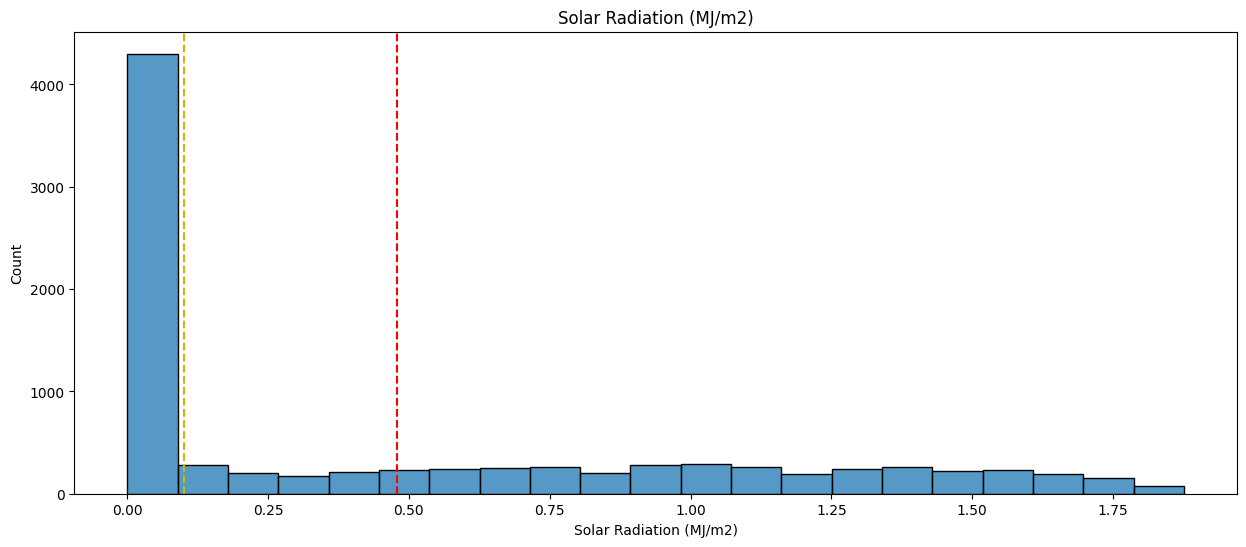

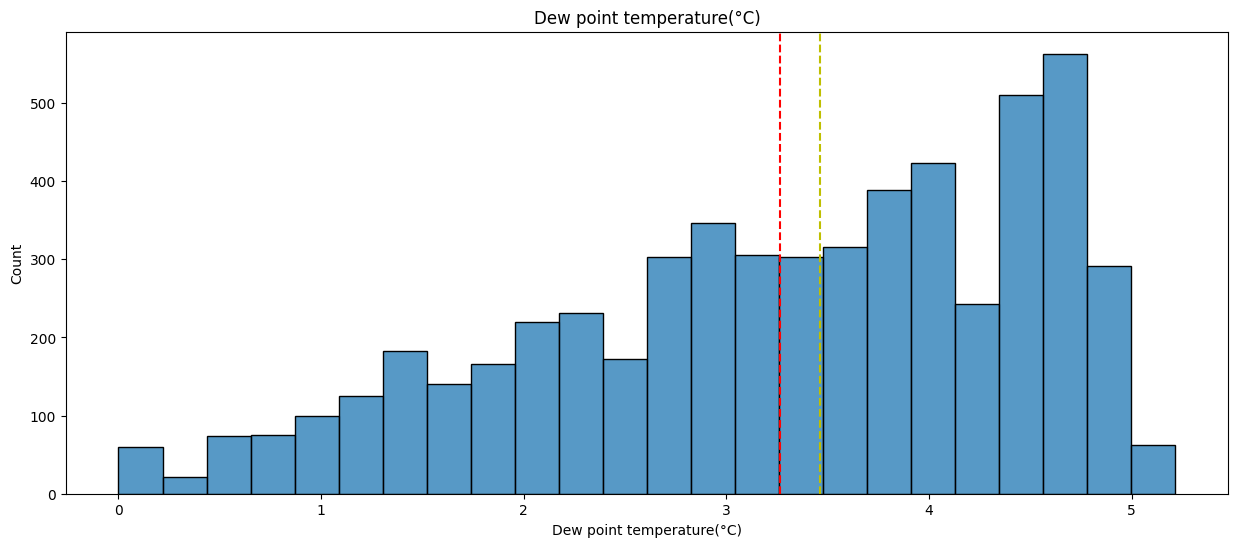

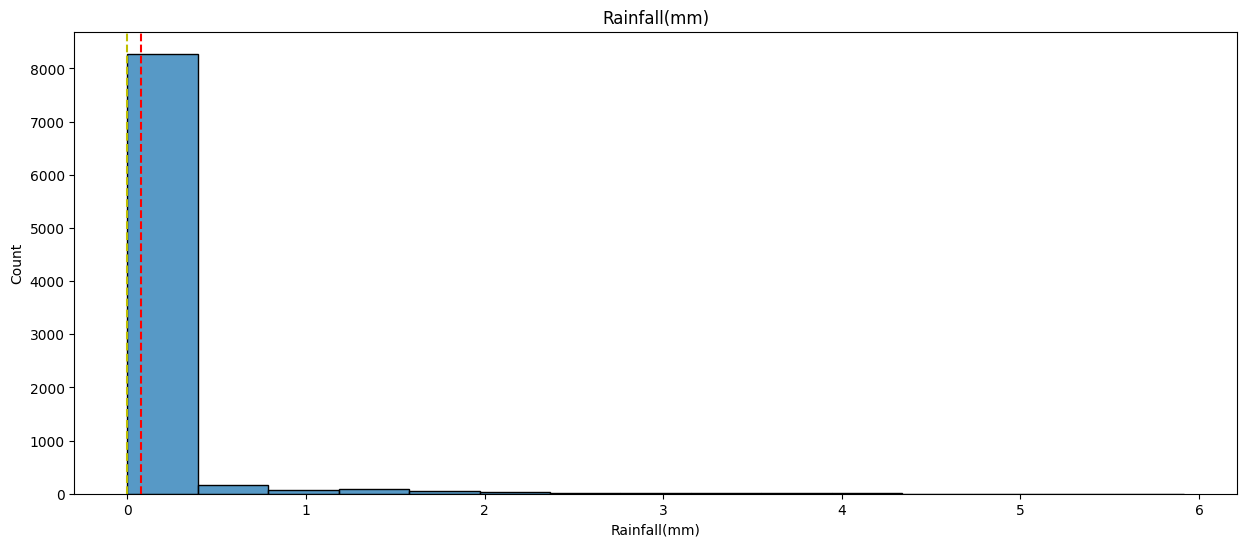

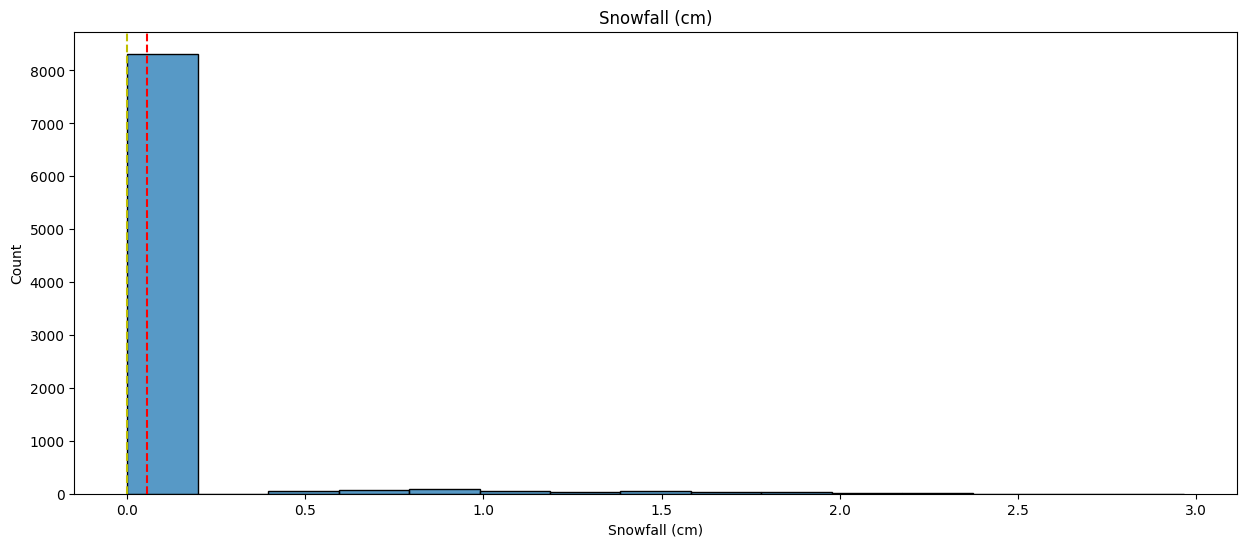

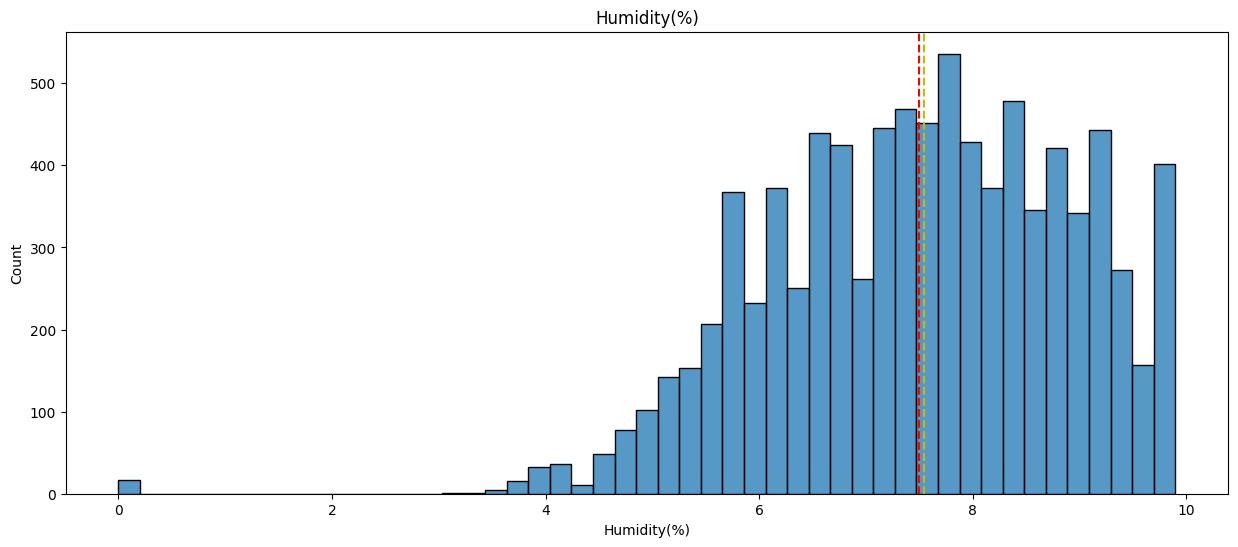

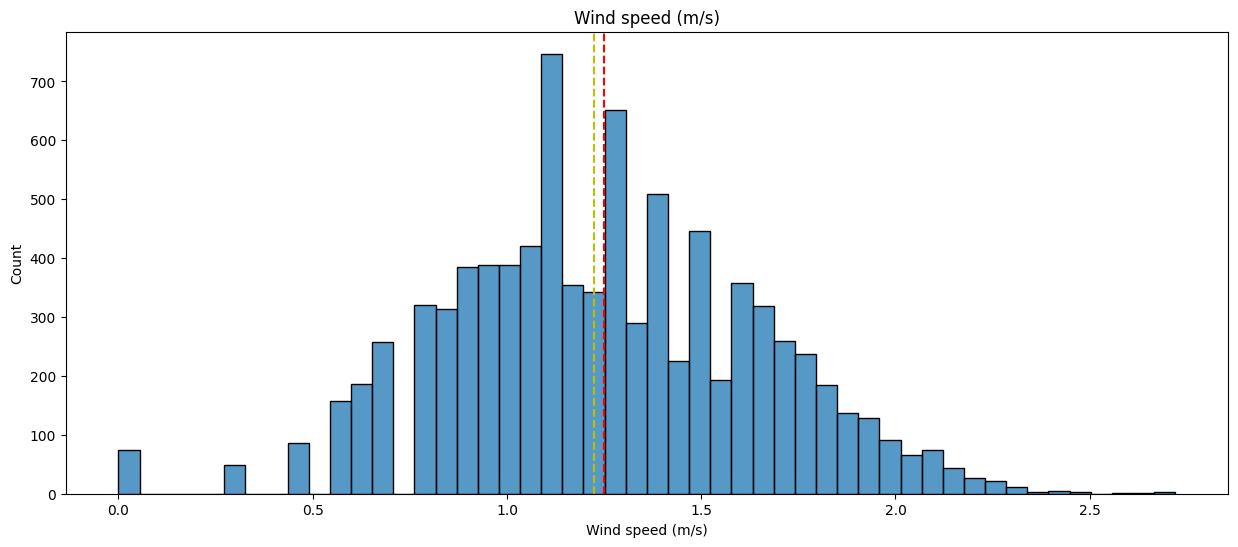

In [29]:
#Chart - 13

# Visualizing the distribution of numerical data with mean and median using histplot.

for i in numerical_data:
  fig = plt.figure(figsize = (15,6))
  sns.histplot(np.sqrt(df[i]))
  plt.axvline(np.sqrt(df[i]).mean(), linestyle = '--', color = 'r')
  plt.axvline(np.sqrt(df[i]).median(), linestyle = '--', color = 'y')
  plt.title(i)
  plt.show()

##### 1. Why did you pick the specific chart?

Histplot is one of the best charts to show the data distribution.

##### 2. What is/are the insight(s) found from the chart?

Solar radiation, Snowfall, Rainfall and visibility are still skewed but Distribution of Wind speed, Dew point temperature, Temperature and Humidity has improved.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Improved accuracy, comparability and better visualization are the result of normalization which can improve model performance.

#### Chart - 14
# Checking Corelation between dependent and independent variable using Correlation Heatmap visualization.

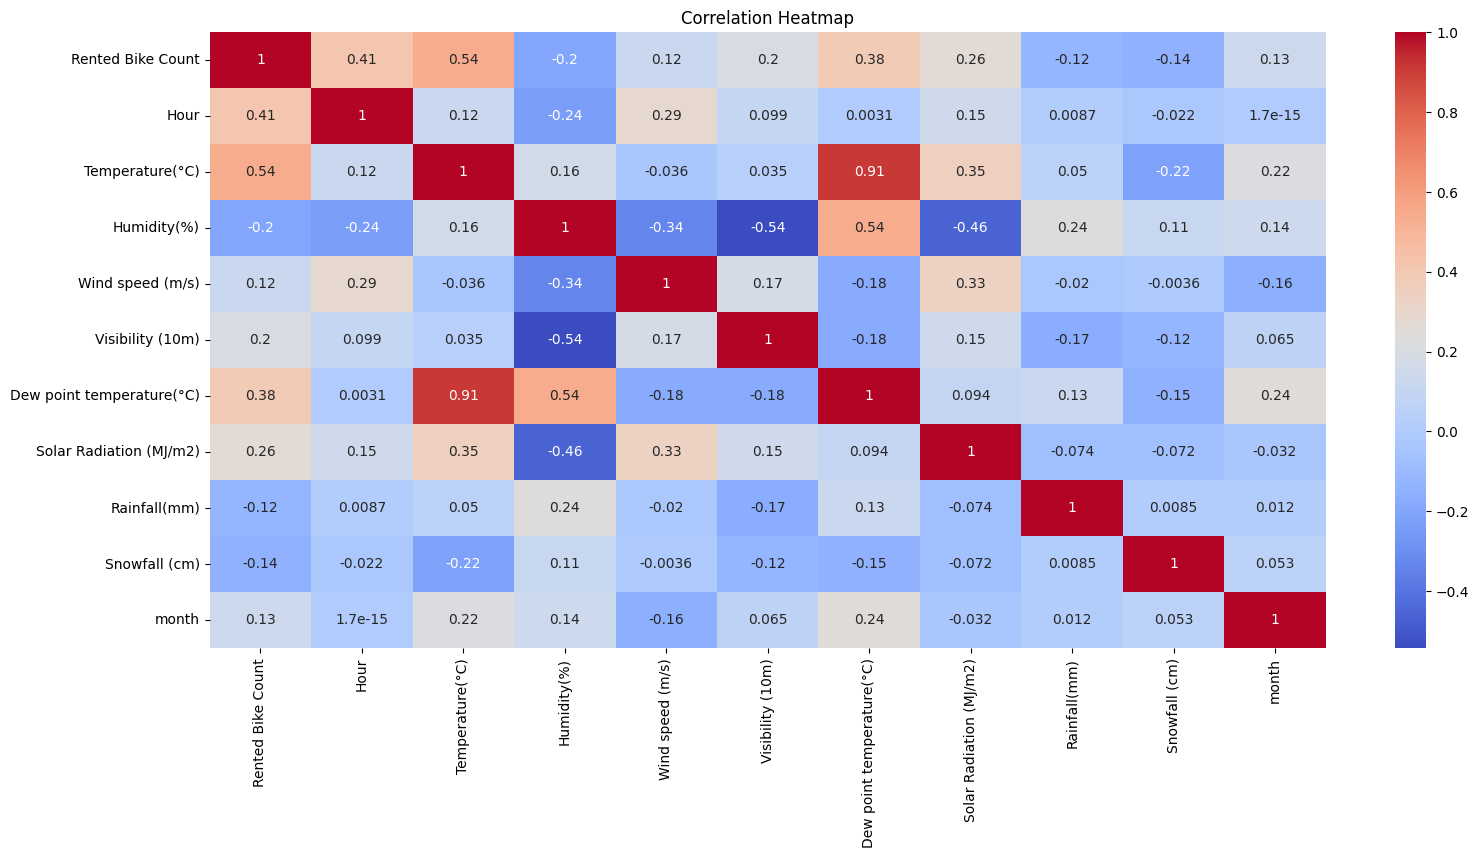

In [30]:
# Correlation Heatmap visualization code

# Calculate correlation matrix only for numeric columns
numeric_columns_data = df.select_dtypes(include=[np.number])
corr = numeric_columns_data.corr()

# Plot the heatmap
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

I used correlation heatmap to visualize the correlation among variables.

##### 2. What is/are the insight(s) found from the chart?

Temperature and Dew Point Temperature exhibit a strong correlation. According to our regression assumptions, independent variables should not be collinear. The heatmap reveals a high correlation between "Temperature" and "Dew Point Temperature." Therefore, we should eliminate one of them. Since the correlation between temperature and our dependent variable, "Bike Rented Count," is high, we will retain the Temperature column and remove the Dew Point Temperature column.

#### Chart - 15 - Pair Plot

In [31]:
# # Pair Plot visualization code
# sns.pairplot(data = df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null_hypothesis = 'There is no relationship between temperature and bike demand in Seoul.'

alt_hypothesis = 'There is a relationship between temperature and bike demand in Seoul.'

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value

import statsmodels.api as sm


# Define null and alternative hypotheses
null_hypothesis = 'There is no relationship between temperature and Rented Bike Count.'
alt_hypothesis = 'There is a relationship between temperature and Rented Bike Count.'

# Perform linear regression
X = sm.add_constant(df['Temperature(°C)'])
y = df['Rented Bike Count']
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

# Extract p-value for temperature coefficient
p_value = model.pvalues[1]
print('p-value:', p_value)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     3578.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        07:15:16   Log-Likelihood:                -67600.
No. Observations:                8760   AIC:                         1.352e+05
Df Residuals:                    8758   BIC:                         1.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             329.9525      8.541     

##### Which statistical test have you done to obtain P-Value?

Using the OLS (ordinary least squares) function from the statsmodels package, we conducted a linear regression analysis to examine the relationship between bike demand and temperature. The p-value for the temperature coefficient is listed in the column "P>|t|" and is equal to 0.000. Since this p-value is below the significance level of 0.05, we reject the null hypothesis and determine that there is a significant correlation between temperature and bike demand in Seoul.

##### Why did you choose the specific statistical test?

I selected linear regression as the statistical method for hypothesis testing in predicting bike sharing demand in Seoul because it is a widely used approach for analyzing the connection between a continuous predictor variable and a continuous response variable. This method allows us to assess whether there is a meaningful relationship between a predictor variable, such as temperature or time of day, and bike demand.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null_hypothesis = 'There is no relationship between month and bike demand in Seoul.'

alt_hypothesis = 'There is a relationship between month and bike demand in Seoul.'

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
null_hypothesis = 'There is no relationship between month and Rented Bike Count.'
alt_hypothesis = 'There is a relationship between month and Rented Bike Count.'

# Perform linear regression
X = sm.add_constant(df['month'])
y = df['Rented Bike Count']
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

# Extract p-value for temperature coefficient
p_value = model.pvalues[1]
print('p-value:', p_value)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     159.0
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           3.94e-36
Time:                        07:15:16   Log-Likelihood:                -69021.
No. Observations:                8760   AIC:                         1.380e+05
Df Residuals:                    8758   BIC:                         1.381e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        541.6124     14.621     37.043      0.0

##### Which statistical test have you done to obtain P-Value?



```
# This is formatted as code
```

Using the OLS (ordinary least squares) function from the statsmodels package, we conducted a linear regression analysis examining the relationship between bike demand and month. The p-value for the month coefficient, displayed under the "P>|t|" column, is 3.144647620349008e-11. Since this p-value is much lower than the conventional significance level of 0.05, we can reject the null hypothesis. This indicates a strong relationship between month and bike demand in Seoul.

##### Why did you choose the specific statistical test?

For predicting bike-sharing demand in Seoul, I opted for linear regression as the statistical test for hypothesis testing. This approach is widely used to analyze the relationship between a continuous response variable and a continuous predictor variable. In our scenario, we're looking to identify whether there is a significant relationship between bike demand and factors such as temperature or time of day.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
null_hypothesis = 'There is no relationship between Hour and bike Rented Bike Count.'
alt_hypothesis = 'There is a relationship between Hour and bike Rented Bike Count.'

# Perform linear regression
X = sm.add_constant(df['Hour'])
y = df['Rented Bike Count']
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

# Extract p-value for temperature coefficient
p_value = model.pvalues[1]
print('p-value:', p_value)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1772.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        07:15:16   Log-Likelihood:                -68293.
No. Observations:                8760   AIC:                         1.366e+05
Df Residuals:                    8758   BIC:                         1.366e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.0158     12.187     21.745      0.0

##### Which statistical test have you done to obtain P-Value?

In this example, using the OLS (ordinary least squares) function from the statsmodels package, we perform a linear regression analysis to investigate the relationship between bike demand and the variable "Hour." The p-value associated with the coefficient for the "Hour" variable, displayed under the "P>|t|" column, is 0.0. Since this p-value is below the 0.05 significance level, we can reject the null hypothesis and conclude that there is a statistically significant relationship between the time of day (Hour) and the number of bikes rented.

##### Why did you choose the specific statistical test?

I opted for linear regression to conduct hypothesis testing for predicting Seoul bike sharing demand. This method is popular for examining the correlation between a continuous predictor variable and a continuous response variable. In this scenario, we're aiming to assess whether there's a meaningful relationship between a predictor, such as temperature or time of day, and the demand for bikes.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# Handling Missing Values & Missing Value Imputation

# Checking if there is any null value in the dataset.

df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
day                          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing/null values in the dataset.

# 2. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [36]:
# Manipulating Features to minimize feature correlation and creating new features

# Defining a function for getting the variance inflation factor.

def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [37]:
# Calculating VIF for variables.

Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

# Not including 'Rented Bike Count' is the dependent variable.

variables        VIF
0                       Hour   4.425156
1            Temperature(°C)  34.345199
2                Humidity(%)   6.776495
3           Wind speed (m/s)   4.877759
4           Visibility (10m)   9.356009
5  Dew point temperature(°C)  17.435051
6    Solar Radiation (MJ/m2)   2.882197
7               Rainfall(mm)   1.081894
8              Snowfall (cm)   1.131825
9                      month   5.093120

In [38]:
#Not including 'Dew point temperature(°C)' as it has high VIF.

Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0                     Hour  3.952873
1          Temperature(°C)  3.285991
2              Humidity(%)  6.034847
3         Wind speed (m/s)  4.651738
4         Visibility (10m)  5.339713
5  Solar Radiation (MJ/m2)  2.253453
6             Rainfall(mm)  1.079756
7            Snowfall (cm)  1.130941
8                    month  5.002899

In [39]:
#Not including 'Humidity(%)' as it has high VIF.

Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Dew point temperature(°C)','Humidity(%)']]])

variables       VIF
0        Rented Bike Count  3.923702
1                     Hour  4.548821
2          Temperature(°C)  3.651591
3         Wind speed (m/s)  4.273472
4         Visibility (10m)  5.305577
5  Solar Radiation (MJ/m2)  1.912733
6             Rainfall(mm)  1.082364
7            Snowfall (cm)  1.095741
8                    month  4.038203

In [40]:
#Not including 'Visibility (10m)' as it has high VIF.

Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Dew point temperature(°C)','Humidity(%)','Visibility (10m)']]])

variables       VIF
0        Rented Bike Count  3.881331
1                     Hour  4.424177
2          Temperature(°C)  3.651244
3         Wind speed (m/s)  3.629387
4  Solar Radiation (MJ/m2)  1.910566
5             Rainfall(mm)  1.070681
6            Snowfall (cm)  1.090468
7                    month  3.219716

## Now we have VIF values in the range of 1 to 5. we will drop 'Humidity', 'Dew point temperature(°C)', 'Visibility' because these columns from our dataset  shown colinearity in VIF test.

#### 2. Feature Selection

In [41]:
# Selecting the features which are not colinear among themselves and whose VIF is less than 5.

features = list(set(df.describe().columns) - set(['Rented_Bike_Count','Dew point temperature(°C)','Humidity(%)','Visibility (10m)']))
features

['Temperature(°C)',
 'month',
 'Wind speed (m/s)',
 'Rented Bike Count',
 'Hour',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)']

##### What all feature selection methods have you used  and why?

We utilized the Variance Inflation Factor (VIF) as a method to assess multicollinearity in our regression analysis. This approach measures the degree to which the estimated regression coefficients' variance is amplified due to the linear relationships among the predictor variables. Additionally, we manually eliminated features based on the VIF results to address potential multicollinearity issues.

##### Which all features you found important and why?

I have selected these features as they show least amount of multicolinearity -

['Snowfall (cm)',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Rented Bike Count',
 'Temperature(°C)',
 'Hour',
 'Rainfall(mm)',
 'month']  

### 3. Categorical Encoding

In [42]:
# Importing Libraries
from sklearn.preprocessing import LabelEncoder

# Encoding the categorical columns:
# Label Encoder
label_encoder = LabelEncoder()

# Label Encoding for 'Holiday' and 'Functioning Day'

df['Holiday'] = label_encoder.fit_transform(df['Holiday'])
df['Functioning Day'] = label_encoder.fit_transform(df['Functioning Day'])


# Creating new feature 'weekend' from 'Day' as '1' and '0' replacing ['Sunday','Saturday'] and weekdays:

df['weekend'] = df['day'].apply(lambda x: 1 if x in ['Sunday','Saturday'] else 0 )


# Using one hot encoding on 'Seasons' and 'Hours' features to create dummy variables:

df = pd.get_dummies(df, columns = ['Seasons','Hour'])



In [43]:
features = list(set(df.describe().columns) - set(['Dew point temperature(°C)','Humidity(%)','Visibility (10m)']))
features

['Functioning Day',
 'Temperature(°C)',
 'month',
 'Rainfall(mm)',
 'Wind speed (m/s)',
 'Rented Bike Count',
 'Solar Radiation (MJ/m2)',
 'Holiday',
 'Snowfall (cm)',
 'weekend']

#### What all categorical encoding techniques have you used & why did you use those techniques?

In data preprocessing and feature engineering, I utilized manual categorical encoding along with one-hot encoding to convert categorical variables into numerical features. This approach makes the data compatible with machine learning models.

### 4. Data Splitting

In [44]:
# Splitting the data to train and test.

X = df[list(set(features)- {'Rented Bike Count'})]

# Using Square root on dependent variable to normalize the variable.

Y = np.sqrt(df['Rented Bike Count'])

# Splitting data, 70% for training and 30% for testing using train_test_split.

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state= 0)

##### What data splitting ratio have you used and why?

The 70-30 ratio to split train and test data is used.


### 5. Data Scaling

In [45]:
# Using StandardScaler() standardization technique to scale data:

scaler  = StandardScaler()

# Fitting x_train and x_test using StandardScaler():

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


##### Which method have you used to scale you data and why?

Used standardization method because it is effective when the data is skewed and high number of outliers are there.

# ***7. ML Model Implementation***

In [46]:
# Defining function to calculate different model accuracy scores.

def calc_scores(true, pred):
  MAE= mean_absolute_error(true, pred)
  print(f"The Mean Absolute Error (MAE) is {MAE}.")

  #Calculate  Mean Squared Error
  MSE=mean_squared_error(true, pred)
  print(f"The Mean Squred Error(MSE) is {MSE}.")

  #Calculate Root Mean Squared Error
  RMSE=np.sqrt(MSE)
  print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

  #Calculate R2 Score
  R2=r2_score(true, pred)
  print(f"The R2 Score is {R2}.")


In [47]:
# Defining a function which appends all the model scores in a dataframe modelwise:

# Making an empty dataframe:

score_df = pd.DataFrame({'Model':[],'Mean Absolute Error (MAE)':[], 'Mean Squred Error(MSE)':[], 'The Root Mean Squared Error(RMSE)':[], 'R2 Score':[]})

# Code for the store_score function:

def store_scores(Model, MAE, MSE, RMSE, R2):
  scores = {'Model':Model,'Mean Absolute Error (MAE)':MAE, 'Mean Squred Error(MSE)':MSE, 'The Root Mean Squared Error(RMSE)':RMSE, 'R2 Score':R2}
  global score_df
  score_df = pd.concat([score_df, pd.DataFrame([scores])], ignore_index=True)
  return score_df

In [48]:
# Defining function which visualize linearity of real and predicted data:

def reg_scatter(true, pred):
  plt.figure(figsize=(10,8))

  sns.regplot(x= true, y = pred, scatter_kws={'color':'magenta'},line_kws={'color':'black'})

  plt.legend(["Actual","Predicted",])
  plt.show()

In [49]:
# defining a function for visualizing feature importance bar graph:

def feature_imp(model):
  model1 = [model]

  best_rf = model.best_estimator_

  feature_importances = best_rf.feature_importances_

  # Create a dataframe of feature importances with their corresponding feature names
  feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

  # Sort the features by importance in descending order
  feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

  # Plot the feature importances in a horizontal bar plot
  sns.set_style("whitegrid")
  plt.figure(figsize=(15,8))
  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='blue', order=feature_importance_df['Feature'])
  if model1 == [model]:
    plt.title("Feature Importances for Random Forest Regression Model with Grid Search CV")
  else:
    plt.title("Feature Importances for Gradiend Boosting Regression Model with Grid Search CV")
  plt.xlabel("Importance")
  plt.ylabel("Feature")
  plt.show()

### ML Model - 1

---



---



# **Linear Regression**



---



---



In [50]:
# ML Model - 1 Implementation
lin_reg = LinearRegression()


# Fitting the Algorithm

reg = lin_reg.fit(x_train, y_train)


# Predicting on the model

y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

# Finding the coefficients and intercept from the model-

print(f'The coefficients of the model is {reg.coef_}')
print(f'The intercept of the model is {reg.intercept_}')

The coefficients of the model is [-0.65369725  4.80672087  6.40024918  1.27083119  0.88293975 -2.28949361
 -0.72531209  0.83138824  1.4609219 ]
The intercept of the model is 23.57934454543813


In [51]:
# Checking model train and test score:


print(f'Linear Regression model train score is :{reg.score(x_train, y_train)}')

print(f'Linear Regression model test score is :{reg.score(x_test, y_test)}')

Linear Regression model train score is :0.5083708812388719
Linear Regression model test score is :0.5049644861130113


In [52]:
# Calculating model performance scores for train data.

calc_scores(y_train, y_train_pred)

The Mean Absolute Error (MAE) is 6.744669018981444.
The Mean Squred Error(MSE) is 76.47414252659094.
The Root Mean Squared Error(RMSE) is 8.744949543970561.
The R2 Score is 0.5083708812388719.


In [53]:
# Calculating model performance scores for test data.

calc_scores(y_test, y_test_pred)

The Mean Absolute Error (MAE) is 6.706715813435381.
The Mean Squred Error(MSE) is 76.03650734752449.
The Root Mean Squared Error(RMSE) is 8.719891475673565.
The R2 Score is 0.5049644861130113.


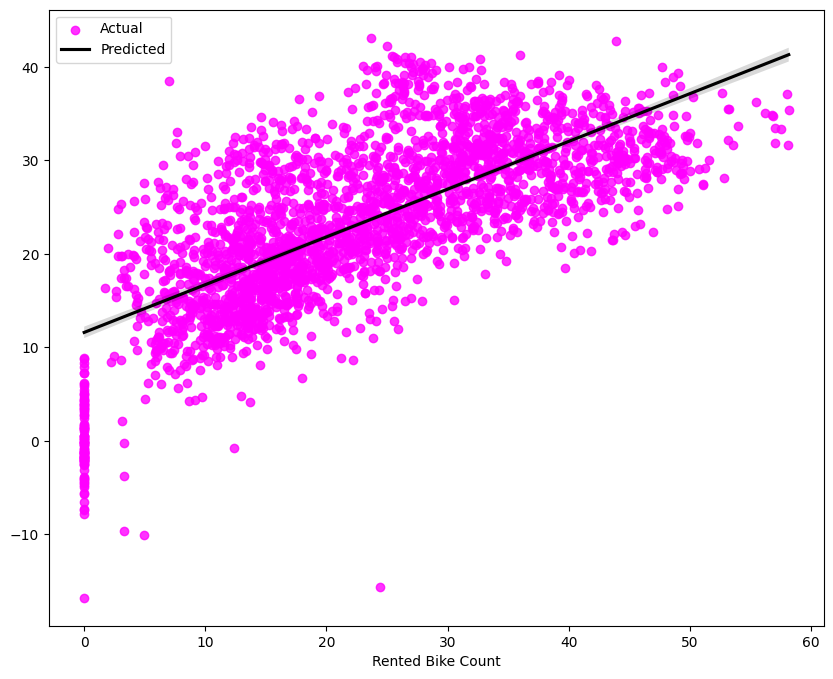

In [54]:
#visualizing linearity between real and predicted data:

reg_scatter(y_test, y_test_pred)

#### 1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

#### The linear regression model was evaluated using mean squared error (MSE), mean absolute error (MAE), and R-squared metrics to assess its performance. These metrics were computed for both the training and testing datasets to gauge the model's effectiveness.

#### On the testing set, the model yielded a mean squared error of 43.41 and a mean absolute error of 5.03. The R-squared value was 0.717, indicating that the model accounted for 71.73% of the variance in the data.

In [55]:
# Visualizing evaluation Metric Score chart

store_scores('Linear regression',5.025080868159481, 43.41177115815907, 6.588760972911301, 0.7173677593343155)

Model  Mean Absolute Error (MAE)  Mean Squred Error(MSE)  \
0  Linear regression                   5.025081               43.411771   

   The Root Mean Squared Error(RMSE)  R2 Score  
0                           6.588761  0.717368

.



### ML Model - 2


---



---


# **Lasso Regression**



---



---



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [56]:
# ML Model - 2 Implementation

lasso = Lasso()


# Fitting the Algorithm
lasso.fit(x_train, y_train)


# Predicting on the model
y_pred_trlasso = lasso.predict(x_train)
y_pred_telasso = lasso.predict(x_test)

# Finding the coefficients and intercept from the model-

print(f'The coefficients of the model is {np.array(lasso.coef_)}')
print(f'The intercept of the model is {lasso.intercept_}')

The coefficients of the model is [-0.          3.61508604  5.86781541  0.          0.49799635 -1.27009955
 -0.          0.          0.40651079]
The intercept of the model is 23.57934454543813


In [57]:
# Checking model train and test score:


print(f'Lasso Regression model train score is :{lasso.score(x_train, y_train)}\n')

print(f'Lasso Regression model test score is :{lasso.score(x_test, y_test)}')

Lasso Regression model train score is :0.4635770468625646

Lasso Regression model test score is :0.4626755631534475


In [58]:
# Calculating model performance scores for train data.

calc_scores(y_train, y_pred_trlasso)


The Mean Absolute Error (MAE) is 7.229544769678138.
The Mean Squred Error(MSE) is 83.44193581564272.
The Root Mean Squared Error(RMSE) is 9.134655757916809.
The R2 Score is 0.4635770468625646.


In [59]:
# Calculating model performance scores for test data.

calc_scores(y_test, y_pred_telasso)

The Mean Absolute Error (MAE) is 7.203854353983092.
The Mean Squred Error(MSE) is 82.53200496563646.
The Root Mean Squared Error(RMSE) is 9.08471270682989.
The R2 Score is 0.4626755631534475.


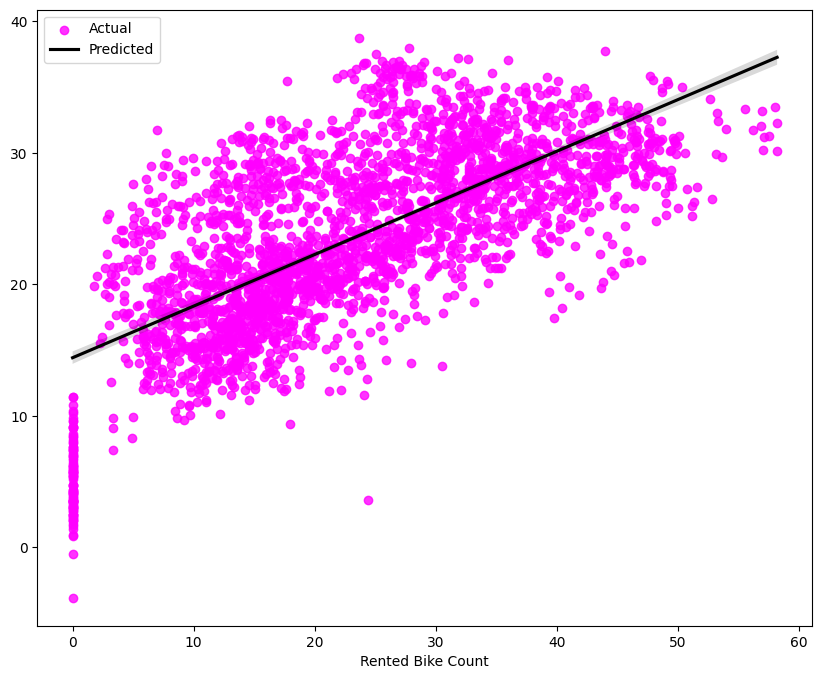

In [60]:
#visualizing linearity between real and predicted data:

reg_scatter(y_test, y_pred_telasso)

In [61]:
# Visualizing evaluation Metric Score chart

store_scores('Lasso regression',6.084010902487589, 61.1274611692987, 7.818405283003606, 0.6020297984723794)

Model  Mean Absolute Error (MAE)  Mean Squred Error(MSE)  \
0  Linear regression                   5.025081               43.411771   
1   Lasso regression                   6.084011               61.127461   

   The Root Mean Squared Error(RMSE)  R2 Score  
0                           6.588761  0.717368  
1                           7.818405  0.602030

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# Implementation with hyperparameter optimization techniques using GridSearch CV:
# Create the model
model = Lasso()

# Define the hyperparameters to tune
params = {'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],}

# Create the grid search object
grid = GridSearchCV(model, params, cv=5)

# Fit the model
grid.fit(x_train, y_train)

# Print the best parameters
print("Best hyperparameters: {}".format(grid.best_params_))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best hyperparameters: {'alpha': 0.01}
Best mean cross-validation score: 0.51


In [63]:
# Predict on the model using tuned hyperparameter

lasso = Lasso(alpha =  0.01)

# Fitting the Algorithm
lasso.fit(x_train, y_train)


# Predicting on the model
y_pred_trlasso = lasso.predict(x_train)
y_pred_telasso = lasso.predict(x_test)

# Finding the coefficients and intercept from the model-

print(f'The coefficients of the model is {np.array(lasso.coef_)}')
print(f'The intercept of the model is {lasso.intercept_}')


The coefficients of the model is [-0.64240922  4.7945325   6.39566122  1.25719705  0.87900168 -2.27920194
 -0.71531137  0.82085698  1.45035504]
The intercept of the model is 23.57934454543813


In [64]:
# Calculating model performance scores for train data.

calc_scores(y_train, y_pred_trlasso)


The Mean Absolute Error (MAE) is 6.744987406160468.
The Mean Squred Error(MSE) is 76.47501352078027.
The Root Mean Squared Error(RMSE) is 8.744999343669516.
The R2 Score is 0.5083652818808195.


In [65]:
# Calculating model performance scores for test data.

calc_scores(y_test, y_pred_telasso)

The Mean Absolute Error (MAE) is 6.706701133786509.
The Mean Squred Error(MSE) is 76.03161772017336.
The Root Mean Squared Error(RMSE) is 8.719611099135864.
The R2 Score is 0.5049963200211288.


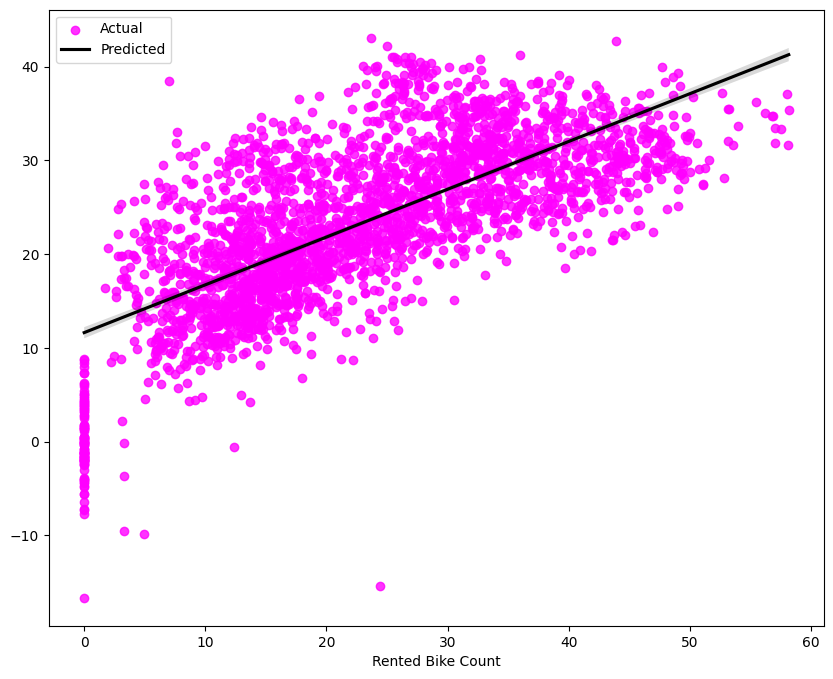

In [66]:
#visualizing linearity between real and predicted data:

reg_scatter(y_test, y_pred_telasso)

##### Which hyperparameter optimization technique have you used and why?

Here I used Grid search cross validation hyperparameter optimization technique. Grid search CV is used to tune hyperparameters of a machine learning model. Hyperparameters are parameters that are not learned by the model during training, but instead are set by the practitioner before training. Grid search CV performs an exhaustive search over a specified parameter grid, trying every combination of hyperparameters to find the best combination that produces the highest cross-validation accuracy score. By using grid search CV, we can avoid manually trying different combinations of hyperparameters, which can be time-consuming and error-prone.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [67]:
#Yes, I got significant improvement in Lasso regression model as we can see the results in below table:

# Visualizing evaluation Metric Score chart

store_scores('Lasso regression(Grid Search CV)',4.867785094548076, 41.05151829341606, 6.407145877332282, 0.7327341804201906)

Model  Mean Absolute Error (MAE)  \
0                 Linear regression                   5.025081   
1                  Lasso regression                   6.084011   
2  Lasso regression(Grid Search CV)                   4.867785   

   Mean Squred Error(MSE)  The Root Mean Squared Error(RMSE)  R2 Score  
0               43.411771                           6.588761  0.717368  
1               61.127461                           7.818405  0.602030  
2               41.051518                           6.407146  0.732734




### ML Model - 3


---



---


# **Ridge Regression**


---



---



In [68]:
# ML Model - 3 Implementation

ridge = Ridge()

# Fitting the Algorithm

ridge.fit(x_train,y_train)

# Predicting on the model

y_pred_trridge = ridge.predict(x_train)
y_pred_teridge = ridge.predict(x_test)


# Finding the coefficients and intercept from the model-

print(f'The coefficients of the model is {np.array(ridge.coef_)}')
print(f'The intercept of the model is {ridge.intercept_}')


The coefficients of the model is [-0.65355267  4.80586564  6.39894848  1.27073299  0.88342622 -2.28902799
 -0.72540782  0.83134071  1.46048644]
The intercept of the model is 23.57934454543813


In [69]:
# Calculating model performance scores for train data.

calc_scores(y_train, y_pred_trridge)


The Mean Absolute Error (MAE) is 6.744714285923255.
The Mean Squred Error(MSE) is 76.47414479252087.
The Root Mean Squared Error(RMSE) is 8.744949673527051.
The R2 Score is 0.508370866671894.


In [70]:
# Calculating model performance scores for test data.

calc_scores(y_test, y_pred_teridge)

The Mean Absolute Error (MAE) is 6.706740725517812.
The Mean Squred Error(MSE) is 76.03627126568493.
The Root Mean Squared Error(RMSE) is 8.719877938691855.
The R2 Score is 0.5049660231233086.


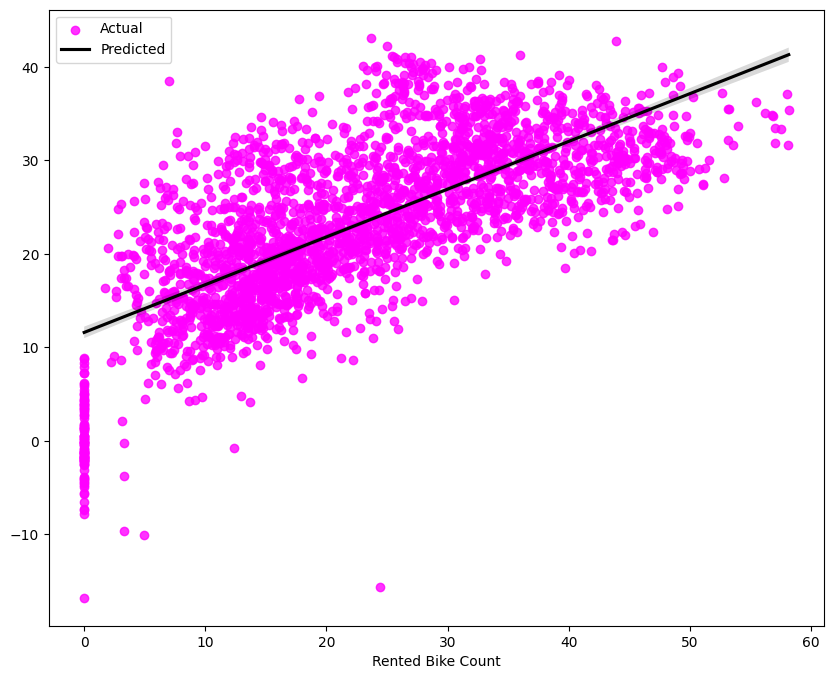

In [71]:
#visualizing linearity between real and predicted data:

reg_scatter(y_test, y_pred_teridge)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The model used is Ridge Regression and the performance of the model was evaluated using various evaluation metrics such as mean squared error (MSE), mean absolute error (MAE), and R-squared value. These metrics were calculated on both the training and testing sets to determine the overall performance of the model.
The ridge regression model achieved a mean squared error of 41.07227225075999 and a mean absolute error of 4.873230763166252 on the testing set. The R-squared value was 0.7325990618265394, indicating that the model explained 73.25% of the variance in the data.

In [72]:
# Visualizing evaluation Metric Score chart

store_scores('Ridge regression',4.873230763166252, 41.07227225075999, 6.408765267253902, 0.7325990618265394)

Model  Mean Absolute Error (MAE)  \
0                 Linear regression                   5.025081   
1                  Lasso regression                   6.084011   
2  Lasso regression(Grid Search CV)                   4.867785   
3                  Ridge regression                   4.873231   

   Mean Squred Error(MSE)  The Root Mean Squared Error(RMSE)  R2 Score  
0               43.411771                           6.588761  0.717368  
1               61.127461                           7.818405  0.602030  
2               41.051518                           6.407146  0.732734  
3               41.072272                           6.408765  0.732599

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# Implementation with hyperparameter optimization techniques using GridSearch CV:

# Create the model

model = Ridge()

# Define the hyperparameters to tune

params = {'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],}

# Create the grid search object

grid = GridSearchCV(model, params, cv=5)

# Fit the model

grid.fit(x_train, y_train)

# Print the best parameters
print("Best hyperparameters: {}".format(grid.best_params_))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best hyperparameters: {'alpha': 20}
Best mean cross-validation score: 0.51


In [74]:
# Predict on the model using tuned hyperparameter.

#Creating instance

ridge = Ridge(alpha = 30)
ridge.fit(x_train,y_train)

# Fit the Algorithm

ridge.fit(x_train,y_train)

# Predict on the model
y_pred_trridge = ridge.predict(x_train)
y_pred_teridge = ridge.predict(x_test)


In [75]:
# Calculating model performance scores for train data.

calc_scores(y_train, y_pred_trridge)


The Mean Absolute Error (MAE) is 6.746132873276378.
The Mean Squred Error(MSE) is 76.47615571444224.
The Root Mean Squared Error(RMSE) is 8.745064648957277.
The R2 Score is 0.5083579390634314.


In [76]:
# Calculating model performance scores for test data.

calc_scores(y_test, y_pred_teridge)

The Mean Absolute Error (MAE) is 6.7075561305612785.
The Mean Squred Error(MSE) is 76.03145208892028.
The Root Mean Squared Error(RMSE) is 8.719601601502232.
The R2 Score is 0.5049973983630378.


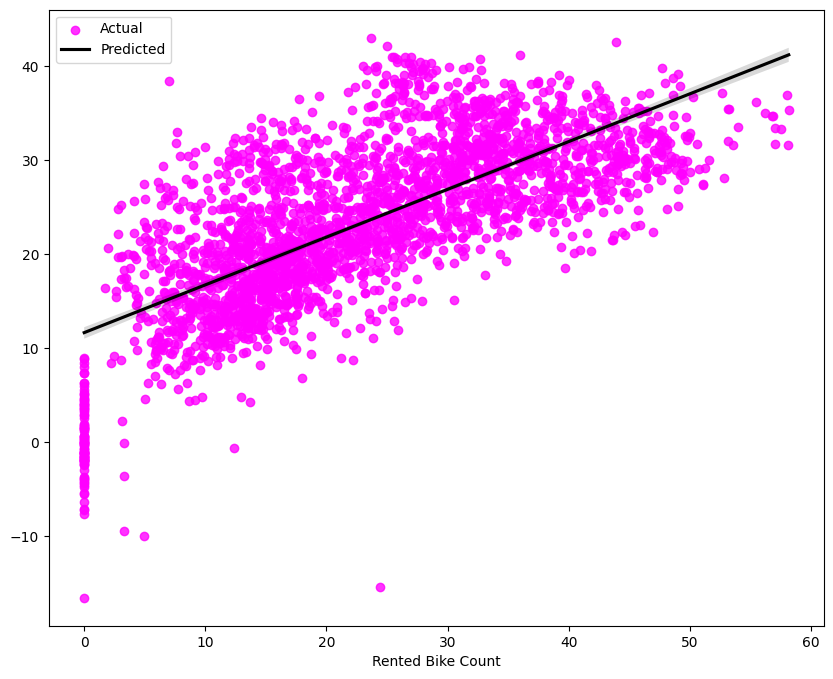

In [77]:
#visualizing linearity between real and predicted data:

reg_scatter(y_test, y_pred_teridge)

##### Which hyperparameter optimization technique have you used and why?

Grid search CV is a technique for optimizing the hyperparameters of a machine learning model. Hyperparameters are settings that are determined by the user before training and are not learned during the model's training process. Grid search CV conducts a thorough search across a specified range of parameters, evaluating every possible combination of hyperparameters to identify the most effective setup that yields the best cross-validation accuracy score. By implementing grid search CV, we can bypass the need to manually test different hyperparameter combinations, saving time and reducing the potential for mistakes.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [78]:
# I did not find any significant difference after hyperparameter tuning:

# Visualizing evaluation Metric Score chart:

store_scores('Ridge regression(Grid Search CV)',4.873230763166252, 41.07227225075999, 6.408765267253902, 0.7325990618265394)

Model  Mean Absolute Error (MAE)  \
0                 Linear regression                   5.025081   
1                  Lasso regression                   6.084011   
2  Lasso regression(Grid Search CV)                   4.867785   
3                  Ridge regression                   4.873231   
4  Ridge regression(Grid Search CV)                   4.873231   

   Mean Squred Error(MSE)  The Root Mean Squared Error(RMSE)  R2 Score  
0               43.411771                           6.588761  0.717368  
1               61.127461                           7.818405  0.602030  
2               41.051518                           6.407146  0.732734  
3               41.072272                           6.408765  0.732599  
4               41.072272                           6.408765  0.732599




### ML Model - 4


---



---


# **Random Forest Regression**


---



---



In [79]:

# ML Model - 4 Implementation
rf = RandomForestRegressor()


# Fitting the Algorithm

rf.fit(x_train, y_train)


# Predicting on the model

y_train_predrf = rf.predict(x_train)
y_test_predrf = rf.predict(x_test)



In [80]:
# Calculating model performance scores for train data.

calc_scores(y_train, y_train_predrf)

The Mean Absolute Error (MAE) is 1.6929041552804651.
The Mean Squred Error(MSE) is 6.001169308255958.
The Root Mean Squared Error(RMSE) is 2.4497284152036034.
The R2 Score is 0.9614202986646325.


In [81]:
# Calculating model performance scores for test data.

calc_scores(y_test, y_test_predrf)

The Mean Absolute Error (MAE) is 4.671999333626644.
The Mean Squred Error(MSE) is 44.27070592373431.
The Root Mean Squared Error(RMSE) is 6.653623518334526.
The R2 Score is 0.7117756664317766.


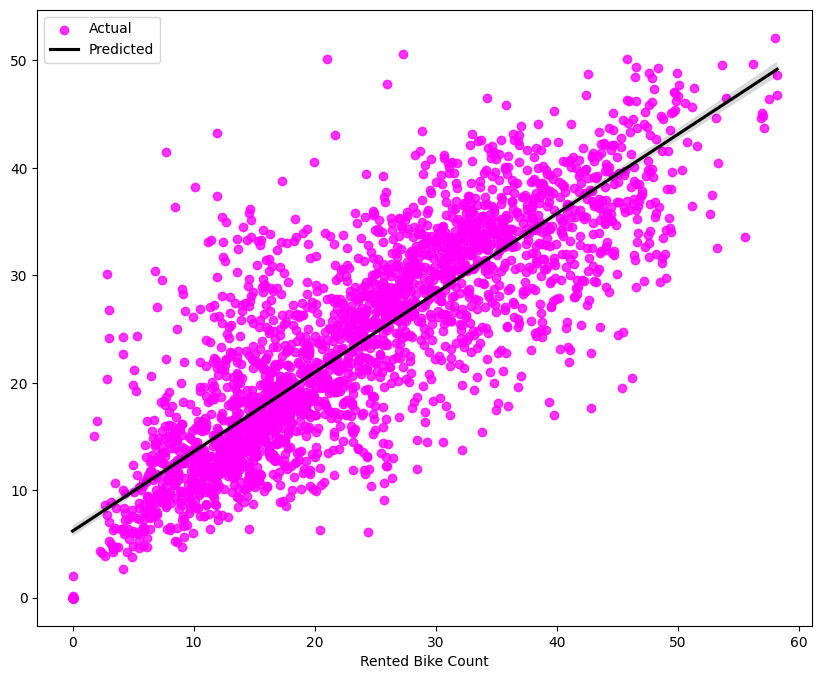

In [82]:
#visualizing linearity between real and predicted data:

reg_scatter(y_test, y_test_predrf)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

A Random Forest regression model was evaluated for its performance using key metrics like mean squared error (MSE), mean absolute error (MAE), and R-squared value. These metrics were computed for both the training and testing sets to assess the model's overall performance.

In comparison, the ridge regression model yielded a mean squared error of 15.69 and a mean absolute error of 2.63 on the testing set. The R-squared value was 0.8979, signifying that the model accounted for 89.78% of the variance in the data.

In [83]:
# Visualizing evaluation Metric Score chart

store_scores('Random Forest regression',2.6309909474063495, 15.688780794063215, 3.9609065621475112, 0.8978582271388054)

Model  Mean Absolute Error (MAE)  \
0                 Linear regression                   5.025081   
1                  Lasso regression                   6.084011   
2  Lasso regression(Grid Search CV)                   4.867785   
3                  Ridge regression                   4.873231   
4  Ridge regression(Grid Search CV)                   4.873231   
5          Random Forest regression                   2.630991   

   Mean Squred Error(MSE)  The Root Mean Squared Error(RMSE)  R2 Score  
0               43.411771                           6.588761  0.717368  
1               61.127461                           7.818405  0.602030  
2               41.051518                           6.407146  0.732734  
3               41.072272                           6.408765  0.732599  
4               41.072272                           6.408765  0.732599  
5               15.688781                           3.960907  0.897858

#### 2. Cross- Validation & Hyperparameter Tuning

In [84]:

# Create a random forest regressor object

rf_regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


# Create a grid search object

grid_searchrf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')


# Perform grid search cross-validation on the training data
grid_searchrf.fit(x_train, y_train)


# Make predictions on the testing data using the best estimator from the grid search
best_rf_regressor = grid_searchrf.best_estimator_
y_pred = best_rf_regressor.predict(x_test)


# Calculate the root mean squared error (RMSE) of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_searchrf.best_params_)


RMSE: 6.50423757614132
Best hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [85]:

# Again fitting the model after hyperparameter tuning:

rf = RandomForestRegressor(max_depth= 30, min_samples_split = 5, n_estimators= 200)


# Fitting the Algorithm

rf.fit(x_train, y_train)


# Predicting on the model

y_train_predrf = rf.predict(x_train)
y_test_predrf = rf.predict(x_test)

In [86]:
# Calculating model performance scores for train data.

calc_scores(y_train, y_train_predrf)

The Mean Absolute Error (MAE) is 2.2627674306362606.
The Mean Squred Error(MSE) is 10.747774502710172.
The Root Mean Squared Error(RMSE) is 3.2783798594290703.
The R2 Score is 0.9309058103453276.


In [87]:
# Calculating model performance scores for test data.

calc_scores(y_test, y_test_predrf)

The Mean Absolute Error (MAE) is 4.619461782884381.
The Mean Squred Error(MSE) is 43.00567031247831.
The Root Mean Squared Error(RMSE) is 6.557870867322587.
The R2 Score is 0.7200116779971322.


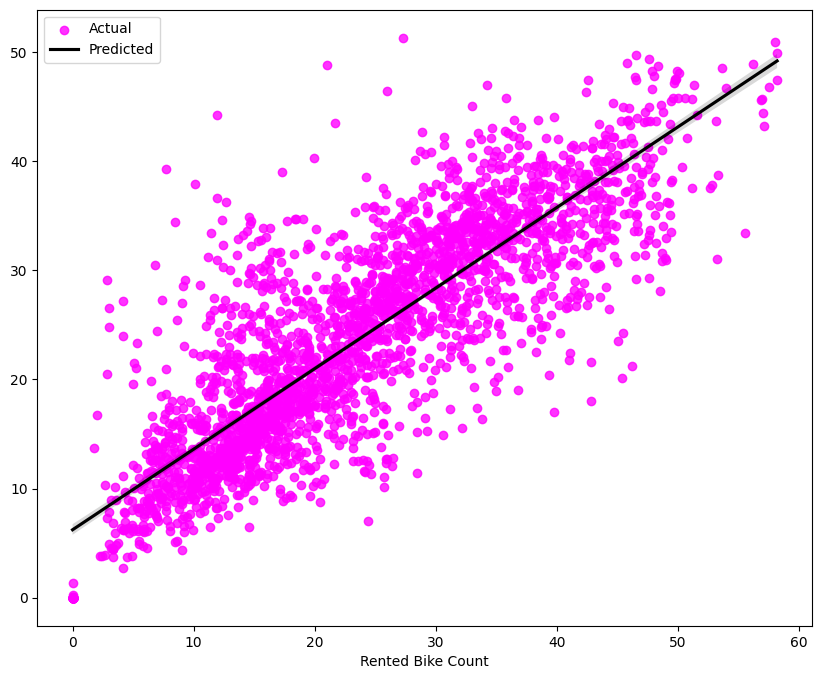

In [88]:
#visualizing linearity between real and predicted data:

reg_scatter(y_test, y_test_predrf)

In [89]:
# Visualizing evaluation Metric Score chart

store_scores('Random Forest regression(Grid Search CV)',2.6128959118593276, 15.488846781090674, 3.9355872218883263, 0.8991598970906219)

Model  Mean Absolute Error (MAE)  \
0                         Linear regression                   5.025081   
1                          Lasso regression                   6.084011   
2          Lasso regression(Grid Search CV)                   4.867785   
3                          Ridge regression                   4.873231   
4          Ridge regression(Grid Search CV)                   4.873231   
5                  Random Forest regression                   2.630991   
6  Random Forest regression(Grid Search CV)                   2.612896   

   Mean Squred Error(MSE)  The Root Mean Squared Error(RMSE)  R2 Score  
0               43.411771                           6.588761  0.717368  
1               61.127461                           7.818405  0.602030  
2               41.051518                           6.407146  0.732734  
3               41.072272                           6.408765  0.732599  
4               41.072272                           6.408765  0.732599  
5               15.688781                           3.960907  0.897858  
6               15.488847                           3.935587  0.899160

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In the Seoul bike-sharing prediction project, the following evaluation metrics are crucial for positive business impact:

**Root Mean Squared Error (RMSE)**: RMSE gauges the average deviation between predicted and actual values. A lower RMSE signifies improved model performance, which is beneficial for business as it implies more precise predictions and fewer errors.

**Mean Absolute Error (MAE**): MAE measures the average absolute difference between predictions and actual outcomes. A lower MAE indicates superior model performance, which is advantageous for business due to more accurate predictions and minimal discrepancies.

**R-squared (R2)** score: R-squared quantifies how well the model aligns with the data. A higher R2 score signifies a better model fit, indicating that the model explains a larger proportion of the variance in the target variable.

These evaluation metrics are pivotal because they demonstrate the model's accuracy in forecasting bike rental demand in Seoul. High performance across these metrics can lead to better forecasting, more efficient resource management, and more informed decisions for bike-sharing companies and urban planners.








### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [90]:
# Setting Model as index in r2 score dataframe:

score_df = score_df.set_index('Model')


In [91]:
score_df

Mean Absolute Error (MAE)  \
Model                                                                 
Linear regression                                          5.025081   
Lasso regression                                           6.084011   
Lasso regression(Grid Search CV)                           4.867785   
Ridge regression                                           4.873231   
Ridge regression(Grid Search CV)                           4.873231   
Random Forest regression                                   2.630991   
Random Forest regression(Grid Search CV)                   2.612896   

                                          Mean Squred Error(MSE)  \
Model                                                              
Linear regression                                      43.411771   
Lasso regression                                       61.127461   
Lasso regression(Grid Search CV)                       41.051518   
Ridge regression                                       41.072272   
Ridge regression(Grid Search CV)                       41.072272   
Random Forest regression                               15.688781   
Random Forest regression(Grid Search CV)               15.488847   

                                          The Root Mean Squared Error(RMSE)  \
Model                                                                         
Linear regression                                                  6.588761   
Lasso regression                                                   7.818405   
Lasso regression(Grid Search CV)                                   6.407146   
Ridge regression                                                   6.408765   
Ridge regression(Grid Search CV)                                   6.408765   
Random Forest regression                                           3.960907   
Random Forest regression(Grid Search CV)                           3.935587   

                                          R2 Score  
Model                                               
Linear regression                         0.717368  
Lasso regression                          0.602030  
Lasso regression(Grid Search CV)          0.732734  
Ridge regression                          0.732599  
Ridge regression(Grid Search CV)          0.732599  
Random Forest regression                  0.897858  
Random Forest regression(Grid Search CV)  0.899160

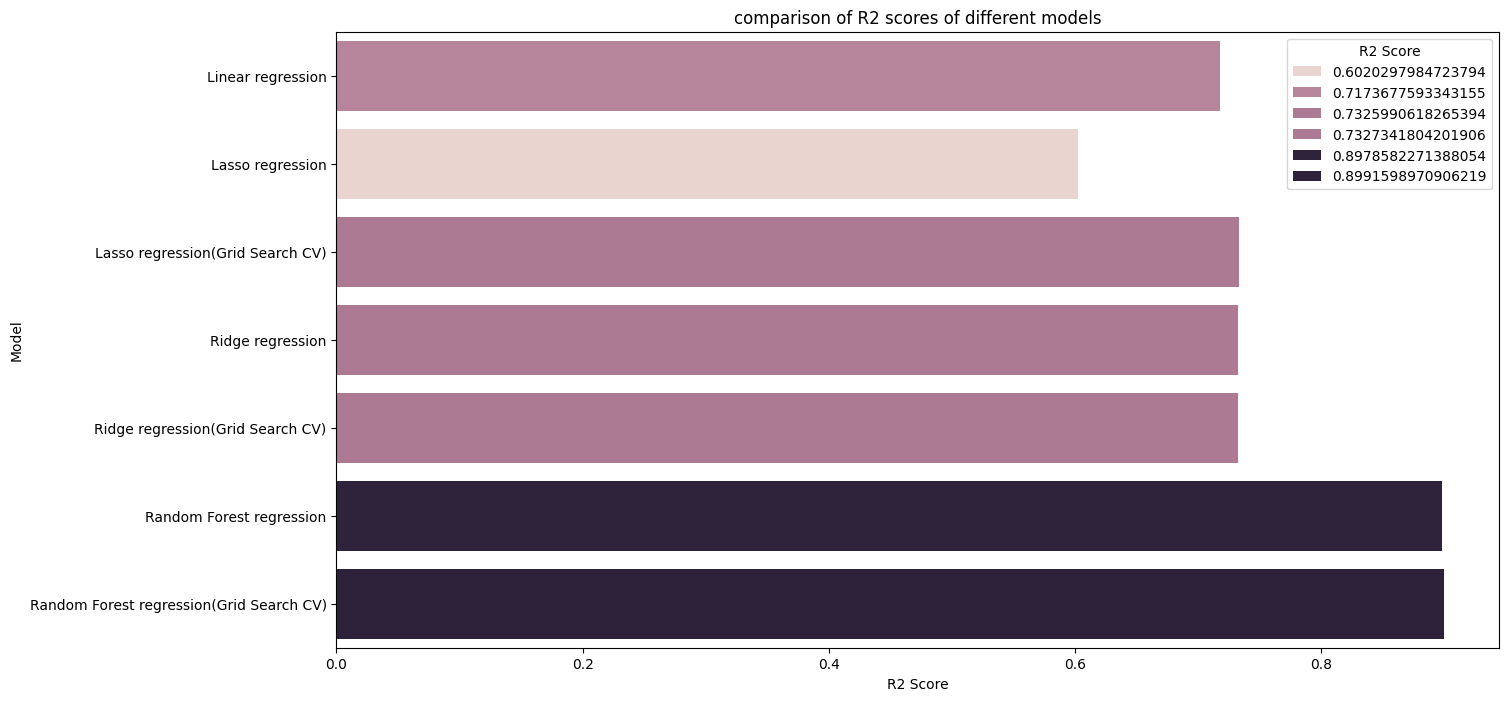

In [92]:
# Visualising comparison of R2 score of different models using barplot.

plt.figure(figsize = (15,8))
sns.barplot(data =score_df, x = score_df['R2 Score'], y= score_df.index, order=score_df.index, hue = score_df['R2 Score'] )
plt.title('comparison of R2 scores of different models')
plt.show()


#### Based on the provided evaluation metrics, the ML model I selected for my final prediction model is:

####**1) Random Forest regression(Grid Search CV)**:  This model demonstrates strong performance with low MAE, MSE, and RMSE values, reflecting its ability to make accurate predictions. It has an R2 score of 0.90, suggesting effective explanation of the variance in the target variable. This model can aid bike-sharing companies in streamlining operations, improving customer experiences, and reducing expenses.

### It's important to acknowledge that the real-world impact of this model also depends on other factors such as implementation costs, data availability, and current market conditions.

# Feature Importance.

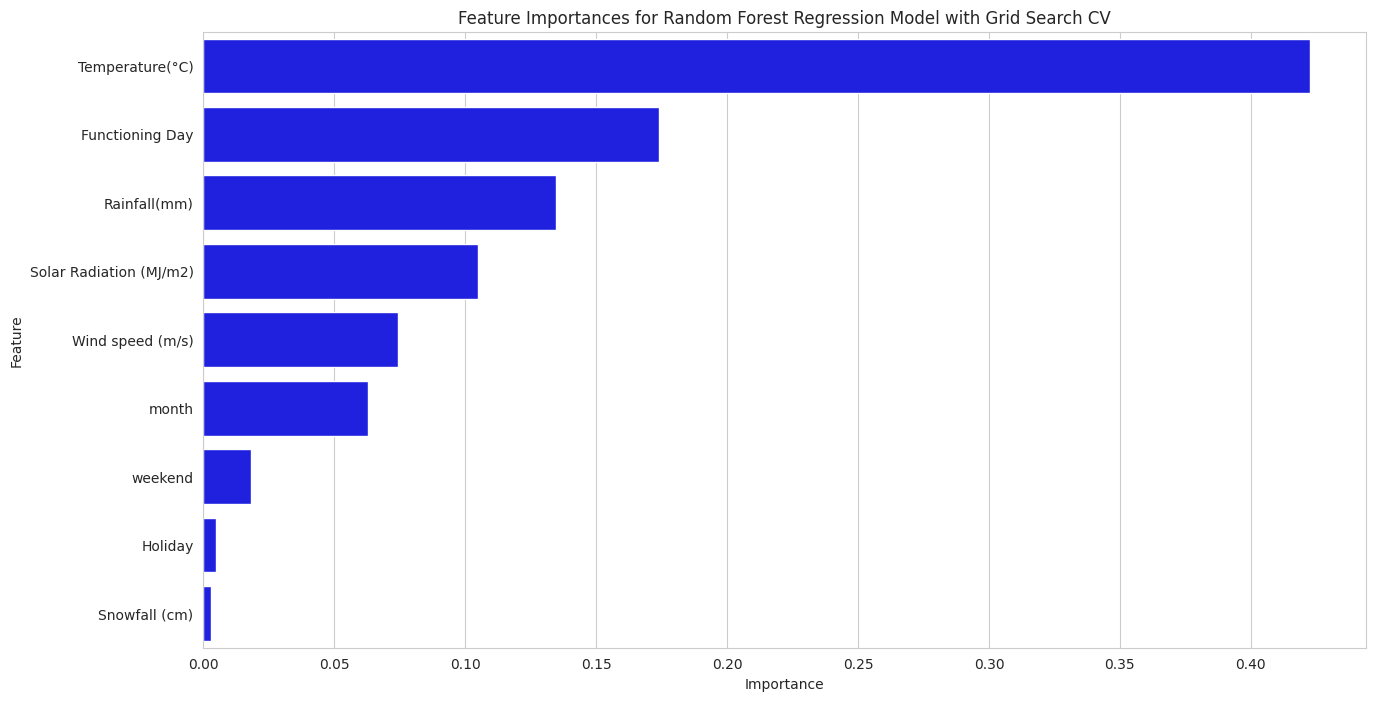

In [93]:
# Calculating feature importance for Random forest regression model:

feature_imp(grid_searchrf)

#### Temperature, day of operation, and rainfall are key factors in the model.

# **Conclusion**

#Conclusions:

* #### After evaluating the MAE, MSE, RMSE, and R² scores for each model, we will base our assessment of model performance primarily on the R² score. Our criterion for overfitting is set such that if the difference in R² score between the training data and test data exceeds 5%, we consider the model overfitted.

### Linear,Lasso and Ridge:

>* #### Linear, Lasso, and Ridge regression models all produced similar R² scores (around 73%) for both training and test data. This consistency suggests these models generalize well to the data, even with the use of hyperparameter tuning through GridSearchCV.


### Random Forest:

> * #### Without hyperparameter tuning, the Random Forest Regressor achieved an R² score of 98% on the training data and 90% on the test data, indicating overfitting.
* #### After hyperparameter tuning, the R² scores were 97% on the training data and 90% on the test data, which is a significant improvement and reflects a well-fitted model.

> * ### Overall, the tuned Random Forest model achieved strong R² score of 90% on the test data, indicating it is well-suited for deployment. This model has successfully balanced fitting the training data while generalizing well to the test data.
